# Airnew Object Detection
## Dependencies

In [1]:
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
     |████████████████████████████████| 5.6 MB 371 kB/s eta 0:00:01
     |████████████████████████████████| 47 kB 2.1 MB/s eta 0:00:01
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-py3-none-any.whl size=58542 sha256=39f7dbf7aab589de542206675dd9bad856904257be96246334eea18002b18068
  Stored in directory: /root/.cache/pip/wheels/c6/25/b5/1f76e3c22d316deb81d3837756cf497e86b817db223a4b49c6
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp36-cp36m-linux_x86_64.whl size=299709 sha256=989a8a54c623ad908f502dc7d93cd1f278b62ecb70ef646d746933d71aa12f53
  Stored in directory: /root/.cache/pip/wheels/d8/c2/ba/8f5306f921c2e79ad7b09effdfed6bd966cfcf8c6fe55422d6
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=68407f48d568518da3e2451880a94eeff1509501ee07c466afac88e695193958
  Stored in directory: /root/.cache/pip/wheels/93/2a/eb/e58dbcbc9635

In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import matplotlib.pyplot as plt
import torch, torchvision

In [2]:
#import json
#from detectron2.data import DatasetCatalog

#with open("/datasets/airnew/AirNewOutputData/outputData01.json", encoding='utf-8') as fh:
#    airnew = json.load(fh)
#DatasetCatalog.register("airnew", airnew)

from detectron2.data.datasets import register_coco_instances
register_coco_instances("airnew", {}, "/datasets/airnew/AirNewOutputData/outputData01.json", "/datasets/airnew/images/")

[04/27 05:37:13 d2.data.datasets.coco]: Loaded 663 images in COCO format from /datasets/airnew/AirNewOutputData/outputData01.json


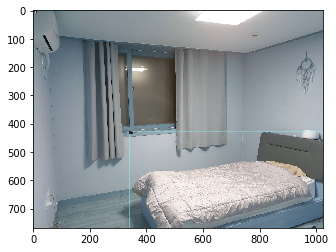

In [3]:
import random
from detectron2.utils.visualizer import Visualizer

dataset_dicts = DatasetCatalog.get("airnew")

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])

## Train

In [5]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("airnew",)
cfg.DATASETS.TEST = ("airnew")
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[04/27 05:37:37 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[04/27 05:37:37 d2.data.datasets.coco]: Loaded 663 images in COCO format from /datasets/airnew/AirNewOutputData/outputData01.json
[04/27 05:37:37 d2.data.build]: Removed 0 images with no usable annotations. 663 images left.
[04/27 05:37:37 d2.data.build]: Distribution of instances among all 39 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
| 가스레인지 | 11           |   그릇장   | 7            | 김치냉장고 | 24           |
|   냉장고   | 83           |   돌침대   | 1            |    박스    | 1255         |
|    밥솥    | 38           |    비데    | 12           |   서랍장   | 346          |
|    선반    | 101          |   세탁기   | 53           |    소파    | 57           |
|   수납장   | 294          |  스타일러  | 3            | 식기세척기 | 0            |
|    식탁    | 16           |  안마의자  | 1            |    액자    | 295          |
|    어항    | 5            |   에어컨   | 65           |   오디오  

/opt/conda/lib/python3.6/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:103: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  num_fg = fg_inds.nonzero().numel()


[04/27 05:38:37 d2.utils.events]:  eta: 8 days, 18:46:06  iter: 19  total_loss: 1.557  loss_cls: 1.195  loss_box_reg: 0.2421  loss_rpn_cls: 0.0979  loss_rpn_loc: 0.04725  time: 2.8798  data_time: 1.1307  lr: 0.00039962  max_mem: 18344M
[04/27 05:39:31 d2.utils.events]:  eta: 9 days, 1:14:37  iter: 39  total_loss: 1.238  loss_cls: 0.8429  loss_box_reg: 0.2706  loss_rpn_cls: 0.04635  loss_rpn_loc: 0.04003  time: 2.7776  data_time: 0.8697  lr: 0.00079922  max_mem: 18344M
[04/27 05:40:26 d2.utils.events]:  eta: 9 days, 1:13:39  iter: 59  total_loss: 1.147  loss_cls: 0.7372  loss_box_reg: 0.3054  loss_rpn_cls: 0.04456  loss_rpn_loc: 0.03352  time: 2.7732  data_time: 0.9506  lr: 0.0011988  max_mem: 18344M
[04/27 05:41:25 d2.utils.events]:  eta: 9 days, 4:50:34  iter: 79  total_loss: 1.014  loss_cls: 0.6362  loss_box_reg: 0.2967  loss_rpn_cls: 0.04557  loss_rpn_loc: 0.03854  time: 2.8152  data_time: 1.1360  lr: 0.0015984  max_mem: 18344M
[04/27 05:42:20 d2.utils.events]:  eta: 8 days, 21:48:4

[04/27 06:08:37 d2.utils.events]:  eta: 8 days, 5:21:30  iter: 699  total_loss: 0.4339  loss_cls: 0.167  loss_box_reg: 0.2184  loss_rpn_cls: 0.009798  loss_rpn_loc: 0.03508  time: 2.6508  data_time: 0.7569  lr: 0.013986  max_mem: 18344M
[04/27 06:09:27 d2.utils.events]:  eta: 8 days, 5:10:39  iter: 719  total_loss: 0.3757  loss_cls: 0.1508  loss_box_reg: 0.1914  loss_rpn_cls: 0.00869  loss_rpn_loc: 0.03131  time: 2.6467  data_time: 0.7343  lr: 0.014386  max_mem: 18344M
[04/27 06:10:18 d2.utils.events]:  eta: 8 days, 5:04:58  iter: 739  total_loss: 0.4378  loss_cls: 0.1767  loss_box_reg: 0.2171  loss_rpn_cls: 0.008605  loss_rpn_loc: 0.0324  time: 2.6445  data_time: 0.7851  lr: 0.014785  max_mem: 18344M
[04/27 06:11:07 d2.utils.events]:  eta: 8 days, 4:19:35  iter: 759  total_loss: 0.4265  loss_cls: 0.1612  loss_box_reg: 0.2074  loss_rpn_cls: 0.007551  loss_rpn_loc: 0.03156  time: 2.6396  data_time: 0.7006  lr: 0.015185  max_mem: 18344M
[04/27 06:11:58 d2.utils.events]:  eta: 8 days, 4:0

[04/27 06:37:05 d2.utils.events]:  eta: 7 days, 19:44:02  iter: 1379  total_loss: 0.295  loss_cls: 0.08996  loss_box_reg: 0.1699  loss_rpn_cls: 0.003786  loss_rpn_loc: 0.02648  time: 2.5810  data_time: 0.7362  lr: 0.02  max_mem: 18344M
[04/27 06:37:55 d2.utils.events]:  eta: 7 days, 19:33:00  iter: 1399  total_loss: 0.2855  loss_cls: 0.09117  loss_box_reg: 0.157  loss_rpn_cls: 0.003541  loss_rpn_loc: 0.0282  time: 2.5794  data_time: 0.7289  lr: 0.02  max_mem: 18344M
[04/27 06:38:45 d2.utils.events]:  eta: 7 days, 19:21:23  iter: 1419  total_loss: 0.2169  loss_cls: 0.06694  loss_box_reg: 0.1232  loss_rpn_cls: 0.00327  loss_rpn_loc: 0.02177  time: 2.5785  data_time: 0.7200  lr: 0.02  max_mem: 18344M
[04/27 06:39:33 d2.utils.events]:  eta: 7 days, 19:20:33  iter: 1439  total_loss: 0.3108  loss_cls: 0.09699  loss_box_reg: 0.1722  loss_rpn_cls: 0.004082  loss_rpn_loc: 0.02878  time: 2.5763  data_time: 0.6547  lr: 0.02  max_mem: 18344M
[04/27 06:40:22 d2.utils.events]:  eta: 7 days, 19:18:22

[04/27 07:05:23 d2.utils.events]:  eta: 7 days, 19:24:39  iter: 2059  total_loss: 0.2123  loss_cls: 0.06592  loss_box_reg: 0.1238  loss_rpn_cls: 0.002057  loss_rpn_loc: 0.02053  time: 2.5525  data_time: 0.7210  lr: 0.02  max_mem: 18344M
[04/27 07:06:14 d2.utils.events]:  eta: 7 days, 19:17:52  iter: 2079  total_loss: 0.213  loss_cls: 0.06459  loss_box_reg: 0.1227  loss_rpn_cls: 0.001605  loss_rpn_loc: 0.0187  time: 2.5524  data_time: 0.7797  lr: 0.02  max_mem: 18344M
[04/27 07:07:03 d2.utils.events]:  eta: 7 days, 19:16:37  iter: 2099  total_loss: 0.227  loss_cls: 0.0734  loss_box_reg: 0.1307  loss_rpn_cls: 0.001795  loss_rpn_loc: 0.02069  time: 2.5515  data_time: 0.6801  lr: 0.02  max_mem: 18344M
[04/27 07:07:53 d2.utils.events]:  eta: 7 days, 19:14:26  iter: 2119  total_loss: 0.242  loss_cls: 0.07966  loss_box_reg: 0.1363  loss_rpn_cls: 0.002339  loss_rpn_loc: 0.02146  time: 2.5507  data_time: 0.6779  lr: 0.02  max_mem: 18344M
[04/27 07:08:41 d2.utils.events]:  eta: 7 days, 19:10:34 

[04/27 07:33:49 d2.utils.events]:  eta: 7 days, 19:59:46  iter: 2739  total_loss: 0.2159  loss_cls: 0.06896  loss_box_reg: 0.1227  loss_rpn_cls: 0.001439  loss_rpn_loc: 0.01963  time: 2.5411  data_time: 0.6989  lr: 0.02  max_mem: 18344M
[04/27 07:34:38 d2.utils.events]:  eta: 7 days, 19:29:19  iter: 2759  total_loss: 0.178  loss_cls: 0.05193  loss_box_reg: 0.1087  loss_rpn_cls: 0.001609  loss_rpn_loc: 0.01527  time: 2.5402  data_time: 0.6499  lr: 0.02  max_mem: 18344M
[04/27 07:35:27 d2.utils.events]:  eta: 7 days, 19:08:26  iter: 2779  total_loss: 0.1997  loss_cls: 0.06809  loss_box_reg: 0.1142  loss_rpn_cls: 0.001853  loss_rpn_loc: 0.01956  time: 2.5396  data_time: 0.7021  lr: 0.02  max_mem: 18344M
[04/27 07:36:18 d2.utils.events]:  eta: 7 days, 19:25:59  iter: 2799  total_loss: 0.218  loss_cls: 0.06495  loss_box_reg: 0.1282  loss_rpn_cls: 0.001646  loss_rpn_loc: 0.01774  time: 2.5398  data_time: 0.7900  lr: 0.02  max_mem: 18344M
[04/27 07:37:07 d2.utils.events]:  eta: 7 days, 19:25:

[04/27 08:02:03 d2.utils.events]:  eta: 7 days, 17:36:14  iter: 3419  total_loss: 0.1731  loss_cls: 0.0483  loss_box_reg: 0.1012  loss_rpn_cls: 0.001356  loss_rpn_loc: 0.0187  time: 2.5306  data_time: 0.6545  lr: 0.02  max_mem: 18344M
[04/27 08:02:53 d2.utils.events]:  eta: 7 days, 17:34:41  iter: 3439  total_loss: 0.1936  loss_cls: 0.06432  loss_box_reg: 0.1088  loss_rpn_cls: 0.001306  loss_rpn_loc: 0.01996  time: 2.5304  data_time: 0.7349  lr: 0.02  max_mem: 18344M
[04/27 08:03:43 d2.utils.events]:  eta: 7 days, 17:32:57  iter: 3459  total_loss: 0.1827  loss_cls: 0.0571  loss_box_reg: 0.1108  loss_rpn_cls: 0.001259  loss_rpn_loc: 0.01829  time: 2.5301  data_time: 0.7172  lr: 0.02  max_mem: 18344M
[04/27 08:04:33 d2.utils.events]:  eta: 7 days, 17:33:00  iter: 3479  total_loss: 0.1769  loss_cls: 0.05088  loss_box_reg: 0.09832  loss_rpn_cls: 0.001511  loss_rpn_loc: 0.01737  time: 2.5301  data_time: 0.7476  lr: 0.02  max_mem: 18344M
[04/27 08:05:23 d2.utils.events]:  eta: 7 days, 17:32:

[04/27 08:30:21 d2.utils.events]:  eta: 7 days, 18:49:55  iter: 4099  total_loss: 0.1732  loss_cls: 0.05083  loss_box_reg: 0.1023  loss_rpn_cls: 0.001078  loss_rpn_loc: 0.0157  time: 2.5245  data_time: 0.7678  lr: 0.02  max_mem: 18344M
[04/27 08:31:11 d2.utils.events]:  eta: 7 days, 18:34:48  iter: 4119  total_loss: 0.1658  loss_cls: 0.04931  loss_box_reg: 0.1  loss_rpn_cls: 0.001054  loss_rpn_loc: 0.01596  time: 2.5243  data_time: 0.7256  lr: 0.02  max_mem: 18344M
[04/27 08:32:00 d2.utils.events]:  eta: 7 days, 18:21:57  iter: 4139  total_loss: 0.1583  loss_cls: 0.04825  loss_box_reg: 0.09173  loss_rpn_cls: 0.0009566  loss_rpn_loc: 0.0163  time: 2.5241  data_time: 0.7021  lr: 0.02  max_mem: 18344M
[04/27 08:32:51 d2.utils.events]:  eta: 7 days, 18:08:45  iter: 4159  total_loss: 0.1825  loss_cls: 0.05353  loss_box_reg: 0.1024  loss_rpn_cls: 0.0009845  loss_rpn_loc: 0.01549  time: 2.5240  data_time: 0.7461  lr: 0.02  max_mem: 18344M
[04/27 08:33:41 d2.utils.events]:  eta: 7 days, 18:12:

[04/27 08:58:41 d2.utils.events]:  eta: 7 days, 18:17:15  iter: 4779  total_loss: 0.1727  loss_cls: 0.054  loss_box_reg: 0.09742  loss_rpn_cls: 0.001074  loss_rpn_loc: 0.01524  time: 2.5207  data_time: 0.6694  lr: 0.02  max_mem: 18344M
[04/27 08:59:31 d2.utils.events]:  eta: 7 days, 18:20:48  iter: 4799  total_loss: 0.1653  loss_cls: 0.05543  loss_box_reg: 0.09042  loss_rpn_cls: 0.0013  loss_rpn_loc: 0.01532  time: 2.5206  data_time: 0.7160  lr: 0.02  max_mem: 18344M
[04/27 09:00:20 d2.utils.events]:  eta: 7 days, 18:19:57  iter: 4819  total_loss: 0.1695  loss_cls: 0.05794  loss_box_reg: 0.1008  loss_rpn_cls: 0.00127  loss_rpn_loc: 0.01657  time: 2.5203  data_time: 0.6930  lr: 0.02  max_mem: 18344M
[04/27 09:01:10 d2.utils.events]:  eta: 7 days, 18:19:07  iter: 4839  total_loss: 0.1562  loss_cls: 0.04453  loss_box_reg: 0.09168  loss_rpn_cls: 0.001101  loss_rpn_loc: 0.01468  time: 2.5201  data_time: 0.6905  lr: 0.02  max_mem: 18344M
[04/27 09:01:59 d2.utils.events]:  eta: 7 days, 18:18:

[04/27 09:27:19 d2.utils.events]:  eta: 7 days, 18:31:00  iter: 5459  total_loss: 0.157  loss_cls: 0.05161  loss_box_reg: 0.09169  loss_rpn_cls: 0.001237  loss_rpn_loc: 0.01649  time: 2.5209  data_time: 0.7797  lr: 0.02  max_mem: 18344M
[04/27 09:28:11 d2.utils.events]:  eta: 7 days, 18:46:27  iter: 5479  total_loss: 0.1681  loss_cls: 0.04991  loss_box_reg: 0.09731  loss_rpn_cls: 0.0008848  loss_rpn_loc: 0.01636  time: 2.5211  data_time: 0.8386  lr: 0.02  max_mem: 18344M
[04/27 09:29:01 d2.utils.events]:  eta: 7 days, 18:29:19  iter: 5499  total_loss: 0.1427  loss_cls: 0.0457  loss_box_reg: 0.08257  loss_rpn_cls: 0.0009693  loss_rpn_loc: 0.01313  time: 2.5210  data_time: 0.7628  lr: 0.02  max_mem: 18344M
[04/27 09:29:52 d2.utils.events]:  eta: 7 days, 18:28:28  iter: 5519  total_loss: 0.153  loss_cls: 0.04791  loss_box_reg: 0.09032  loss_rpn_cls: 0.0008864  loss_rpn_loc: 0.01406  time: 2.5210  data_time: 0.7534  lr: 0.02  max_mem: 18344M
[04/27 09:30:41 d2.utils.events]:  eta: 7 days, 

[04/27 09:55:52 d2.utils.events]:  eta: 7 days, 17:04:45  iter: 6139  total_loss: 0.1334  loss_cls: 0.03906  loss_box_reg: 0.08043  loss_rpn_cls: 0.0009891  loss_rpn_loc: 0.01687  time: 2.5204  data_time: 0.6866  lr: 0.02  max_mem: 18344M
[04/27 09:56:43 d2.utils.events]:  eta: 7 days, 17:24:31  iter: 6159  total_loss: 0.1618  loss_cls: 0.04489  loss_box_reg: 0.09026  loss_rpn_cls: 0.001219  loss_rpn_loc: 0.01459  time: 2.5205  data_time: 0.8173  lr: 0.02  max_mem: 18344M
[04/27 09:57:33 d2.utils.events]:  eta: 7 days, 17:23:40  iter: 6179  total_loss: 0.1595  loss_cls: 0.05028  loss_box_reg: 0.09272  loss_rpn_cls: 0.0009089  loss_rpn_loc: 0.01407  time: 2.5203  data_time: 0.7103  lr: 0.02  max_mem: 18344M
[04/27 09:58:23 d2.utils.events]:  eta: 7 days, 17:33:52  iter: 6199  total_loss: 0.1528  loss_cls: 0.04655  loss_box_reg: 0.08887  loss_rpn_cls: 0.0008305  loss_rpn_loc: 0.01348  time: 2.5202  data_time: 0.7203  lr: 0.02  max_mem: 18344M
[04/27 09:59:13 d2.utils.events]:  eta: 7 day

[04/27 10:24:15 d2.utils.events]:  eta: 7 days, 16:19:58  iter: 6819  total_loss: 0.1354  loss_cls: 0.03822  loss_box_reg: 0.08492  loss_rpn_cls: 0.0008141  loss_rpn_loc: 0.01123  time: 2.5184  data_time: 0.6936  lr: 0.02  max_mem: 18344M
[04/27 10:25:05 d2.utils.events]:  eta: 7 days, 16:27:49  iter: 6839  total_loss: 0.1329  loss_cls: 0.03837  loss_box_reg: 0.08074  loss_rpn_cls: 0.0009204  loss_rpn_loc: 0.01233  time: 2.5183  data_time: 0.7170  lr: 0.02  max_mem: 18344M
[04/27 10:25:57 d2.utils.events]:  eta: 7 days, 16:57:44  iter: 6859  total_loss: 0.1418  loss_cls: 0.04224  loss_box_reg: 0.08308  loss_rpn_cls: 0.0007887  loss_rpn_loc: 0.01455  time: 2.5187  data_time: 0.8859  lr: 0.02  max_mem: 18344M
[04/27 10:26:47 d2.utils.events]:  eta: 7 days, 17:04:06  iter: 6879  total_loss: 0.1389  loss_cls: 0.0424  loss_box_reg: 0.07872  loss_rpn_cls: 0.0007253  loss_rpn_loc: 0.01098  time: 2.5186  data_time: 0.7305  lr: 0.02  max_mem: 18344M
[04/27 10:27:39 d2.utils.events]:  eta: 7 day

[04/27 10:52:34 d2.utils.events]:  eta: 7 days, 14:15:46  iter: 7499  total_loss: 0.1528  loss_cls: 0.04621  loss_box_reg: 0.09011  loss_rpn_cls: 0.001027  loss_rpn_loc: 0.01377  time: 2.5165  data_time: 0.8021  lr: 0.02  max_mem: 18344M
[04/27 10:53:23 d2.utils.events]:  eta: 7 days, 14:12:43  iter: 7519  total_loss: 0.1114  loss_cls: 0.03497  loss_box_reg: 0.06638  loss_rpn_cls: 0.0008404  loss_rpn_loc: 0.01209  time: 2.5163  data_time: 0.6836  lr: 0.02  max_mem: 18344M
[04/27 10:54:12 d2.utils.events]:  eta: 7 days, 13:55:06  iter: 7539  total_loss: 0.1468  loss_cls: 0.04231  loss_box_reg: 0.08397  loss_rpn_cls: 0.0007785  loss_rpn_loc: 0.01216  time: 2.5160  data_time: 0.6498  lr: 0.02  max_mem: 18344M
[04/27 10:55:02 d2.utils.events]:  eta: 7 days, 14:11:03  iter: 7559  total_loss: 0.1295  loss_cls: 0.04484  loss_box_reg: 0.07469  loss_rpn_cls: 0.0009758  loss_rpn_loc: 0.01341  time: 2.5161  data_time: 0.7891  lr: 0.02  max_mem: 18344M
[04/27 10:55:52 d2.utils.events]:  eta: 7 day

[04/27 11:20:52 d2.utils.events]:  eta: 7 days, 13:05:45  iter: 8179  total_loss: 0.1397  loss_cls: 0.03937  loss_box_reg: 0.08024  loss_rpn_cls: 0.0008562  loss_rpn_loc: 0.01394  time: 2.5146  data_time: 0.7416  lr: 0.02  max_mem: 18344M
[04/27 11:21:41 d2.utils.events]:  eta: 7 days, 12:59:38  iter: 8199  total_loss: 0.1333  loss_cls: 0.0387  loss_box_reg: 0.07981  loss_rpn_cls: 0.0009915  loss_rpn_loc: 0.01335  time: 2.5145  data_time: 0.7090  lr: 0.02  max_mem: 18344M
[04/27 11:22:31 d2.utils.events]:  eta: 7 days, 12:35:54  iter: 8219  total_loss: 0.1592  loss_cls: 0.05158  loss_box_reg: 0.08814  loss_rpn_cls: 0.001396  loss_rpn_loc: 0.01474  time: 2.5144  data_time: 0.7117  lr: 0.02  max_mem: 18344M
[04/27 11:23:21 d2.utils.events]:  eta: 7 days, 12:37:38  iter: 8239  total_loss: 0.147  loss_cls: 0.04002  loss_box_reg: 0.09094  loss_rpn_cls: 0.0009148  loss_rpn_loc: 0.01221  time: 2.5143  data_time: 0.7202  lr: 0.02  max_mem: 18344M
[04/27 11:24:10 d2.utils.events]:  eta: 7 days,

[04/27 11:49:11 d2.utils.events]:  eta: 7 days, 14:54:57  iter: 8859  total_loss: 0.137  loss_cls: 0.04031  loss_box_reg: 0.07731  loss_rpn_cls: 0.0007953  loss_rpn_loc: 0.01332  time: 2.5131  data_time: 0.6955  lr: 0.02  max_mem: 18344M
[04/27 11:50:01 d2.utils.events]:  eta: 7 days, 15:02:24  iter: 8879  total_loss: 0.1383  loss_cls: 0.04369  loss_box_reg: 0.08181  loss_rpn_cls: 0.001018  loss_rpn_loc: 0.01496  time: 2.5132  data_time: 0.7441  lr: 0.02  max_mem: 18344M
[04/27 11:50:53 d2.utils.events]:  eta: 7 days, 14:56:22  iter: 8899  total_loss: 0.1292  loss_cls: 0.03808  loss_box_reg: 0.07491  loss_rpn_cls: 0.0007372  loss_rpn_loc: 0.01295  time: 2.5133  data_time: 0.7961  lr: 0.02  max_mem: 18344M
[04/27 11:51:42 d2.utils.events]:  eta: 7 days, 14:55:32  iter: 8919  total_loss: 0.1314  loss_cls: 0.03898  loss_box_reg: 0.07542  loss_rpn_cls: 0.0007004  loss_rpn_loc: 0.01333  time: 2.5131  data_time: 0.7026  lr: 0.02  max_mem: 18344M
[04/27 11:52:31 d2.utils.events]:  eta: 7 days

[04/27 12:17:28 d2.utils.events]:  eta: 7 days, 13:51:38  iter: 9539  total_loss: 0.1327  loss_cls: 0.03971  loss_box_reg: 0.07515  loss_rpn_cls: 0.000779  loss_rpn_loc: 0.01082  time: 2.5117  data_time: 0.7593  lr: 0.02  max_mem: 18344M
[04/27 12:18:19 d2.utils.events]:  eta: 7 days, 14:11:04  iter: 9559  total_loss: 0.1375  loss_cls: 0.0414  loss_box_reg: 0.08074  loss_rpn_cls: 0.00102  loss_rpn_loc: 0.01334  time: 2.5118  data_time: 0.7924  lr: 0.02  max_mem: 18344M
[04/27 12:19:07 d2.utils.events]:  eta: 7 days, 13:40:38  iter: 9579  total_loss: 0.1262  loss_cls: 0.0409  loss_box_reg: 0.07253  loss_rpn_cls: 0.0008036  loss_rpn_loc: 0.0107  time: 2.5116  data_time: 0.6372  lr: 0.02  max_mem: 18344M
[04/27 12:19:59 d2.utils.events]:  eta: 7 days, 13:39:48  iter: 9599  total_loss: 0.1318  loss_cls: 0.04399  loss_box_reg: 0.07536  loss_rpn_cls: 0.0008538  loss_rpn_loc: 0.01349  time: 2.5117  data_time: 0.8070  lr: 0.02  max_mem: 18344M
[04/27 12:20:49 d2.utils.events]:  eta: 7 days, 13

[04/27 12:46:03 d2.utils.events]:  eta: 7 days, 14:08:47  iter: 10219  total_loss: 0.1268  loss_cls: 0.03661  loss_box_reg: 0.07673  loss_rpn_cls: 0.0008233  loss_rpn_loc: 0.01345  time: 2.5120  data_time: 0.7047  lr: 0.02  max_mem: 18344M
[04/27 12:46:52 d2.utils.events]:  eta: 7 days, 14:05:02  iter: 10239  total_loss: 0.1349  loss_cls: 0.03865  loss_box_reg: 0.0775  loss_rpn_cls: 0.0008641  loss_rpn_loc: 0.01204  time: 2.5120  data_time: 0.7032  lr: 0.02  max_mem: 18344M
[04/27 12:47:42 d2.utils.events]:  eta: 7 days, 14:16:17  iter: 10259  total_loss: 0.1545  loss_cls: 0.0499  loss_box_reg: 0.08425  loss_rpn_cls: 0.001275  loss_rpn_loc: 0.01402  time: 2.5119  data_time: 0.7334  lr: 0.02  max_mem: 18344M
[04/27 12:48:33 d2.utils.events]:  eta: 7 days, 14:25:06  iter: 10279  total_loss: 0.1171  loss_cls: 0.03488  loss_box_reg: 0.0692  loss_rpn_cls: 0.0007702  loss_rpn_loc: 0.01237  time: 2.5120  data_time: 0.7720  lr: 0.02  max_mem: 18344M
[04/27 12:49:23 d2.utils.events]:  eta: 7 da

[04/27 13:13:32 d2.utils.events]:  eta: 7 days, 14:07:16  iter: 10879  total_loss: 0.1313  loss_cls: 0.03992  loss_box_reg: 0.07687  loss_rpn_cls: 0.0009226  loss_rpn_loc: 0.01241  time: 2.5111  data_time: 0.6898  lr: 0.02  max_mem: 18344M
[04/27 13:14:22 d2.utils.events]:  eta: 7 days, 13:49:20  iter: 10899  total_loss: 0.1178  loss_cls: 0.03348  loss_box_reg: 0.07089  loss_rpn_cls: 0.0006412  loss_rpn_loc: 0.01133  time: 2.5111  data_time: 0.7328  lr: 0.02  max_mem: 18344M
[04/27 13:15:11 d2.utils.events]:  eta: 7 days, 12:41:39  iter: 10919  total_loss: 0.1256  loss_cls: 0.04197  loss_box_reg: 0.07497  loss_rpn_cls: 0.0006092  loss_rpn_loc: 0.009287  time: 2.5110  data_time: 0.6829  lr: 0.02  max_mem: 18344M
[04/27 13:16:02 d2.utils.events]:  eta: 7 days, 12:30:13  iter: 10939  total_loss: 0.1262  loss_cls: 0.03638  loss_box_reg: 0.07834  loss_rpn_cls: 0.0006752  loss_rpn_loc: 0.01274  time: 2.5110  data_time: 0.7578  lr: 0.02  max_mem: 18344M
[04/27 13:16:50 d2.utils.events]:  eta:

[04/27 13:40:56 d2.utils.events]:  eta: 7 days, 11:35:04  iter: 11539  total_loss: 0.1279  loss_cls: 0.03933  loss_box_reg: 0.06918  loss_rpn_cls: 0.0009698  loss_rpn_loc: 0.01136  time: 2.5097  data_time: 0.8223  lr: 0.02  max_mem: 18344M
[04/27 13:41:44 d2.utils.events]:  eta: 7 days, 11:35:32  iter: 11559  total_loss: 0.1268  loss_cls: 0.04313  loss_box_reg: 0.07506  loss_rpn_cls: 0.000674  loss_rpn_loc: 0.01077  time: 2.5096  data_time: 0.6404  lr: 0.02  max_mem: 18344M
[04/27 13:42:34 d2.utils.events]:  eta: 7 days, 11:55:52  iter: 11579  total_loss: 0.1192  loss_cls: 0.03511  loss_box_reg: 0.06937  loss_rpn_cls: 0.0006152  loss_rpn_loc: 0.01261  time: 2.5095  data_time: 0.6963  lr: 0.02  max_mem: 18344M
[04/27 13:43:23 d2.utils.events]:  eta: 7 days, 11:38:22  iter: 11599  total_loss: 0.124  loss_cls: 0.03539  loss_box_reg: 0.0721  loss_rpn_cls: 0.0006859  loss_rpn_loc: 0.01271  time: 2.5094  data_time: 0.7206  lr: 0.02  max_mem: 18344M
[04/27 13:44:12 d2.utils.events]:  eta: 7 d

[04/27 14:08:17 d2.utils.events]:  eta: 7 days, 10:49:04  iter: 12199  total_loss: 0.1239  loss_cls: 0.03983  loss_box_reg: 0.0737  loss_rpn_cls: 0.0007393  loss_rpn_loc: 0.01181  time: 2.5084  data_time: 0.7896  lr: 0.02  max_mem: 18344M
[04/27 14:09:07 d2.utils.events]:  eta: 7 days, 10:59:14  iter: 12219  total_loss: 0.1144  loss_cls: 0.03356  loss_box_reg: 0.06676  loss_rpn_cls: 0.0006816  loss_rpn_loc: 0.01154  time: 2.5084  data_time: 0.7435  lr: 0.02  max_mem: 18344M
[04/27 14:09:59 d2.utils.events]:  eta: 7 days, 11:04:45  iter: 12239  total_loss: 0.1223  loss_cls: 0.03893  loss_box_reg: 0.07391  loss_rpn_cls: 0.0007122  loss_rpn_loc: 0.008582  time: 2.5085  data_time: 0.7880  lr: 0.02  max_mem: 18344M
[04/27 14:10:49 d2.utils.events]:  eta: 7 days, 11:16:45  iter: 12259  total_loss: 0.1297  loss_cls: 0.0388  loss_box_reg: 0.07435  loss_rpn_cls: 0.0007552  loss_rpn_loc: 0.01297  time: 2.5085  data_time: 0.7162  lr: 0.02  max_mem: 18344M
[04/27 14:11:39 d2.utils.events]:  eta: 7

[04/27 14:35:59 d2.utils.events]:  eta: 7 days, 11:31:10  iter: 12859  total_loss: 0.1287  loss_cls: 0.03869  loss_box_reg: 0.0749  loss_rpn_cls: 0.0008514  loss_rpn_loc: 0.01339  time: 2.5087  data_time: 0.7146  lr: 0.02  max_mem: 18344M
[04/27 14:36:49 d2.utils.events]:  eta: 7 days, 11:30:19  iter: 12879  total_loss: 0.1094  loss_cls: 0.03303  loss_box_reg: 0.0654  loss_rpn_cls: 0.0005004  loss_rpn_loc: 0.01051  time: 2.5088  data_time: 0.7279  lr: 0.02  max_mem: 18344M
[04/27 14:37:39 d2.utils.events]:  eta: 7 days, 11:33:40  iter: 12899  total_loss: 0.1361  loss_cls: 0.04536  loss_box_reg: 0.07868  loss_rpn_cls: 0.0006461  loss_rpn_loc: 0.01249  time: 2.5088  data_time: 0.7629  lr: 0.02  max_mem: 18344M
[04/27 14:38:27 d2.utils.events]:  eta: 7 days, 11:26:48  iter: 12919  total_loss: 0.1197  loss_cls: 0.03624  loss_box_reg: 0.07329  loss_rpn_cls: 0.0005878  loss_rpn_loc: 0.01266  time: 2.5086  data_time: 0.6342  lr: 0.02  max_mem: 18344M
[04/27 14:39:18 d2.utils.events]:  eta: 7 

[04/27 15:03:28 d2.utils.events]:  eta: 7 days, 12:39:42  iter: 13519  total_loss: 0.1261  loss_cls: 0.03943  loss_box_reg: 0.07329  loss_rpn_cls: 0.0008574  loss_rpn_loc: 0.01133  time: 2.5081  data_time: 0.7027  lr: 0.02  max_mem: 18344M
[04/27 15:04:16 d2.utils.events]:  eta: 7 days, 12:43:26  iter: 13539  total_loss: 0.1269  loss_cls: 0.03623  loss_box_reg: 0.07454  loss_rpn_cls: 0.0005298  loss_rpn_loc: 0.01112  time: 2.5080  data_time: 0.6860  lr: 0.02  max_mem: 18344M
[04/27 15:05:07 d2.utils.events]:  eta: 7 days, 12:38:01  iter: 13559  total_loss: 0.09672  loss_cls: 0.02693  loss_box_reg: 0.05984  loss_rpn_cls: 0.0006918  loss_rpn_loc: 0.009234  time: 2.5080  data_time: 0.7739  lr: 0.02  max_mem: 18344M
[04/27 15:05:56 d2.utils.events]:  eta: 7 days, 12:37:10  iter: 13579  total_loss: 0.1203  loss_cls: 0.03705  loss_box_reg: 0.07477  loss_rpn_cls: 0.0006458  loss_rpn_loc: 0.01195  time: 2.5080  data_time: 0.6790  lr: 0.02  max_mem: 18344M
[04/27 15:06:49 d2.utils.events]:  eta

[04/27 15:31:03 d2.utils.events]:  eta: 7 days, 10:52:47  iter: 14179  total_loss: 0.1169  loss_cls: 0.03636  loss_box_reg: 0.06677  loss_rpn_cls: 0.0007273  loss_rpn_loc: 0.009301  time: 2.5080  data_time: 0.7058  lr: 0.02  max_mem: 18344M
[04/27 15:31:53 d2.utils.events]:  eta: 7 days, 10:38:00  iter: 14199  total_loss: 0.1211  loss_cls: 0.03429  loss_box_reg: 0.06641  loss_rpn_cls: 0.0005244  loss_rpn_loc: 0.01292  time: 2.5080  data_time: 0.6919  lr: 0.02  max_mem: 18344M
[04/27 15:32:43 d2.utils.events]:  eta: 7 days, 10:16:16  iter: 14219  total_loss: 0.1004  loss_cls: 0.02994  loss_box_reg: 0.06354  loss_rpn_cls: 0.0004461  loss_rpn_loc: 0.01085  time: 2.5079  data_time: 0.7254  lr: 0.02  max_mem: 18344M
[04/27 15:33:32 d2.utils.events]:  eta: 7 days, 10:01:43  iter: 14239  total_loss: 0.124  loss_cls: 0.03732  loss_box_reg: 0.06895  loss_rpn_cls: 0.0006274  loss_rpn_loc: 0.01211  time: 2.5079  data_time: 0.7089  lr: 0.02  max_mem: 18344M
[04/27 15:34:22 d2.utils.events]:  eta: 

[04/27 15:58:46 d2.utils.events]:  eta: 7 days, 11:33:59  iter: 14839  total_loss: 0.1215  loss_cls: 0.03847  loss_box_reg: 0.06876  loss_rpn_cls: 0.001058  loss_rpn_loc: 0.01056  time: 2.5084  data_time: 0.7400  lr: 0.02  max_mem: 18344M
[04/27 15:59:39 d2.utils.events]:  eta: 7 days, 11:53:58  iter: 14859  total_loss: 0.1281  loss_cls: 0.03734  loss_box_reg: 0.07747  loss_rpn_cls: 0.0007733  loss_rpn_loc: 0.01176  time: 2.5086  data_time: 0.8715  lr: 0.02  max_mem: 18344M
[04/27 16:00:29 d2.utils.events]:  eta: 7 days, 12:06:40  iter: 14879  total_loss: 0.114  loss_cls: 0.03717  loss_box_reg: 0.06916  loss_rpn_cls: 0.0007125  loss_rpn_loc: 0.01122  time: 2.5086  data_time: 0.7303  lr: 0.02  max_mem: 18344M
[04/27 16:01:18 d2.utils.events]:  eta: 7 days, 11:48:28  iter: 14899  total_loss: 0.1175  loss_cls: 0.03648  loss_box_reg: 0.06704  loss_rpn_cls: 0.0008268  loss_rpn_loc: 0.01128  time: 2.5085  data_time: 0.7056  lr: 0.02  max_mem: 18344M
[04/27 16:02:09 d2.utils.events]:  eta: 7 

[04/27 16:26:25 d2.utils.events]:  eta: 7 days, 12:29:24  iter: 15499  total_loss: 0.1229  loss_cls: 0.03868  loss_box_reg: 0.07121  loss_rpn_cls: 0.0006743  loss_rpn_loc: 0.009476  time: 2.5084  data_time: 0.8435  lr: 0.02  max_mem: 18344M
[04/27 16:27:15 d2.utils.events]:  eta: 7 days, 12:23:52  iter: 15519  total_loss: 0.1074  loss_cls: 0.0315  loss_box_reg: 0.06175  loss_rpn_cls: 0.0006624  loss_rpn_loc: 0.009318  time: 2.5084  data_time: 0.7072  lr: 0.02  max_mem: 18344M
[04/27 16:28:05 d2.utils.events]:  eta: 7 days, 12:23:01  iter: 15539  total_loss: 0.1397  loss_cls: 0.04697  loss_box_reg: 0.07455  loss_rpn_cls: 0.0006509  loss_rpn_loc: 0.01177  time: 2.5084  data_time: 0.7412  lr: 0.02  max_mem: 18344M
[04/27 16:28:55 d2.utils.events]:  eta: 7 days, 12:26:51  iter: 15559  total_loss: 0.1081  loss_cls: 0.03473  loss_box_reg: 0.06279  loss_rpn_cls: 0.0007814  loss_rpn_loc: 0.009245  time: 2.5084  data_time: 0.7366  lr: 0.02  max_mem: 18344M
[04/27 16:29:47 d2.utils.events]:  eta

[04/27 16:54:40 d2.utils.events]:  eta: 7 days, 8:40:30  iter: 16179  total_loss: 0.1277  loss_cls: 0.03833  loss_box_reg: 0.07008  loss_rpn_cls: 0.0008331  loss_rpn_loc: 0.0132  time: 2.5077  data_time: 0.6162  lr: 0.02  max_mem: 18344M
[04/27 16:55:32 d2.utils.events]:  eta: 7 days, 8:33:48  iter: 16199  total_loss: 0.1137  loss_cls: 0.03691  loss_box_reg: 0.06852  loss_rpn_cls: 0.0006375  loss_rpn_loc: 0.0105  time: 2.5078  data_time: 0.7991  lr: 0.02  max_mem: 18344M
[04/27 16:56:21 d2.utils.events]:  eta: 7 days, 8:17:10  iter: 16219  total_loss: 0.11  loss_cls: 0.03213  loss_box_reg: 0.06478  loss_rpn_cls: 0.0005479  loss_rpn_loc: 0.00966  time: 2.5077  data_time: 0.6802  lr: 0.02  max_mem: 18344M
[04/27 16:57:12 d2.utils.events]:  eta: 7 days, 7:31:20  iter: 16239  total_loss: 0.121  loss_cls: 0.03667  loss_box_reg: 0.07212  loss_rpn_cls: 0.0006031  loss_rpn_loc: 0.0116  time: 2.5077  data_time: 0.7301  lr: 0.02  max_mem: 18344M
[04/27 16:58:03 d2.utils.events]:  eta: 7 days, 8:

[04/27 17:23:01 d2.utils.events]:  eta: 7 days, 8:18:43  iter: 16859  total_loss: 0.1003  loss_cls: 0.02708  loss_box_reg: 0.06221  loss_rpn_cls: 0.0006819  loss_rpn_loc: 0.01057  time: 2.5073  data_time: 0.7551  lr: 0.02  max_mem: 18344M
[04/27 17:23:51 d2.utils.events]:  eta: 7 days, 8:36:09  iter: 16879  total_loss: 0.1072  loss_cls: 0.03109  loss_box_reg: 0.06417  loss_rpn_cls: 0.0007668  loss_rpn_loc: 0.01173  time: 2.5073  data_time: 0.6990  lr: 0.02  max_mem: 18344M
[04/27 17:24:39 d2.utils.events]:  eta: 7 days, 8:11:19  iter: 16899  total_loss: 0.1185  loss_cls: 0.03575  loss_box_reg: 0.06944  loss_rpn_cls: 0.0006525  loss_rpn_loc: 0.01092  time: 2.5071  data_time: 0.6157  lr: 0.02  max_mem: 18344M
[04/27 17:25:28 d2.utils.events]:  eta: 7 days, 8:16:12  iter: 16919  total_loss: 0.1162  loss_cls: 0.03626  loss_box_reg: 0.06287  loss_rpn_cls: 0.0006943  loss_rpn_loc: 0.009955  time: 2.5071  data_time: 0.6709  lr: 0.02  max_mem: 18344M
[04/27 17:26:19 d2.utils.events]:  eta: 7 d

[04/27 17:51:26 d2.utils.events]:  eta: 7 days, 8:19:58  iter: 17539  total_loss: 0.1376  loss_cls: 0.04191  loss_box_reg: 0.07636  loss_rpn_cls: 0.0005267  loss_rpn_loc: 0.0137  time: 2.5072  data_time: 0.7314  lr: 0.02  max_mem: 18344M
[04/27 17:52:18 d2.utils.events]:  eta: 7 days, 8:19:08  iter: 17559  total_loss: 0.1094  loss_cls: 0.03117  loss_box_reg: 0.06846  loss_rpn_cls: 0.0005424  loss_rpn_loc: 0.009328  time: 2.5073  data_time: 0.8049  lr: 0.02  max_mem: 18344M
[04/27 17:53:07 d2.utils.events]:  eta: 7 days, 8:24:19  iter: 17579  total_loss: 0.1146  loss_cls: 0.03366  loss_box_reg: 0.06658  loss_rpn_cls: 0.0007041  loss_rpn_loc: 0.01156  time: 2.5072  data_time: 0.7230  lr: 0.02  max_mem: 18344M
[04/27 17:53:56 d2.utils.events]:  eta: 7 days, 8:17:27  iter: 17599  total_loss: 0.1127  loss_cls: 0.0331  loss_box_reg: 0.06751  loss_rpn_cls: 0.0006123  loss_rpn_loc: 0.01261  time: 2.5072  data_time: 0.6880  lr: 0.02  max_mem: 18344M
[04/27 17:54:48 d2.utils.events]:  eta: 7 day

[04/27 18:19:47 d2.utils.events]:  eta: 7 days, 8:06:44  iter: 18219  total_loss: 0.1284  loss_cls: 0.04161  loss_box_reg: 0.07125  loss_rpn_cls: 0.000812  loss_rpn_loc: 0.01114  time: 2.5069  data_time: 0.7223  lr: 0.02  max_mem: 18344M
[04/27 18:20:39 d2.utils.events]:  eta: 7 days, 8:05:54  iter: 18239  total_loss: 0.1102  loss_cls: 0.0342  loss_box_reg: 0.06183  loss_rpn_cls: 0.0005709  loss_rpn_loc: 0.009147  time: 2.5070  data_time: 0.8097  lr: 0.02  max_mem: 18344M
[04/27 18:21:29 d2.utils.events]:  eta: 7 days, 8:22:52  iter: 18259  total_loss: 0.1157  loss_cls: 0.03423  loss_box_reg: 0.06991  loss_rpn_cls: 0.0006594  loss_rpn_loc: 0.01133  time: 2.5069  data_time: 0.7039  lr: 0.02  max_mem: 18344M
[04/27 18:22:18 d2.utils.events]:  eta: 7 days, 9:01:18  iter: 18279  total_loss: 0.1341  loss_cls: 0.04262  loss_box_reg: 0.07616  loss_rpn_cls: 0.0005777  loss_rpn_loc: 0.01133  time: 2.5069  data_time: 0.7160  lr: 0.02  max_mem: 18344M
[04/27 18:23:09 d2.utils.events]:  eta: 7 day

[04/27 18:48:09 d2.utils.events]:  eta: 7 days, 9:14:19  iter: 18899  total_loss: 0.09386  loss_cls: 0.02679  loss_box_reg: 0.05729  loss_rpn_cls: 0.0004825  loss_rpn_loc: 0.008501  time: 2.5067  data_time: 0.6519  lr: 0.02  max_mem: 18344M
[04/27 18:49:02 d2.utils.events]:  eta: 7 days, 9:13:29  iter: 18919  total_loss: 0.1133  loss_cls: 0.03607  loss_box_reg: 0.06463  loss_rpn_cls: 0.0006156  loss_rpn_loc: 0.009555  time: 2.5068  data_time: 0.8616  lr: 0.02  max_mem: 18344M
[04/27 18:49:52 d2.utils.events]:  eta: 7 days, 9:03:45  iter: 18939  total_loss: 0.1068  loss_cls: 0.03097  loss_box_reg: 0.06438  loss_rpn_cls: 0.0007406  loss_rpn_loc: 0.01226  time: 2.5068  data_time: 0.6884  lr: 0.02  max_mem: 18344M
[04/27 18:50:41 d2.utils.events]:  eta: 7 days, 10:15:52  iter: 18959  total_loss: 0.1178  loss_cls: 0.03248  loss_box_reg: 0.06471  loss_rpn_cls: 0.0006518  loss_rpn_loc: 0.01021  time: 2.5067  data_time: 0.7127  lr: 0.02  max_mem: 18344M
[04/27 18:51:31 d2.utils.events]:  eta: 

[04/27 19:16:28 d2.utils.events]:  eta: 7 days, 6:48:16  iter: 19579  total_loss: 0.1048  loss_cls: 0.0306  loss_box_reg: 0.06314  loss_rpn_cls: 0.0006661  loss_rpn_loc: 0.008993  time: 2.5063  data_time: 0.6480  lr: 0.02  max_mem: 18344M
[04/27 19:17:18 d2.utils.events]:  eta: 7 days, 6:47:26  iter: 19599  total_loss: 0.1156  loss_cls: 0.0383  loss_box_reg: 0.06348  loss_rpn_cls: 0.0007142  loss_rpn_loc: 0.009908  time: 2.5063  data_time: 0.7188  lr: 0.02  max_mem: 18344M
[04/27 19:18:08 d2.utils.events]:  eta: 7 days, 6:39:43  iter: 19619  total_loss: 0.1063  loss_cls: 0.03393  loss_box_reg: 0.06172  loss_rpn_cls: 0.000777  loss_rpn_loc: 0.00913  time: 2.5062  data_time: 0.7136  lr: 0.02  max_mem: 18344M
[04/27 19:18:59 d2.utils.events]:  eta: 7 days, 7:11:45  iter: 19639  total_loss: 0.1063  loss_cls: 0.03751  loss_box_reg: 0.05944  loss_rpn_cls: 0.0006136  loss_rpn_loc: 0.008982  time: 2.5063  data_time: 0.7796  lr: 0.02  max_mem: 18344M
[04/27 19:19:48 d2.utils.events]:  eta: 7 da

[04/27 19:44:54 d2.utils.events]:  eta: 7 days, 6:53:16  iter: 20259  total_loss: 0.1025  loss_cls: 0.02965  loss_box_reg: 0.06058  loss_rpn_cls: 0.0007333  loss_rpn_loc: 0.009884  time: 2.5062  data_time: 0.7710  lr: 0.02  max_mem: 18344M
[04/27 19:45:45 d2.utils.events]:  eta: 7 days, 6:29:13  iter: 20279  total_loss: 0.1226  loss_cls: 0.03721  loss_box_reg: 0.06898  loss_rpn_cls: 0.0007173  loss_rpn_loc: 0.01211  time: 2.5062  data_time: 0.7722  lr: 0.02  max_mem: 18344M
[04/27 19:46:36 d2.utils.events]:  eta: 7 days, 6:56:18  iter: 20299  total_loss: 0.1107  loss_cls: 0.03412  loss_box_reg: 0.06478  loss_rpn_cls: 0.0007367  loss_rpn_loc: 0.01071  time: 2.5063  data_time: 0.8062  lr: 0.02  max_mem: 18344M
[04/27 19:47:26 d2.utils.events]:  eta: 7 days, 6:50:45  iter: 20319  total_loss: 0.1089  loss_cls: 0.03205  loss_box_reg: 0.06482  loss_rpn_cls: 0.0007488  loss_rpn_loc: 0.009998  time: 2.5063  data_time: 0.7337  lr: 0.02  max_mem: 18344M
[04/27 19:48:17 d2.utils.events]:  eta: 7 

[04/27 20:13:30 d2.utils.events]:  eta: 7 days, 6:14:04  iter: 20939  total_loss: 0.1053  loss_cls: 0.03153  loss_box_reg: 0.06242  loss_rpn_cls: 0.0005954  loss_rpn_loc: 0.009725  time: 2.5066  data_time: 0.7224  lr: 0.02  max_mem: 18344M
[04/27 20:14:19 d2.utils.events]:  eta: 7 days, 6:09:25  iter: 20959  total_loss: 0.1149  loss_cls: 0.03365  loss_box_reg: 0.06778  loss_rpn_cls: 0.0005912  loss_rpn_loc: 0.01179  time: 2.5066  data_time: 0.7422  lr: 0.02  max_mem: 18344M
[04/27 20:15:10 d2.utils.events]:  eta: 7 days, 6:08:35  iter: 20979  total_loss: 0.1016  loss_cls: 0.03  loss_box_reg: 0.05969  loss_rpn_cls: 0.0006057  loss_rpn_loc: 0.009602  time: 2.5066  data_time: 0.7595  lr: 0.02  max_mem: 18344M
[04/27 20:16:01 d2.utils.events]:  eta: 7 days, 6:07:44  iter: 20999  total_loss: 0.1162  loss_cls: 0.03679  loss_box_reg: 0.06532  loss_rpn_cls: 0.0007223  loss_rpn_loc: 0.01179  time: 2.5067  data_time: 0.7709  lr: 0.02  max_mem: 18344M
[04/27 20:16:50 d2.utils.events]:  eta: 7 day

[04/27 20:41:57 d2.utils.events]:  eta: 7 days, 6:38:21  iter: 21619  total_loss: 0.1229  loss_cls: 0.0388  loss_box_reg: 0.0725  loss_rpn_cls: 0.0006953  loss_rpn_loc: 0.01161  time: 2.5067  data_time: 0.6415  lr: 0.02  max_mem: 18344M
[04/27 20:42:49 d2.utils.events]:  eta: 7 days, 6:39:14  iter: 21639  total_loss: 0.1063  loss_cls: 0.03256  loss_box_reg: 0.06386  loss_rpn_cls: 0.0007164  loss_rpn_loc: 0.009732  time: 2.5068  data_time: 0.8485  lr: 0.02  max_mem: 18344M
[04/27 20:43:38 d2.utils.events]:  eta: 7 days, 6:36:39  iter: 21659  total_loss: 0.09471  loss_cls: 0.02831  loss_box_reg: 0.05777  loss_rpn_cls: 0.000732  loss_rpn_loc: 0.008929  time: 2.5067  data_time: 0.6757  lr: 0.02  max_mem: 18344M
[04/27 20:44:28 d2.utils.events]:  eta: 7 days, 6:20:05  iter: 21679  total_loss: 0.0962  loss_cls: 0.03052  loss_box_reg: 0.05478  loss_rpn_cls: 0.0007322  loss_rpn_loc: 0.009411  time: 2.5067  data_time: 0.7390  lr: 0.02  max_mem: 18344M
[04/27 20:45:18 d2.utils.events]:  eta: 7 d

[04/27 21:10:27 d2.utils.events]:  eta: 7 days, 6:05:53  iter: 22299  total_loss: 0.1267  loss_cls: 0.04103  loss_box_reg: 0.07137  loss_rpn_cls: 0.0005707  loss_rpn_loc: 0.01024  time: 2.5068  data_time: 0.8099  lr: 0.02  max_mem: 18344M
[04/27 21:11:15 d2.utils.events]:  eta: 7 days, 6:08:20  iter: 22319  total_loss: 0.1003  loss_cls: 0.02783  loss_box_reg: 0.05811  loss_rpn_cls: 0.0005762  loss_rpn_loc: 0.00935  time: 2.5068  data_time: 0.6686  lr: 0.02  max_mem: 18344M
[04/27 21:12:05 d2.utils.events]:  eta: 7 days, 6:04:12  iter: 22339  total_loss: 0.1112  loss_cls: 0.03566  loss_box_reg: 0.06353  loss_rpn_cls: 0.0007245  loss_rpn_loc: 0.009733  time: 2.5068  data_time: 0.7614  lr: 0.02  max_mem: 18344M
[04/27 21:12:55 d2.utils.events]:  eta: 7 days, 6:07:08  iter: 22359  total_loss: 0.1061  loss_cls: 0.03053  loss_box_reg: 0.06426  loss_rpn_cls: 0.0005311  loss_rpn_loc: 0.009484  time: 2.5067  data_time: 0.7107  lr: 0.02  max_mem: 18344M
[04/27 21:13:45 d2.utils.events]:  eta: 7 

[04/27 21:38:52 d2.utils.events]:  eta: 7 days, 5:23:44  iter: 22979  total_loss: 0.09063  loss_cls: 0.02545  loss_box_reg: 0.05583  loss_rpn_cls: 0.000633  loss_rpn_loc: 0.01076  time: 2.5068  data_time: 0.7086  lr: 0.02  max_mem: 18344M
[04/27 21:39:41 d2.utils.events]:  eta: 7 days, 5:10:46  iter: 22999  total_loss: 0.1228  loss_cls: 0.03695  loss_box_reg: 0.07056  loss_rpn_cls: 0.0007168  loss_rpn_loc: 0.01173  time: 2.5067  data_time: 0.6945  lr: 0.02  max_mem: 18344M
[04/27 21:40:30 d2.utils.events]:  eta: 7 days, 5:00:55  iter: 23019  total_loss: 0.1016  loss_cls: 0.03381  loss_box_reg: 0.05878  loss_rpn_cls: 0.000616  loss_rpn_loc: 0.008891  time: 2.5067  data_time: 0.6834  lr: 0.02  max_mem: 18344M
[04/27 21:41:19 d2.utils.events]:  eta: 7 days, 4:43:08  iter: 23039  total_loss: 0.1038  loss_cls: 0.03205  loss_box_reg: 0.06035  loss_rpn_cls: 0.0008843  loss_rpn_loc: 0.01092  time: 2.5066  data_time: 0.6320  lr: 0.02  max_mem: 18344M
[04/27 21:42:09 d2.utils.events]:  eta: 7 da

[04/27 22:07:17 d2.utils.events]:  eta: 7 days, 4:37:54  iter: 23659  total_loss: 0.1007  loss_cls: 0.02962  loss_box_reg: 0.06153  loss_rpn_cls: 0.0006932  loss_rpn_loc: 0.01025  time: 2.5067  data_time: 0.8366  lr: 0.02  max_mem: 18344M
[04/27 22:08:05 d2.utils.events]:  eta: 7 days, 4:37:04  iter: 23679  total_loss: 0.1043  loss_cls: 0.035  loss_box_reg: 0.0606  loss_rpn_cls: 0.000891  loss_rpn_loc: 0.009021  time: 2.5066  data_time: 0.6881  lr: 0.02  max_mem: 18344M
[04/27 22:08:55 d2.utils.events]:  eta: 7 days, 4:47:21  iter: 23699  total_loss: 0.1152  loss_cls: 0.03373  loss_box_reg: 0.06676  loss_rpn_cls: 0.0005626  loss_rpn_loc: 0.009909  time: 2.5066  data_time: 0.7250  lr: 0.02  max_mem: 18344M
[04/27 22:09:45 d2.utils.events]:  eta: 7 days, 4:22:13  iter: 23719  total_loss: 0.1201  loss_cls: 0.03559  loss_box_reg: 0.07198  loss_rpn_cls: 0.0006848  loss_rpn_loc: 0.01113  time: 2.5066  data_time: 0.7771  lr: 0.02  max_mem: 18344M
[04/27 22:10:35 d2.utils.events]:  eta: 7 days

[04/27 22:35:37 d2.utils.events]:  eta: 7 days, 4:36:37  iter: 24339  total_loss: 0.1172  loss_cls: 0.03699  loss_box_reg: 0.06597  loss_rpn_cls: 0.001082  loss_rpn_loc: 0.01105  time: 2.5065  data_time: 0.7507  lr: 0.02  max_mem: 18344M
[04/27 22:36:27 d2.utils.events]:  eta: 7 days, 4:35:46  iter: 24359  total_loss: 0.1133  loss_cls: 0.03557  loss_box_reg: 0.06815  loss_rpn_cls: 0.0007505  loss_rpn_loc: 0.01051  time: 2.5065  data_time: 0.7699  lr: 0.02  max_mem: 18344M
[04/27 22:37:19 d2.utils.events]:  eta: 7 days, 4:20:37  iter: 24379  total_loss: 0.1129  loss_cls: 0.03401  loss_box_reg: 0.06885  loss_rpn_cls: 0.0006626  loss_rpn_loc: 0.01098  time: 2.5065  data_time: 0.8295  lr: 0.02  max_mem: 18344M
[04/27 22:38:10 d2.utils.events]:  eta: 7 days, 4:50:45  iter: 24399  total_loss: 0.1149  loss_cls: 0.03589  loss_box_reg: 0.06879  loss_rpn_cls: 0.0005497  loss_rpn_loc: 0.009583  time: 2.5066  data_time: 0.7795  lr: 0.02  max_mem: 18344M
[04/27 22:39:01 d2.utils.events]:  eta: 7 da

[04/27 23:03:12 d2.utils.events]:  eta: 7 days, 3:03:14  iter: 24999  total_loss: 0.08875  loss_cls: 0.02389  loss_box_reg: 0.05485  loss_rpn_cls: 0.0005679  loss_rpn_loc: 0.008633  time: 2.5064  data_time: 0.8078  lr: 0.02  max_mem: 18344M
[04/27 23:04:01 d2.utils.events]:  eta: 7 days, 3:11:52  iter: 25019  total_loss: 0.1164  loss_cls: 0.03329  loss_box_reg: 0.06229  loss_rpn_cls: 0.0006643  loss_rpn_loc: 0.01079  time: 2.5063  data_time: 0.7106  lr: 0.02  max_mem: 18344M
[04/27 23:04:52 d2.utils.events]:  eta: 7 days, 3:21:51  iter: 25039  total_loss: 0.1088  loss_cls: 0.02877  loss_box_reg: 0.06167  loss_rpn_cls: 0.0008  loss_rpn_loc: 0.01142  time: 2.5063  data_time: 0.7822  lr: 0.02  max_mem: 18344M
[04/27 23:05:41 d2.utils.events]:  eta: 7 days, 3:20:10  iter: 25059  total_loss: 0.09579  loss_cls: 0.02774  loss_box_reg: 0.05888  loss_rpn_cls: 0.0004452  loss_rpn_loc: 0.009205  time: 2.5063  data_time: 0.7076  lr: 0.02  max_mem: 18344M
[04/27 23:06:30 d2.utils.events]:  eta: 7 d

[04/27 23:31:39 d2.utils.events]:  eta: 7 days, 3:10:13  iter: 25679  total_loss: 0.1245  loss_cls: 0.04005  loss_box_reg: 0.06959  loss_rpn_cls: 0.0007252  loss_rpn_loc: 0.011  time: 2.5064  data_time: 0.7788  lr: 0.02  max_mem: 18344M
[04/27 23:32:29 d2.utils.events]:  eta: 7 days, 3:13:36  iter: 25699  total_loss: 0.1145  loss_cls: 0.03254  loss_box_reg: 0.06785  loss_rpn_cls: 0.0007869  loss_rpn_loc: 0.0108  time: 2.5064  data_time: 0.7218  lr: 0.02  max_mem: 18344M
[04/27 23:33:19 d2.utils.events]:  eta: 7 days, 3:16:05  iter: 25719  total_loss: 0.1128  loss_cls: 0.03626  loss_box_reg: 0.05965  loss_rpn_cls: 0.0005881  loss_rpn_loc: 0.00886  time: 2.5064  data_time: 0.7443  lr: 0.02  max_mem: 18344M
[04/27 23:34:10 d2.utils.events]:  eta: 7 days, 3:15:15  iter: 25739  total_loss: 0.1138  loss_cls: 0.03646  loss_box_reg: 0.06354  loss_rpn_cls: 0.0006099  loss_rpn_loc: 0.01007  time: 2.5064  data_time: 0.7720  lr: 0.02  max_mem: 18344M
[04/27 23:34:59 d2.utils.events]:  eta: 7 days,

[04/28 00:00:01 d2.utils.events]:  eta: 7 days, 2:38:18  iter: 26359  total_loss: 0.1025  loss_cls: 0.03031  loss_box_reg: 0.06079  loss_rpn_cls: 0.0006749  loss_rpn_loc: 0.01034  time: 2.5062  data_time: 0.7797  lr: 0.02  max_mem: 18344M
[04/28 00:00:51 d2.utils.events]:  eta: 7 days, 2:44:34  iter: 26379  total_loss: 0.1084  loss_cls: 0.03354  loss_box_reg: 0.06415  loss_rpn_cls: 0.0005526  loss_rpn_loc: 0.01008  time: 2.5062  data_time: 0.7328  lr: 0.02  max_mem: 18344M
[04/28 00:01:40 d2.utils.events]:  eta: 7 days, 2:38:26  iter: 26399  total_loss: 0.101  loss_cls: 0.02783  loss_box_reg: 0.05843  loss_rpn_cls: 0.0006461  loss_rpn_loc: 0.008565  time: 2.5062  data_time: 0.6868  lr: 0.02  max_mem: 18344M
[04/28 00:02:31 d2.utils.events]:  eta: 7 days, 2:07:26  iter: 26419  total_loss: 0.1018  loss_cls: 0.02996  loss_box_reg: 0.05739  loss_rpn_cls: 0.0005126  loss_rpn_loc: 0.009753  time: 2.5062  data_time: 0.7723  lr: 0.02  max_mem: 18344M
[04/28 00:03:19 d2.utils.events]:  eta: 7 d

[04/28 00:27:31 d2.utils.events]:  eta: 7 days, 1:10:39  iter: 27019  total_loss: 0.1016  loss_cls: 0.03112  loss_box_reg: 0.05808  loss_rpn_cls: 0.0006417  loss_rpn_loc: 0.008996  time: 2.5060  data_time: 0.6622  lr: 0.02  max_mem: 18344M
[04/28 00:28:23 d2.utils.events]:  eta: 7 days, 1:09:49  iter: 27039  total_loss: 0.1114  loss_cls: 0.03645  loss_box_reg: 0.05993  loss_rpn_cls: 0.0006328  loss_rpn_loc: 0.009465  time: 2.5061  data_time: 0.7991  lr: 0.02  max_mem: 18344M
[04/28 00:29:12 d2.utils.events]:  eta: 7 days, 0:53:51  iter: 27059  total_loss: 0.1035  loss_cls: 0.02775  loss_box_reg: 0.06082  loss_rpn_cls: 0.0005552  loss_rpn_loc: 0.009831  time: 2.5061  data_time: 0.7335  lr: 0.02  max_mem: 18344M
[04/28 00:30:02 d2.utils.events]:  eta: 7 days, 0:56:31  iter: 27079  total_loss: 0.1127  loss_cls: 0.03306  loss_box_reg: 0.06496  loss_rpn_cls: 0.0006307  loss_rpn_loc: 0.009838  time: 2.5060  data_time: 0.7266  lr: 0.02  max_mem: 18344M
[04/28 00:30:51 d2.utils.events]:  eta: 

[04/28 00:55:12 d2.utils.events]:  eta: 7 days, 1:06:32  iter: 27679  total_loss: 0.1081  loss_cls: 0.03449  loss_box_reg: 0.05907  loss_rpn_cls: 0.0006081  loss_rpn_loc: 0.01028  time: 2.5062  data_time: 0.8888  lr: 0.02  max_mem: 18344M
[04/28 00:56:01 d2.utils.events]:  eta: 7 days, 0:43:53  iter: 27699  total_loss: 0.09177  loss_cls: 0.02973  loss_box_reg: 0.05745  loss_rpn_cls: 0.0009598  loss_rpn_loc: 0.008762  time: 2.5062  data_time: 0.6994  lr: 0.02  max_mem: 18344M
[04/28 00:56:52 d2.utils.events]:  eta: 7 days, 0:53:31  iter: 27719  total_loss: 0.1041  loss_cls: 0.03079  loss_box_reg: 0.06123  loss_rpn_cls: 0.001177  loss_rpn_loc: 0.009889  time: 2.5062  data_time: 0.8182  lr: 0.02  max_mem: 18344M
[04/28 00:57:43 d2.utils.events]:  eta: 7 days, 1:13:18  iter: 27739  total_loss: 0.107  loss_cls: 0.02876  loss_box_reg: 0.06245  loss_rpn_cls: 0.0009641  loss_rpn_loc: 0.01096  time: 2.5062  data_time: 0.7917  lr: 0.02  max_mem: 18344M
[04/28 00:58:34 d2.utils.events]:  eta: 7 d

[04/28 01:23:39 d2.utils.events]:  eta: 7 days, 2:53:59  iter: 28359  total_loss: 0.1039  loss_cls: 0.03102  loss_box_reg: 0.06067  loss_rpn_cls: 0.0005102  loss_rpn_loc: 0.009574  time: 2.5063  data_time: 0.7600  lr: 0.02  max_mem: 18344M
[04/28 01:24:30 d2.utils.events]:  eta: 7 days, 2:56:16  iter: 28379  total_loss: 0.1162  loss_cls: 0.03703  loss_box_reg: 0.06372  loss_rpn_cls: 0.0006011  loss_rpn_loc: 0.009871  time: 2.5063  data_time: 0.7869  lr: 0.02  max_mem: 18344M
[04/28 01:25:22 d2.utils.events]:  eta: 7 days, 2:55:25  iter: 28399  total_loss: 0.09761  loss_cls: 0.02985  loss_box_reg: 0.05906  loss_rpn_cls: 0.0007229  loss_rpn_loc: 0.009013  time: 2.5063  data_time: 0.7996  lr: 0.02  max_mem: 18344M
[04/28 01:26:11 d2.utils.events]:  eta: 7 days, 2:51:26  iter: 28419  total_loss: 0.1126  loss_cls: 0.03437  loss_box_reg: 0.0665  loss_rpn_cls: 0.0006939  loss_rpn_loc: 0.009534  time: 2.5063  data_time: 0.7219  lr: 0.02  max_mem: 18344M
[04/28 01:27:03 d2.utils.events]:  eta: 

[04/28 01:51:22 d2.utils.events]:  eta: 7 days, 2:35:37  iter: 29019  total_loss: 0.101  loss_cls: 0.03109  loss_box_reg: 0.05877  loss_rpn_cls: 0.0005617  loss_rpn_loc: 0.009121  time: 2.5065  data_time: 0.7160  lr: 0.02  max_mem: 18344M
[04/28 01:52:12 d2.utils.events]:  eta: 7 days, 2:46:44  iter: 29039  total_loss: 0.1052  loss_cls: 0.03171  loss_box_reg: 0.06063  loss_rpn_cls: 0.0005759  loss_rpn_loc: 0.01046  time: 2.5065  data_time: 0.7383  lr: 0.02  max_mem: 18344M
[04/28 01:53:03 d2.utils.events]:  eta: 7 days, 3:05:12  iter: 29059  total_loss: 0.1074  loss_cls: 0.03216  loss_box_reg: 0.06142  loss_rpn_cls: 0.0005912  loss_rpn_loc: 0.008714  time: 2.5065  data_time: 0.7849  lr: 0.02  max_mem: 18344M
[04/28 01:53:54 d2.utils.events]:  eta: 7 days, 2:53:08  iter: 29079  total_loss: 0.09954  loss_cls: 0.02864  loss_box_reg: 0.06016  loss_rpn_cls: 0.0005107  loss_rpn_loc: 0.009103  time: 2.5065  data_time: 0.7710  lr: 0.02  max_mem: 18344M
[04/28 01:54:43 d2.utils.events]:  eta: 7

[04/28 02:19:04 d2.utils.events]:  eta: 7 days, 1:49:36  iter: 29679  total_loss: 0.1011  loss_cls: 0.03184  loss_box_reg: 0.05727  loss_rpn_cls: 0.0009424  loss_rpn_loc: 0.009901  time: 2.5067  data_time: 0.7113  lr: 0.02  max_mem: 18344M
[04/28 02:19:56 d2.utils.events]:  eta: 7 days, 1:58:16  iter: 29699  total_loss: 0.1085  loss_cls: 0.02959  loss_box_reg: 0.06672  loss_rpn_cls: 0.0006335  loss_rpn_loc: 0.008486  time: 2.5068  data_time: 0.8157  lr: 0.02  max_mem: 18344M
[04/28 02:20:49 d2.utils.events]:  eta: 7 days, 2:17:04  iter: 29719  total_loss: 0.1049  loss_cls: 0.03328  loss_box_reg: 0.0614  loss_rpn_cls: 0.000612  loss_rpn_loc: 0.01038  time: 2.5068  data_time: 0.8412  lr: 0.02  max_mem: 18344M
[04/28 02:21:40 d2.utils.events]:  eta: 7 days, 1:56:34  iter: 29739  total_loss: 0.09427  loss_cls: 0.02885  loss_box_reg: 0.0579  loss_rpn_cls: 0.0004957  loss_rpn_loc: 0.008463  time: 2.5069  data_time: 0.7762  lr: 0.02  max_mem: 18344M
[04/28 02:22:28 d2.utils.events]:  eta: 7 d

[04/28 02:46:52 d2.utils.events]:  eta: 7 days, 0:00:41  iter: 30339  total_loss: 0.107  loss_cls: 0.02857  loss_box_reg: 0.06198  loss_rpn_cls: 0.0006568  loss_rpn_loc: 0.009186  time: 2.5070  data_time: 0.8295  lr: 0.02  max_mem: 18344M
[04/28 02:47:40 d2.utils.events]:  eta: 6 days, 23:51:00  iter: 30359  total_loss: 0.1029  loss_cls: 0.03231  loss_box_reg: 0.05921  loss_rpn_cls: 0.0007427  loss_rpn_loc: 0.009741  time: 2.5070  data_time: 0.6902  lr: 0.02  max_mem: 18344M
[04/28 02:48:30 d2.utils.events]:  eta: 6 days, 23:42:04  iter: 30379  total_loss: 0.1095  loss_cls: 0.03546  loss_box_reg: 0.06463  loss_rpn_cls: 0.0005836  loss_rpn_loc: 0.009968  time: 2.5070  data_time: 0.7342  lr: 0.02  max_mem: 18344M
[04/28 02:49:21 d2.utils.events]:  eta: 6 days, 23:44:39  iter: 30399  total_loss: 0.0894  loss_cls: 0.02552  loss_box_reg: 0.05747  loss_rpn_cls: 0.0005293  loss_rpn_loc: 0.008767  time: 2.5070  data_time: 0.7599  lr: 0.02  max_mem: 18344M
[04/28 02:50:11 d2.utils.events]:  eta

[04/28 03:14:27 d2.utils.events]:  eta: 7 days, 0:21:22  iter: 30999  total_loss: 0.09493  loss_cls: 0.0267  loss_box_reg: 0.05649  loss_rpn_cls: 0.0006035  loss_rpn_loc: 0.009388  time: 2.5070  data_time: 0.7336  lr: 0.02  max_mem: 18344M
[04/28 03:15:17 d2.utils.events]:  eta: 7 days, 0:23:18  iter: 31019  total_loss: 0.1114  loss_cls: 0.0327  loss_box_reg: 0.06541  loss_rpn_cls: 0.0005468  loss_rpn_loc: 0.009138  time: 2.5070  data_time: 0.7426  lr: 0.02  max_mem: 18344M
[04/28 03:16:08 d2.utils.events]:  eta: 7 days, 0:28:03  iter: 31039  total_loss: 0.1065  loss_cls: 0.0318  loss_box_reg: 0.06262  loss_rpn_cls: 0.0006173  loss_rpn_loc: 0.01172  time: 2.5070  data_time: 0.7646  lr: 0.02  max_mem: 18344M
[04/28 03:16:58 d2.utils.events]:  eta: 7 days, 0:44:17  iter: 31059  total_loss: 0.09975  loss_cls: 0.02832  loss_box_reg: 0.05602  loss_rpn_cls: 0.0006101  loss_rpn_loc: 0.009355  time: 2.5070  data_time: 0.7163  lr: 0.02  max_mem: 18344M
[04/28 03:17:46 d2.utils.events]:  eta: 7 

[04/28 03:42:09 d2.utils.events]:  eta: 7 days, 0:20:09  iter: 31659  total_loss: 0.1141  loss_cls: 0.03165  loss_box_reg: 0.06981  loss_rpn_cls: 0.0005763  loss_rpn_loc: 0.01205  time: 2.5072  data_time: 0.7961  lr: 0.02  max_mem: 18344M
[04/28 03:42:59 d2.utils.events]:  eta: 7 days, 0:19:18  iter: 31679  total_loss: 0.09081  loss_cls: 0.026  loss_box_reg: 0.05728  loss_rpn_cls: 0.0004762  loss_rpn_loc: 0.007411  time: 2.5072  data_time: 0.7459  lr: 0.02  max_mem: 18344M
[04/28 03:43:49 d2.utils.events]:  eta: 7 days, 0:21:51  iter: 31699  total_loss: 0.1019  loss_cls: 0.02902  loss_box_reg: 0.05798  loss_rpn_cls: 0.0005495  loss_rpn_loc: 0.009143  time: 2.5072  data_time: 0.7539  lr: 0.02  max_mem: 18344M
[04/28 03:44:40 d2.utils.events]:  eta: 7 days, 0:13:58  iter: 31719  total_loss: 0.1085  loss_cls: 0.03254  loss_box_reg: 0.06237  loss_rpn_cls: 0.0005433  loss_rpn_loc: 0.01161  time: 2.5072  data_time: 0.7743  lr: 0.02  max_mem: 18344M
[04/28 03:45:31 d2.utils.events]:  eta: 7 d

[04/28 04:09:43 d2.utils.events]:  eta: 6 days, 21:40:04  iter: 32319  total_loss: 0.1178  loss_cls: 0.03278  loss_box_reg: 0.06727  loss_rpn_cls: 0.0005092  loss_rpn_loc: 0.01111  time: 2.5071  data_time: 0.7066  lr: 0.02  max_mem: 18344M
[04/28 04:10:33 d2.utils.events]:  eta: 6 days, 21:27:37  iter: 32339  total_loss: 0.1004  loss_cls: 0.02944  loss_box_reg: 0.05915  loss_rpn_cls: 0.000487  loss_rpn_loc: 0.009174  time: 2.5071  data_time: 0.7041  lr: 0.02  max_mem: 18344M
[04/28 04:11:23 d2.utils.events]:  eta: 6 days, 21:26:46  iter: 32359  total_loss: 0.1005  loss_cls: 0.02961  loss_box_reg: 0.05912  loss_rpn_cls: 0.0007348  loss_rpn_loc: 0.01099  time: 2.5071  data_time: 0.7357  lr: 0.02  max_mem: 18344M
[04/28 04:12:13 d2.utils.events]:  eta: 6 days, 21:14:32  iter: 32379  total_loss: 0.1097  loss_cls: 0.0317  loss_box_reg: 0.06896  loss_rpn_cls: 0.0006715  loss_rpn_loc: 0.009219  time: 2.5071  data_time: 0.7095  lr: 0.02  max_mem: 18344M
[04/28 04:13:03 d2.utils.events]:  eta: 

[04/28 04:37:20 d2.utils.events]:  eta: 6 days, 20:28:37  iter: 32979  total_loss: 0.1007  loss_cls: 0.02868  loss_box_reg: 0.05974  loss_rpn_cls: 0.000478  loss_rpn_loc: 0.009522  time: 2.5071  data_time: 0.7683  lr: 0.02  max_mem: 18344M
[04/28 04:38:10 d2.utils.events]:  eta: 6 days, 20:26:40  iter: 32999  total_loss: 0.104  loss_cls: 0.03001  loss_box_reg: 0.05887  loss_rpn_cls: 0.000555  loss_rpn_loc: 0.01037  time: 2.5071  data_time: 0.7508  lr: 0.02  max_mem: 18344M
[04/28 04:39:00 d2.utils.events]:  eta: 6 days, 20:20:30  iter: 33019  total_loss: 0.1015  loss_cls: 0.03188  loss_box_reg: 0.0598  loss_rpn_cls: 0.0005315  loss_rpn_loc: 0.008833  time: 2.5071  data_time: 0.7310  lr: 0.02  max_mem: 18344M
[04/28 04:39:52 d2.utils.events]:  eta: 6 days, 20:26:32  iter: 33039  total_loss: 0.1058  loss_cls: 0.03049  loss_box_reg: 0.06123  loss_rpn_cls: 0.00049  loss_rpn_loc: 0.009303  time: 2.5071  data_time: 0.8180  lr: 0.02  max_mem: 18344M
[04/28 04:40:41 d2.utils.events]:  eta: 6 d

[04/28 05:04:56 d2.utils.events]:  eta: 6 days, 21:43:53  iter: 33639  total_loss: 0.102  loss_cls: 0.02778  loss_box_reg: 0.0607  loss_rpn_cls: 0.0004159  loss_rpn_loc: 0.009422  time: 2.5071  data_time: 0.7715  lr: 0.02  max_mem: 18344M
[04/28 05:05:48 d2.utils.events]:  eta: 6 days, 21:36:49  iter: 33659  total_loss: 0.1146  loss_cls: 0.03311  loss_box_reg: 0.06396  loss_rpn_cls: 0.0005781  loss_rpn_loc: 0.01062  time: 2.5071  data_time: 0.8213  lr: 0.02  max_mem: 18344M
[04/28 05:06:37 d2.utils.events]:  eta: 6 days, 21:52:58  iter: 33679  total_loss: 0.09979  loss_cls: 0.03138  loss_box_reg: 0.05723  loss_rpn_cls: 0.000578  loss_rpn_loc: 0.009694  time: 2.5071  data_time: 0.6783  lr: 0.02  max_mem: 18344M
[04/28 05:07:27 d2.utils.events]:  eta: 6 days, 21:57:07  iter: 33699  total_loss: 0.09767  loss_cls: 0.0314  loss_box_reg: 0.0576  loss_rpn_cls: 0.0006039  loss_rpn_loc: 0.00942  time: 2.5071  data_time: 0.7132  lr: 0.02  max_mem: 18344M
[04/28 05:08:17 d2.utils.events]:  eta: 6

[04/28 05:32:24 d2.utils.events]:  eta: 6 days, 21:20:35  iter: 34299  total_loss: 0.1095  loss_cls: 0.03761  loss_box_reg: 0.06112  loss_rpn_cls: 0.0006979  loss_rpn_loc: 0.009685  time: 2.5068  data_time: 0.7639  lr: 0.02  max_mem: 18344M
[04/28 05:33:14 d2.utils.events]:  eta: 6 days, 21:03:21  iter: 34319  total_loss: 0.09923  loss_cls: 0.03205  loss_box_reg: 0.05574  loss_rpn_cls: 0.0004775  loss_rpn_loc: 0.009031  time: 2.5068  data_time: 0.7168  lr: 0.02  max_mem: 18344M
[04/28 05:34:04 d2.utils.events]:  eta: 6 days, 21:43:31  iter: 34339  total_loss: 0.115  loss_cls: 0.03475  loss_box_reg: 0.06725  loss_rpn_cls: 0.0005147  loss_rpn_loc: 0.009544  time: 2.5069  data_time: 0.7678  lr: 0.02  max_mem: 18344M
[04/28 05:34:58 d2.utils.events]:  eta: 6 days, 21:42:40  iter: 34359  total_loss: 0.08833  loss_cls: 0.02474  loss_box_reg: 0.05267  loss_rpn_cls: 0.0008001  loss_rpn_loc: 0.008757  time: 2.5069  data_time: 0.8877  lr: 0.02  max_mem: 18344M
[04/28 05:35:47 d2.utils.events]:  

[04/28 05:59:56 d2.utils.events]:  eta: 6 days, 19:46:32  iter: 34959  total_loss: 0.09664  loss_cls: 0.02882  loss_box_reg: 0.05497  loss_rpn_cls: 0.0006579  loss_rpn_loc: 0.009429  time: 2.5067  data_time: 0.6947  lr: 0.02  max_mem: 18344M
[04/28 06:00:45 d2.utils.events]:  eta: 6 days, 19:45:42  iter: 34979  total_loss: 0.1107  loss_cls: 0.03365  loss_box_reg: 0.06095  loss_rpn_cls: 0.0005846  loss_rpn_loc: 0.009049  time: 2.5067  data_time: 0.7249  lr: 0.02  max_mem: 18344M
[04/28 06:01:36 d2.utils.events]:  eta: 6 days, 19:35:34  iter: 34999  total_loss: 0.1047  loss_cls: 0.03025  loss_box_reg: 0.06253  loss_rpn_cls: 0.000611  loss_rpn_loc: 0.01004  time: 2.5067  data_time: 0.7021  lr: 0.02  max_mem: 18344M
[04/28 06:02:26 d2.utils.events]:  eta: 6 days, 19:41:03  iter: 35019  total_loss: 0.111  loss_cls: 0.03535  loss_box_reg: 0.06438  loss_rpn_cls: 0.0005579  loss_rpn_loc: 0.00946  time: 2.5067  data_time: 0.7137  lr: 0.02  max_mem: 18344M
[04/28 06:03:16 d2.utils.events]:  eta:

[04/28 06:27:30 d2.utils.events]:  eta: 6 days, 20:23:42  iter: 35619  total_loss: 0.09071  loss_cls: 0.02636  loss_box_reg: 0.05311  loss_rpn_cls: 0.0005793  loss_rpn_loc: 0.009422  time: 2.5066  data_time: 0.7570  lr: 0.02  max_mem: 18344M
[04/28 06:28:19 d2.utils.events]:  eta: 6 days, 20:22:52  iter: 35639  total_loss: 0.1018  loss_cls: 0.03246  loss_box_reg: 0.05996  loss_rpn_cls: 0.0004845  loss_rpn_loc: 0.009761  time: 2.5066  data_time: 0.7241  lr: 0.02  max_mem: 18344M
[04/28 06:29:10 d2.utils.events]:  eta: 6 days, 20:51:46  iter: 35659  total_loss: 0.1041  loss_cls: 0.0318  loss_box_reg: 0.06129  loss_rpn_cls: 0.0005164  loss_rpn_loc: 0.01186  time: 2.5066  data_time: 0.7741  lr: 0.02  max_mem: 18344M
[04/28 06:29:59 d2.utils.events]:  eta: 6 days, 20:50:56  iter: 35679  total_loss: 0.1085  loss_cls: 0.03474  loss_box_reg: 0.05999  loss_rpn_cls: 0.000962  loss_rpn_loc: 0.01175  time: 2.5066  data_time: 0.6489  lr: 0.02  max_mem: 18344M
[04/28 06:30:48 d2.utils.events]:  eta:

[04/28 06:55:03 d2.utils.events]:  eta: 6 days, 20:12:31  iter: 36279  total_loss: 0.1041  loss_cls: 0.03103  loss_box_reg: 0.06174  loss_rpn_cls: 0.0004256  loss_rpn_loc: 0.009543  time: 2.5066  data_time: 0.7239  lr: 0.02  max_mem: 18344M
[04/28 06:55:54 d2.utils.events]:  eta: 6 days, 19:42:45  iter: 36299  total_loss: 0.093  loss_cls: 0.02909  loss_box_reg: 0.0549  loss_rpn_cls: 0.0005143  loss_rpn_loc: 0.007896  time: 2.5066  data_time: 0.7635  lr: 0.02  max_mem: 18344M
[04/28 06:56:43 d2.utils.events]:  eta: 6 days, 19:34:23  iter: 36319  total_loss: 0.1182  loss_cls: 0.03799  loss_box_reg: 0.06525  loss_rpn_cls: 0.0006582  loss_rpn_loc: 0.01127  time: 2.5066  data_time: 0.7200  lr: 0.02  max_mem: 18344M
[04/28 06:57:32 d2.utils.events]:  eta: 6 days, 19:10:47  iter: 36339  total_loss: 0.0948  loss_cls: 0.03112  loss_box_reg: 0.05714  loss_rpn_cls: 0.0005097  loss_rpn_loc: 0.008217  time: 2.5065  data_time: 0.6758  lr: 0.02  max_mem: 18344M
[04/28 06:58:21 d2.utils.events]:  eta:

[04/28 07:22:27 d2.utils.events]:  eta: 6 days, 18:42:25  iter: 36939  total_loss: 0.09233  loss_cls: 0.02945  loss_box_reg: 0.05519  loss_rpn_cls: 0.0004824  loss_rpn_loc: 0.008953  time: 2.5062  data_time: 0.7190  lr: 0.02  max_mem: 18344M
[04/28 07:23:18 d2.utils.events]:  eta: 6 days, 18:25:18  iter: 36959  total_loss: 0.1067  loss_cls: 0.03087  loss_box_reg: 0.06  loss_rpn_cls: 0.0005459  loss_rpn_loc: 0.01062  time: 2.5062  data_time: 0.7851  lr: 0.02  max_mem: 18344M
[04/28 07:24:10 d2.utils.events]:  eta: 6 days, 18:24:28  iter: 36979  total_loss: 0.09919  loss_cls: 0.03235  loss_box_reg: 0.05828  loss_rpn_cls: 0.0005284  loss_rpn_loc: 0.008901  time: 2.5063  data_time: 0.8087  lr: 0.02  max_mem: 18344M
[04/28 07:25:01 d2.utils.events]:  eta: 6 days, 18:29:23  iter: 36999  total_loss: 0.1134  loss_cls: 0.03506  loss_box_reg: 0.06502  loss_rpn_cls: 0.00045  loss_rpn_loc: 0.009658  time: 2.5063  data_time: 0.8026  lr: 0.02  max_mem: 18344M
[04/28 07:25:51 d2.utils.events]:  eta: 

[04/28 07:50:00 d2.utils.events]:  eta: 6 days, 19:26:20  iter: 37599  total_loss: 0.1768  loss_cls: 0.0696  loss_box_reg: 0.08755  loss_rpn_cls: 0.00281  loss_rpn_loc: 0.01676  time: 2.5062  data_time: 0.8364  lr: 0.02  max_mem: 18344M
[04/28 07:50:50 d2.utils.events]:  eta: 6 days, 19:24:40  iter: 37619  total_loss: 0.1603  loss_cls: 0.06  loss_box_reg: 0.08416  loss_rpn_cls: 0.002761  loss_rpn_loc: 0.01404  time: 2.5061  data_time: 0.7025  lr: 0.02  max_mem: 18344M
[04/28 07:51:40 d2.utils.events]:  eta: 6 days, 19:24:38  iter: 37639  total_loss: 0.1319  loss_cls: 0.04602  loss_box_reg: 0.07164  loss_rpn_cls: 0.002143  loss_rpn_loc: 0.01157  time: 2.5061  data_time: 0.7556  lr: 0.02  max_mem: 18344M
[04/28 07:52:29 d2.utils.events]:  eta: 6 days, 19:26:45  iter: 37659  total_loss: 0.1446  loss_cls: 0.05197  loss_box_reg: 0.07894  loss_rpn_cls: 0.001992  loss_rpn_loc: 0.01135  time: 2.5061  data_time: 0.6953  lr: 0.02  max_mem: 18344M
[04/28 07:53:19 d2.utils.events]:  eta: 6 days, 1

[04/28 08:17:32 d2.utils.events]:  eta: 6 days, 20:33:31  iter: 38259  total_loss: 0.1145  loss_cls: 0.03397  loss_box_reg: 0.06301  loss_rpn_cls: 0.0006276  loss_rpn_loc: 0.0107  time: 2.5061  data_time: 0.6957  lr: 0.02  max_mem: 18344M
[04/28 08:18:23 d2.utils.events]:  eta: 6 days, 20:32:40  iter: 38279  total_loss: 0.08572  loss_cls: 0.02615  loss_box_reg: 0.05361  loss_rpn_cls: 0.0006454  loss_rpn_loc: 0.009564  time: 2.5061  data_time: 0.7241  lr: 0.02  max_mem: 18344M
[04/28 08:19:12 d2.utils.events]:  eta: 6 days, 20:00:37  iter: 38299  total_loss: 0.1157  loss_cls: 0.03367  loss_box_reg: 0.06643  loss_rpn_cls: 0.0006288  loss_rpn_loc: 0.0104  time: 2.5060  data_time: 0.7012  lr: 0.02  max_mem: 18344M
[04/28 08:20:01 d2.utils.events]:  eta: 6 days, 19:31:50  iter: 38319  total_loss: 0.1152  loss_cls: 0.02989  loss_box_reg: 0.06962  loss_rpn_cls: 0.0006491  loss_rpn_loc: 0.01043  time: 2.5060  data_time: 0.7346  lr: 0.02  max_mem: 18344M
[04/28 08:20:52 d2.utils.events]:  eta: 

[04/28 08:45:05 d2.utils.events]:  eta: 6 days, 18:27:26  iter: 38919  total_loss: 0.09401  loss_cls: 0.02751  loss_box_reg: 0.05701  loss_rpn_cls: 0.0005119  loss_rpn_loc: 0.009153  time: 2.5060  data_time: 0.7497  lr: 0.02  max_mem: 18344M
[04/28 08:45:54 d2.utils.events]:  eta: 6 days, 18:27:57  iter: 38939  total_loss: 0.1093  loss_cls: 0.03417  loss_box_reg: 0.06053  loss_rpn_cls: 0.0004938  loss_rpn_loc: 0.01101  time: 2.5059  data_time: 0.7024  lr: 0.02  max_mem: 18344M
[04/28 08:46:45 d2.utils.events]:  eta: 6 days, 18:32:34  iter: 38959  total_loss: 0.1054  loss_cls: 0.0333  loss_box_reg: 0.06412  loss_rpn_cls: 0.0004109  loss_rpn_loc: 0.009613  time: 2.5060  data_time: 0.8127  lr: 0.02  max_mem: 18344M
[04/28 08:47:36 d2.utils.events]:  eta: 6 days, 18:26:16  iter: 38979  total_loss: 0.08518  loss_cls: 0.02564  loss_box_reg: 0.05014  loss_rpn_cls: 0.0004758  loss_rpn_loc: 0.0089  time: 2.5060  data_time: 0.7659  lr: 0.02  max_mem: 18344M
[04/28 08:48:26 d2.utils.events]:  eta

[04/28 09:12:37 d2.utils.events]:  eta: 6 days, 16:26:09  iter: 39579  total_loss: 0.09137  loss_cls: 0.02685  loss_box_reg: 0.05235  loss_rpn_cls: 0.0004273  loss_rpn_loc: 0.008533  time: 2.5059  data_time: 0.7465  lr: 0.02  max_mem: 18344M
[04/28 09:13:27 d2.utils.events]:  eta: 6 days, 16:42:48  iter: 39599  total_loss: 0.09966  loss_cls: 0.02936  loss_box_reg: 0.05892  loss_rpn_cls: 0.0005469  loss_rpn_loc: 0.01131  time: 2.5059  data_time: 0.7482  lr: 0.02  max_mem: 18344M
[04/28 09:14:16 d2.utils.events]:  eta: 6 days, 16:41:58  iter: 39619  total_loss: 0.09933  loss_cls: 0.03339  loss_box_reg: 0.05723  loss_rpn_cls: 0.0005415  loss_rpn_loc: 0.01013  time: 2.5059  data_time: 0.6805  lr: 0.02  max_mem: 18344M
[04/28 09:15:04 d2.utils.events]:  eta: 6 days, 16:07:44  iter: 39639  total_loss: 0.1086  loss_cls: 0.03025  loss_box_reg: 0.06551  loss_rpn_cls: 0.0006984  loss_rpn_loc: 0.01155  time: 2.5058  data_time: 0.6591  lr: 0.02  max_mem: 18344M
[04/28 09:15:54 d2.utils.events]:  e

[04/28 09:40:12 d2.utils.events]:  eta: 6 days, 16:23:32  iter: 40239  total_loss: 0.1086  loss_cls: 0.03321  loss_box_reg: 0.06019  loss_rpn_cls: 0.0005542  loss_rpn_loc: 0.009924  time: 2.5058  data_time: 0.7258  lr: 0.02  max_mem: 18344M
[04/28 09:41:01 d2.utils.events]:  eta: 6 days, 16:19:07  iter: 40259  total_loss: 0.09494  loss_cls: 0.02536  loss_box_reg: 0.05545  loss_rpn_cls: 0.0004292  loss_rpn_loc: 0.009581  time: 2.5058  data_time: 0.7032  lr: 0.02  max_mem: 18344M
[04/28 09:41:49 d2.utils.events]:  eta: 6 days, 16:21:52  iter: 40279  total_loss: 0.1032  loss_cls: 0.02927  loss_box_reg: 0.06385  loss_rpn_cls: 0.0006368  loss_rpn_loc: 0.009595  time: 2.5058  data_time: 0.6335  lr: 0.02  max_mem: 18344M
[04/28 09:42:39 d2.utils.events]:  eta: 6 days, 16:21:01  iter: 40299  total_loss: 0.1111  loss_cls: 0.04075  loss_box_reg: 0.06142  loss_rpn_cls: 0.0005912  loss_rpn_loc: 0.01064  time: 2.5058  data_time: 0.7003  lr: 0.02  max_mem: 18344M
[04/28 09:43:28 d2.utils.events]:  e

[04/28 10:07:38 d2.utils.events]:  eta: 6 days, 14:55:23  iter: 40899  total_loss: 0.09683  loss_cls: 0.02861  loss_box_reg: 0.05613  loss_rpn_cls: 0.0004864  loss_rpn_loc: 0.00941  time: 2.5056  data_time: 0.6751  lr: 0.02  max_mem: 18344M
[04/28 10:08:27 d2.utils.events]:  eta: 6 days, 14:53:19  iter: 40919  total_loss: 0.08875  loss_cls: 0.02443  loss_box_reg: 0.05548  loss_rpn_cls: 0.0004853  loss_rpn_loc: 0.009397  time: 2.5056  data_time: 0.7118  lr: 0.02  max_mem: 18344M
[04/28 10:09:18 d2.utils.events]:  eta: 6 days, 14:54:19  iter: 40939  total_loss: 0.1108  loss_cls: 0.03132  loss_box_reg: 0.0611  loss_rpn_cls: 0.0006898  loss_rpn_loc: 0.0102  time: 2.5056  data_time: 0.7893  lr: 0.02  max_mem: 18344M
[04/28 10:10:06 d2.utils.events]:  eta: 6 days, 14:55:28  iter: 40959  total_loss: 0.1022  loss_cls: 0.02967  loss_box_reg: 0.06031  loss_rpn_cls: 0.0006178  loss_rpn_loc: 0.009531  time: 2.5056  data_time: 0.6732  lr: 0.02  max_mem: 18344M
[04/28 10:10:57 d2.utils.events]:  eta

[04/28 10:35:07 d2.utils.events]:  eta: 6 days, 14:52:54  iter: 41559  total_loss: 0.09619  loss_cls: 0.02883  loss_box_reg: 0.0579  loss_rpn_cls: 0.0005525  loss_rpn_loc: 0.00902  time: 2.5055  data_time: 0.7297  lr: 0.02  max_mem: 18344M
[04/28 10:35:58 d2.utils.events]:  eta: 6 days, 15:02:06  iter: 41579  total_loss: 0.09504  loss_cls: 0.02907  loss_box_reg: 0.05392  loss_rpn_cls: 0.0006007  loss_rpn_loc: 0.01035  time: 2.5055  data_time: 0.7859  lr: 0.02  max_mem: 18344M
[04/28 10:36:47 d2.utils.events]:  eta: 6 days, 15:01:15  iter: 41599  total_loss: 0.09309  loss_cls: 0.03118  loss_box_reg: 0.0557  loss_rpn_cls: 0.0006641  loss_rpn_loc: 0.008559  time: 2.5055  data_time: 0.7057  lr: 0.02  max_mem: 18344M
[04/28 10:37:37 d2.utils.events]:  eta: 6 days, 15:00:25  iter: 41619  total_loss: 0.09615  loss_cls: 0.03145  loss_box_reg: 0.05567  loss_rpn_cls: 0.0004507  loss_rpn_loc: 0.008776  time: 2.5054  data_time: 0.7195  lr: 0.02  max_mem: 18344M
[04/28 10:38:28 d2.utils.events]:  e

[04/28 11:02:38 d2.utils.events]:  eta: 6 days, 15:21:16  iter: 42219  total_loss: 0.111  loss_cls: 0.03242  loss_box_reg: 0.06456  loss_rpn_cls: 0.0005879  loss_rpn_loc: 0.01  time: 2.5053  data_time: 0.7810  lr: 0.02  max_mem: 18344M
[04/28 11:03:27 d2.utils.events]:  eta: 6 days, 15:24:10  iter: 42239  total_loss: 0.08341  loss_cls: 0.02439  loss_box_reg: 0.05065  loss_rpn_cls: 0.000471  loss_rpn_loc: 0.006677  time: 2.5053  data_time: 0.6999  lr: 0.02  max_mem: 18344M
[04/28 11:04:16 d2.utils.events]:  eta: 6 days, 15:23:19  iter: 42259  total_loss: 0.1107  loss_cls: 0.03456  loss_box_reg: 0.06485  loss_rpn_cls: 0.0005261  loss_rpn_loc: 0.01106  time: 2.5053  data_time: 0.7300  lr: 0.02  max_mem: 18344M
[04/28 11:05:05 d2.utils.events]:  eta: 6 days, 15:22:29  iter: 42279  total_loss: 0.1167  loss_cls: 0.03801  loss_box_reg: 0.06407  loss_rpn_cls: 0.0011  loss_rpn_loc: 0.01131  time: 2.5053  data_time: 0.6734  lr: 0.02  max_mem: 18344M
[04/28 11:05:56 d2.utils.events]:  eta: 6 days

[04/28 11:30:08 d2.utils.events]:  eta: 6 days, 18:14:01  iter: 42879  total_loss: 0.1036  loss_cls: 0.03046  loss_box_reg: 0.06311  loss_rpn_cls: 0.0004952  loss_rpn_loc: 0.008981  time: 2.5052  data_time: 0.8056  lr: 0.02  max_mem: 18344M
[04/28 11:30:58 d2.utils.events]:  eta: 6 days, 18:20:42  iter: 42899  total_loss: 0.08894  loss_cls: 0.02801  loss_box_reg: 0.05065  loss_rpn_cls: 0.0005667  loss_rpn_loc: 0.009335  time: 2.5052  data_time: 0.7246  lr: 0.02  max_mem: 18344M
[04/28 11:31:49 d2.utils.events]:  eta: 6 days, 18:19:51  iter: 42919  total_loss: 0.1  loss_cls: 0.03023  loss_box_reg: 0.05722  loss_rpn_cls: 0.0005275  loss_rpn_loc: 0.01048  time: 2.5052  data_time: 0.7673  lr: 0.02  max_mem: 18344M
[04/28 11:32:39 d2.utils.events]:  eta: 6 days, 18:19:49  iter: 42939  total_loss: 0.1021  loss_cls: 0.03083  loss_box_reg: 0.05903  loss_rpn_cls: 0.0005525  loss_rpn_loc: 0.00925  time: 2.5052  data_time: 0.6903  lr: 0.02  max_mem: 18344M
[04/28 11:33:27 d2.utils.events]:  eta: 

[04/28 11:57:44 d2.utils.events]:  eta: 6 days, 17:45:50  iter: 43539  total_loss: 0.09752  loss_cls: 0.02825  loss_box_reg: 0.05732  loss_rpn_cls: 0.0005592  loss_rpn_loc: 0.009746  time: 2.5052  data_time: 0.7620  lr: 0.02  max_mem: 18344M
[04/28 11:58:34 d2.utils.events]:  eta: 6 days, 17:59:58  iter: 43559  total_loss: 0.1034  loss_cls: 0.03156  loss_box_reg: 0.05835  loss_rpn_cls: 0.0005337  loss_rpn_loc: 0.009384  time: 2.5052  data_time: 0.7435  lr: 0.02  max_mem: 18344M
[04/28 11:59:22 d2.utils.events]:  eta: 6 days, 17:38:58  iter: 43579  total_loss: 0.1043  loss_cls: 0.03192  loss_box_reg: 0.06008  loss_rpn_cls: 0.0006432  loss_rpn_loc: 0.009652  time: 2.5052  data_time: 0.6744  lr: 0.02  max_mem: 18344M
[04/28 12:00:12 d2.utils.events]:  eta: 6 days, 17:38:06  iter: 43599  total_loss: 0.09196  loss_cls: 0.02804  loss_box_reg: 0.05178  loss_rpn_cls: 0.0005685  loss_rpn_loc: 0.007895  time: 2.5052  data_time: 0.7379  lr: 0.02  max_mem: 18344M
[04/28 12:01:03 d2.utils.events]: 

[04/28 12:25:21 d2.utils.events]:  eta: 6 days, 16:50:22  iter: 44199  total_loss: 0.09577  loss_cls: 0.02941  loss_box_reg: 0.0566  loss_rpn_cls: 0.0005726  loss_rpn_loc: 0.01062  time: 2.5053  data_time: 0.7760  lr: 0.02  max_mem: 18344M
[04/28 12:26:10 d2.utils.events]:  eta: 6 days, 16:40:59  iter: 44219  total_loss: 0.09573  loss_cls: 0.03064  loss_box_reg: 0.05468  loss_rpn_cls: 0.0007021  loss_rpn_loc: 0.009529  time: 2.5053  data_time: 0.6615  lr: 0.02  max_mem: 18344M
[04/28 12:27:01 d2.utils.events]:  eta: 6 days, 16:51:10  iter: 44239  total_loss: 0.1013  loss_cls: 0.03153  loss_box_reg: 0.05816  loss_rpn_cls: 0.0005967  loss_rpn_loc: 0.009676  time: 2.5053  data_time: 0.7775  lr: 0.02  max_mem: 18344M
[04/28 12:27:52 d2.utils.events]:  eta: 6 days, 16:47:48  iter: 44259  total_loss: 0.1045  loss_cls: 0.03014  loss_box_reg: 0.06109  loss_rpn_cls: 0.000605  loss_rpn_loc: 0.009693  time: 2.5053  data_time: 0.7879  lr: 0.02  max_mem: 18344M
[04/28 12:28:43 d2.utils.events]:  et

[04/28 12:53:05 d2.utils.events]:  eta: 6 days, 14:43:00  iter: 44859  total_loss: 0.08984  loss_cls: 0.02646  loss_box_reg: 0.0544  loss_rpn_cls: 0.0004416  loss_rpn_loc: 0.008043  time: 2.5055  data_time: 0.6763  lr: 0.02  max_mem: 18344M
[04/28 12:53:56 d2.utils.events]:  eta: 6 days, 14:59:03  iter: 44879  total_loss: 0.1184  loss_cls: 0.03316  loss_box_reg: 0.06867  loss_rpn_cls: 0.000584  loss_rpn_loc: 0.01142  time: 2.5055  data_time: 0.8088  lr: 0.02  max_mem: 18344M
[04/28 12:54:45 d2.utils.events]:  eta: 6 days, 14:27:19  iter: 44899  total_loss: 0.09906  loss_cls: 0.03034  loss_box_reg: 0.05669  loss_rpn_cls: 0.0005531  loss_rpn_loc: 0.00954  time: 2.5055  data_time: 0.6471  lr: 0.02  max_mem: 18344M
[04/28 12:55:36 d2.utils.events]:  eta: 6 days, 14:39:03  iter: 44919  total_loss: 0.09679  loss_cls: 0.02589  loss_box_reg: 0.05821  loss_rpn_cls: 0.0004669  loss_rpn_loc: 0.00923  time: 2.5055  data_time: 0.7437  lr: 0.02  max_mem: 18344M
[04/28 12:56:27 d2.utils.events]:  eta

[04/28 13:20:38 d2.utils.events]:  eta: 6 days, 13:37:25  iter: 45519  total_loss: 0.1022  loss_cls: 0.0311  loss_box_reg: 0.06064  loss_rpn_cls: 0.0005301  loss_rpn_loc: 0.00946  time: 2.5054  data_time: 0.7302  lr: 0.02  max_mem: 18344M
[04/28 13:21:27 d2.utils.events]:  eta: 6 days, 13:34:25  iter: 45539  total_loss: 0.09787  loss_cls: 0.02887  loss_box_reg: 0.05766  loss_rpn_cls: 0.0005562  loss_rpn_loc: 0.01027  time: 2.5054  data_time: 0.6748  lr: 0.02  max_mem: 18344M
[04/28 13:22:16 d2.utils.events]:  eta: 6 days, 13:24:46  iter: 45559  total_loss: 0.1038  loss_cls: 0.02936  loss_box_reg: 0.05613  loss_rpn_cls: 0.000599  loss_rpn_loc: 0.009046  time: 2.5054  data_time: 0.6881  lr: 0.02  max_mem: 18344M
[04/28 13:23:06 d2.utils.events]:  eta: 6 days, 13:29:44  iter: 45579  total_loss: 0.08776  loss_cls: 0.02864  loss_box_reg: 0.05592  loss_rpn_cls: 0.0005219  loss_rpn_loc: 0.008371  time: 2.5054  data_time: 0.6838  lr: 0.02  max_mem: 18344M
[04/28 13:23:56 d2.utils.events]:  eta

[04/28 13:48:12 d2.utils.events]:  eta: 6 days, 12:21:54  iter: 46179  total_loss: 0.09149  loss_cls: 0.02724  loss_box_reg: 0.05294  loss_rpn_cls: 0.000468  loss_rpn_loc: 0.007511  time: 2.5054  data_time: 0.8315  lr: 0.02  max_mem: 18344M
[04/28 13:49:02 d2.utils.events]:  eta: 6 days, 12:33:19  iter: 46199  total_loss: 0.08391  loss_cls: 0.02494  loss_box_reg: 0.04827  loss_rpn_cls: 0.0004012  loss_rpn_loc: 0.008453  time: 2.5054  data_time: 0.7326  lr: 0.02  max_mem: 18344M
[04/28 13:49:51 d2.utils.events]:  eta: 6 days, 12:20:14  iter: 46219  total_loss: 0.1059  loss_cls: 0.032  loss_box_reg: 0.05994  loss_rpn_cls: 0.0005148  loss_rpn_loc: 0.008917  time: 2.5054  data_time: 0.7255  lr: 0.02  max_mem: 18344M
[04/28 13:50:41 d2.utils.events]:  eta: 6 days, 12:27:10  iter: 46239  total_loss: 0.08946  loss_cls: 0.0262  loss_box_reg: 0.05348  loss_rpn_cls: 0.0004906  loss_rpn_loc: 0.009007  time: 2.5053  data_time: 0.7015  lr: 0.02  max_mem: 18344M
[04/28 13:51:31 d2.utils.events]:  et

[04/28 14:15:51 d2.utils.events]:  eta: 6 days, 11:09:10  iter: 46839  total_loss: 0.09837  loss_cls: 0.03122  loss_box_reg: 0.05731  loss_rpn_cls: 0.0006092  loss_rpn_loc: 0.009771  time: 2.5055  data_time: 0.7521  lr: 0.02  max_mem: 18344M
[04/28 14:16:42 d2.utils.events]:  eta: 6 days, 11:18:43  iter: 46859  total_loss: 0.09713  loss_cls: 0.02866  loss_box_reg: 0.05693  loss_rpn_cls: 0.0004464  loss_rpn_loc: 0.009421  time: 2.5055  data_time: 0.7437  lr: 0.02  max_mem: 18344M
[04/28 14:17:33 d2.utils.events]:  eta: 6 days, 11:42:25  iter: 46879  total_loss: 0.09767  loss_cls: 0.03284  loss_box_reg: 0.05569  loss_rpn_cls: 0.0005841  loss_rpn_loc: 0.00881  time: 2.5055  data_time: 0.7959  lr: 0.02  max_mem: 18344M
[04/28 14:18:23 d2.utils.events]:  eta: 6 days, 11:47:39  iter: 46899  total_loss: 0.09842  loss_cls: 0.0303  loss_box_reg: 0.055  loss_rpn_cls: 0.0005098  loss_rpn_loc: 0.009045  time: 2.5055  data_time: 0.7291  lr: 0.02  max_mem: 18344M
[04/28 14:19:13 d2.utils.events]:  e

[04/28 14:43:24 d2.utils.events]:  eta: 6 days, 11:14:00  iter: 47499  total_loss: 0.1051  loss_cls: 0.02955  loss_box_reg: 0.06348  loss_rpn_cls: 0.0006613  loss_rpn_loc: 0.00981  time: 2.5054  data_time: 0.8168  lr: 0.02  max_mem: 18344M
[04/28 14:44:15 d2.utils.events]:  eta: 6 days, 11:42:49  iter: 47519  total_loss: 0.09447  loss_cls: 0.02798  loss_box_reg: 0.05777  loss_rpn_cls: 0.0005473  loss_rpn_loc: 0.009841  time: 2.5054  data_time: 0.7897  lr: 0.02  max_mem: 18344M
[04/28 14:45:05 d2.utils.events]:  eta: 6 days, 11:49:49  iter: 47539  total_loss: 0.09309  loss_cls: 0.02938  loss_box_reg: 0.05466  loss_rpn_cls: 0.0005112  loss_rpn_loc: 0.007969  time: 2.5054  data_time: 0.7382  lr: 0.02  max_mem: 18344M
[04/28 14:45:55 d2.utils.events]:  eta: 6 days, 11:58:03  iter: 47559  total_loss: 0.08893  loss_cls: 0.02721  loss_box_reg: 0.0542  loss_rpn_cls: 0.0004976  loss_rpn_loc: 0.009284  time: 2.5054  data_time: 0.7364  lr: 0.02  max_mem: 18344M
[04/28 14:46:47 d2.utils.events]:  

[04/28 15:11:01 d2.utils.events]:  eta: 6 days, 11:04:51  iter: 48159  total_loss: 0.1079  loss_cls: 0.03366  loss_box_reg: 0.06315  loss_rpn_cls: 0.0006095  loss_rpn_loc: 0.009711  time: 2.5054  data_time: 0.6917  lr: 0.02  max_mem: 18344M
[04/28 15:11:50 d2.utils.events]:  eta: 6 days, 10:58:24  iter: 48179  total_loss: 0.09868  loss_cls: 0.03117  loss_box_reg: 0.05878  loss_rpn_cls: 0.0004141  loss_rpn_loc: 0.009245  time: 2.5054  data_time: 0.6856  lr: 0.02  max_mem: 18344M
[04/28 15:12:39 d2.utils.events]:  eta: 6 days, 10:51:13  iter: 48199  total_loss: 0.09028  loss_cls: 0.03006  loss_box_reg: 0.05155  loss_rpn_cls: 0.0004792  loss_rpn_loc: 0.00798  time: 2.5054  data_time: 0.7027  lr: 0.02  max_mem: 18344M
[04/28 15:13:30 d2.utils.events]:  eta: 6 days, 10:56:43  iter: 48219  total_loss: 0.09699  loss_cls: 0.02713  loss_box_reg: 0.05779  loss_rpn_cls: 0.0004286  loss_rpn_loc: 0.009341  time: 2.5054  data_time: 0.8123  lr: 0.02  max_mem: 18344M
[04/28 15:14:20 d2.utils.events]: 

[04/28 15:38:31 d2.utils.events]:  eta: 6 days, 10:09:56  iter: 48819  total_loss: 0.0879  loss_cls: 0.02792  loss_box_reg: 0.04962  loss_rpn_cls: 0.0004734  loss_rpn_loc: 0.008624  time: 2.5053  data_time: 0.7998  lr: 0.02  max_mem: 18344M
[04/28 15:39:22 d2.utils.events]:  eta: 6 days, 10:13:39  iter: 48839  total_loss: 0.09817  loss_cls: 0.02742  loss_box_reg: 0.05713  loss_rpn_cls: 0.0006172  loss_rpn_loc: 0.009008  time: 2.5053  data_time: 0.7225  lr: 0.02  max_mem: 18344M
[04/28 15:40:11 d2.utils.events]:  eta: 6 days, 10:05:53  iter: 48859  total_loss: 0.1061  loss_cls: 0.0335  loss_box_reg: 0.06084  loss_rpn_cls: 0.0006444  loss_rpn_loc: 0.01041  time: 2.5053  data_time: 0.6949  lr: 0.02  max_mem: 18344M
[04/28 15:41:03 d2.utils.events]:  eta: 6 days, 10:05:03  iter: 48879  total_loss: 0.09928  loss_cls: 0.02885  loss_box_reg: 0.05651  loss_rpn_cls: 0.0004896  loss_rpn_loc: 0.008897  time: 2.5054  data_time: 0.8273  lr: 0.02  max_mem: 18344M
[04/28 15:41:53 d2.utils.events]:  e

[04/28 16:06:00 d2.utils.events]:  eta: 6 days, 10:05:00  iter: 49479  total_loss: 0.1017  loss_cls: 0.0288  loss_box_reg: 0.06101  loss_rpn_cls: 0.0005688  loss_rpn_loc: 0.0103  time: 2.5052  data_time: 0.7106  lr: 0.02  max_mem: 18344M
[04/28 16:06:50 d2.utils.events]:  eta: 6 days, 10:00:52  iter: 49499  total_loss: 0.08951  loss_cls: 0.02893  loss_box_reg: 0.05331  loss_rpn_cls: 0.0004507  loss_rpn_loc: 0.008838  time: 2.5052  data_time: 0.7214  lr: 0.02  max_mem: 18344M
[04/28 16:07:39 d2.utils.events]:  eta: 6 days, 9:56:31  iter: 49519  total_loss: 0.1048  loss_cls: 0.03293  loss_box_reg: 0.06476  loss_rpn_cls: 0.0006883  loss_rpn_loc: 0.009479  time: 2.5052  data_time: 0.6886  lr: 0.02  max_mem: 18344M
[04/28 16:08:28 d2.utils.events]:  eta: 6 days, 9:44:42  iter: 49539  total_loss: 0.1064  loss_cls: 0.03125  loss_box_reg: 0.06176  loss_rpn_cls: 0.0006229  loss_rpn_loc: 0.01006  time: 2.5052  data_time: 0.7026  lr: 0.02  max_mem: 18344M
[04/28 16:09:19 d2.utils.events]:  eta: 6

[04/28 16:33:25 d2.utils.events]:  eta: 6 days, 8:36:19  iter: 50139  total_loss: 0.09304  loss_cls: 0.03259  loss_box_reg: 0.05411  loss_rpn_cls: 0.0004969  loss_rpn_loc: 0.007732  time: 2.5050  data_time: 0.7416  lr: 0.02  max_mem: 18344M
[04/28 16:34:13 d2.utils.events]:  eta: 6 days, 8:25:45  iter: 50159  total_loss: 0.08203  loss_cls: 0.02494  loss_box_reg: 0.04911  loss_rpn_cls: 0.0005352  loss_rpn_loc: 0.008323  time: 2.5049  data_time: 0.6600  lr: 0.02  max_mem: 18344M
[04/28 16:35:03 d2.utils.events]:  eta: 6 days, 8:24:55  iter: 50179  total_loss: 0.1027  loss_cls: 0.03111  loss_box_reg: 0.05995  loss_rpn_cls: 0.0003896  loss_rpn_loc: 0.009696  time: 2.5049  data_time: 0.7416  lr: 0.02  max_mem: 18344M
[04/28 16:35:52 d2.utils.events]:  eta: 6 days, 8:24:05  iter: 50199  total_loss: 0.09588  loss_cls: 0.03342  loss_box_reg: 0.05528  loss_rpn_cls: 0.000413  loss_rpn_loc: 0.009363  time: 2.5049  data_time: 0.6521  lr: 0.02  max_mem: 18344M
[04/28 16:36:42 d2.utils.events]:  eta

[04/28 17:00:50 d2.utils.events]:  eta: 6 days, 8:53:18  iter: 50799  total_loss: 0.09071  loss_cls: 0.02545  loss_box_reg: 0.05398  loss_rpn_cls: 0.0004518  loss_rpn_loc: 0.006768  time: 2.5048  data_time: 0.7104  lr: 0.02  max_mem: 18344M
[04/28 17:01:38 d2.utils.events]:  eta: 6 days, 8:52:28  iter: 50819  total_loss: 0.09829  loss_cls: 0.02943  loss_box_reg: 0.05847  loss_rpn_cls: 0.0004268  loss_rpn_loc: 0.008658  time: 2.5047  data_time: 0.6553  lr: 0.02  max_mem: 18344M
[04/28 17:02:28 d2.utils.events]:  eta: 6 days, 8:51:37  iter: 50839  total_loss: 0.09001  loss_cls: 0.03173  loss_box_reg: 0.05189  loss_rpn_cls: 0.0004705  loss_rpn_loc: 0.008372  time: 2.5047  data_time: 0.7323  lr: 0.02  max_mem: 18344M
[04/28 17:03:18 d2.utils.events]:  eta: 6 days, 8:37:34  iter: 50859  total_loss: 0.09119  loss_cls: 0.0304  loss_box_reg: 0.05285  loss_rpn_cls: 0.0005324  loss_rpn_loc: 0.008626  time: 2.5047  data_time: 0.7001  lr: 0.02  max_mem: 18344M
[04/28 17:04:06 d2.utils.events]:  et

[04/28 17:28:17 d2.utils.events]:  eta: 6 days, 9:18:36  iter: 51459  total_loss: 0.09701  loss_cls: 0.02749  loss_box_reg: 0.05553  loss_rpn_cls: 0.0005866  loss_rpn_loc: 0.008811  time: 2.5046  data_time: 0.7030  lr: 0.02  max_mem: 18344M
[04/28 17:29:07 d2.utils.events]:  eta: 6 days, 8:51:32  iter: 51479  total_loss: 0.09454  loss_cls: 0.02938  loss_box_reg: 0.05434  loss_rpn_cls: 0.0003866  loss_rpn_loc: 0.008075  time: 2.5046  data_time: 0.6956  lr: 0.02  max_mem: 18344M
[04/28 17:29:56 d2.utils.events]:  eta: 6 days, 8:40:46  iter: 51499  total_loss: 0.1141  loss_cls: 0.03406  loss_box_reg: 0.0659  loss_rpn_cls: 0.0005755  loss_rpn_loc: 0.01059  time: 2.5046  data_time: 0.6743  lr: 0.02  max_mem: 18344M
[04/28 17:30:46 d2.utils.events]:  eta: 6 days, 8:30:20  iter: 51519  total_loss: 0.09737  loss_cls: 0.03312  loss_box_reg: 0.05367  loss_rpn_cls: 0.0005528  loss_rpn_loc: 0.009558  time: 2.5046  data_time: 0.7012  lr: 0.02  max_mem: 18344M
[04/28 17:31:36 d2.utils.events]:  eta:

[04/28 17:56:02 d2.utils.events]:  eta: 6 days, 7:57:36  iter: 52119  total_loss: 0.1293  loss_cls: 0.0519  loss_box_reg: 0.06724  loss_rpn_cls: 0.001989  loss_rpn_loc: 0.011  time: 2.5048  data_time: 0.6539  lr: 0.02  max_mem: 18344M
[04/28 17:56:52 d2.utils.events]:  eta: 6 days, 8:13:13  iter: 52139  total_loss: 0.152  loss_cls: 0.05294  loss_box_reg: 0.07899  loss_rpn_cls: 0.001154  loss_rpn_loc: 0.01365  time: 2.5048  data_time: 0.6865  lr: 0.02  max_mem: 18344M
[04/28 17:57:42 d2.utils.events]:  eta: 6 days, 8:15:06  iter: 52159  total_loss: 0.1329  loss_cls: 0.04533  loss_box_reg: 0.07276  loss_rpn_cls: 0.001642  loss_rpn_loc: 0.01538  time: 2.5048  data_time: 0.7545  lr: 0.02  max_mem: 18344M
[04/28 17:58:33 d2.utils.events]:  eta: 6 days, 8:14:58  iter: 52179  total_loss: 0.1044  loss_cls: 0.03578  loss_box_reg: 0.06359  loss_rpn_cls: 0.0008961  loss_rpn_loc: 0.01027  time: 2.5048  data_time: 0.7478  lr: 0.02  max_mem: 18344M
[04/28 17:59:22 d2.utils.events]:  eta: 6 days, 8:1

[04/28 18:23:40 d2.utils.events]:  eta: 6 days, 7:47:12  iter: 52779  total_loss: 0.1047  loss_cls: 0.03234  loss_box_reg: 0.05718  loss_rpn_cls: 0.0004764  loss_rpn_loc: 0.009476  time: 2.5049  data_time: 0.7094  lr: 0.02  max_mem: 18344M
[04/28 18:24:30 d2.utils.events]:  eta: 6 days, 7:46:56  iter: 52799  total_loss: 0.1124  loss_cls: 0.03285  loss_box_reg: 0.06736  loss_rpn_cls: 0.0005078  loss_rpn_loc: 0.009979  time: 2.5049  data_time: 0.7313  lr: 0.02  max_mem: 18344M
[04/28 18:25:20 d2.utils.events]:  eta: 6 days, 7:32:55  iter: 52819  total_loss: 0.09891  loss_cls: 0.02941  loss_box_reg: 0.05828  loss_rpn_cls: 0.0004513  loss_rpn_loc: 0.009197  time: 2.5049  data_time: 0.7258  lr: 0.02  max_mem: 18344M
[04/28 18:26:08 d2.utils.events]:  eta: 6 days, 7:21:27  iter: 52839  total_loss: 0.09482  loss_cls: 0.03147  loss_box_reg: 0.05453  loss_rpn_cls: 0.0004666  loss_rpn_loc: 0.008788  time: 2.5048  data_time: 0.6589  lr: 0.02  max_mem: 18344M
[04/28 18:26:57 d2.utils.events]:  eta

[04/28 18:51:13 d2.utils.events]:  eta: 6 days, 7:14:24  iter: 53439  total_loss: 0.09588  loss_cls: 0.02894  loss_box_reg: 0.05682  loss_rpn_cls: 0.0006078  loss_rpn_loc: 0.009127  time: 2.5049  data_time: 0.6985  lr: 0.02  max_mem: 18344M
[04/28 18:52:04 d2.utils.events]:  eta: 6 days, 7:01:29  iter: 53459  total_loss: 0.09542  loss_cls: 0.03232  loss_box_reg: 0.05352  loss_rpn_cls: 0.0005113  loss_rpn_loc: 0.008234  time: 2.5049  data_time: 0.7627  lr: 0.02  max_mem: 18344M
[04/28 18:52:54 d2.utils.events]:  eta: 6 days, 7:00:39  iter: 53479  total_loss: 0.09523  loss_cls: 0.03005  loss_box_reg: 0.05457  loss_rpn_cls: 0.0006621  loss_rpn_loc: 0.008843  time: 2.5049  data_time: 0.7726  lr: 0.02  max_mem: 18344M
[04/28 18:53:44 d2.utils.events]:  eta: 6 days, 6:59:49  iter: 53499  total_loss: 0.0897  loss_cls: 0.02766  loss_box_reg: 0.05407  loss_rpn_cls: 0.0005419  loss_rpn_loc: 0.008564  time: 2.5049  data_time: 0.7123  lr: 0.02  max_mem: 18344M
[04/28 18:54:35 d2.utils.events]:  et

[04/28 19:18:45 d2.utils.events]:  eta: 6 days, 7:40:03  iter: 54099  total_loss: 0.09316  loss_cls: 0.02853  loss_box_reg: 0.0546  loss_rpn_cls: 0.0004935  loss_rpn_loc: 0.00768  time: 2.5048  data_time: 0.6985  lr: 0.02  max_mem: 18344M
[04/28 19:19:35 d2.utils.events]:  eta: 6 days, 6:51:37  iter: 54119  total_loss: 0.08514  loss_cls: 0.02568  loss_box_reg: 0.05189  loss_rpn_cls: 0.0004695  loss_rpn_loc: 0.007287  time: 2.5048  data_time: 0.7343  lr: 0.02  max_mem: 18344M
[04/28 19:20:24 d2.utils.events]:  eta: 6 days, 7:38:11  iter: 54139  total_loss: 0.0843  loss_cls: 0.02802  loss_box_reg: 0.05025  loss_rpn_cls: 0.0004078  loss_rpn_loc: 0.007388  time: 2.5048  data_time: 0.6800  lr: 0.02  max_mem: 18344M
[04/28 19:21:14 d2.utils.events]:  eta: 6 days, 7:37:20  iter: 54159  total_loss: 0.1021  loss_cls: 0.02956  loss_box_reg: 0.06102  loss_rpn_cls: 0.0005141  loss_rpn_loc: 0.008874  time: 2.5048  data_time: 0.7159  lr: 0.02  max_mem: 18344M
[04/28 19:22:05 d2.utils.events]:  eta: 

[04/28 19:46:23 d2.utils.events]:  eta: 6 days, 7:57:03  iter: 54759  total_loss: 0.1137  loss_cls: 0.03438  loss_box_reg: 0.06249  loss_rpn_cls: 0.0004961  loss_rpn_loc: 0.01075  time: 2.5048  data_time: 0.7589  lr: 0.02  max_mem: 18344M
[04/28 19:47:11 d2.utils.events]:  eta: 6 days, 7:42:57  iter: 54779  total_loss: 0.1038  loss_cls: 0.03166  loss_box_reg: 0.05953  loss_rpn_cls: 0.0006987  loss_rpn_loc: 0.009508  time: 2.5048  data_time: 0.6556  lr: 0.02  max_mem: 18344M
[04/28 19:48:02 d2.utils.events]:  eta: 6 days, 7:23:00  iter: 54799  total_loss: 0.1076  loss_cls: 0.03362  loss_box_reg: 0.06031  loss_rpn_cls: 0.0006628  loss_rpn_loc: 0.009978  time: 2.5048  data_time: 0.7864  lr: 0.02  max_mem: 18344M
[04/28 19:48:51 d2.utils.events]:  eta: 6 days, 7:35:36  iter: 54819  total_loss: 0.08858  loss_cls: 0.02824  loss_box_reg: 0.05341  loss_rpn_cls: 0.0005494  loss_rpn_loc: 0.008993  time: 2.5048  data_time: 0.7043  lr: 0.02  max_mem: 18344M
[04/28 19:49:40 d2.utils.events]:  eta: 

[04/28 20:13:49 d2.utils.events]:  eta: 6 days, 6:02:53  iter: 55419  total_loss: 0.09653  loss_cls: 0.02919  loss_box_reg: 0.05464  loss_rpn_cls: 0.0005201  loss_rpn_loc: 0.00956  time: 2.5047  data_time: 0.6328  lr: 0.02  max_mem: 18344M
[04/28 20:14:40 d2.utils.events]:  eta: 6 days, 6:02:03  iter: 55439  total_loss: 0.08939  loss_cls: 0.02679  loss_box_reg: 0.05207  loss_rpn_cls: 0.0005984  loss_rpn_loc: 0.007988  time: 2.5047  data_time: 0.7625  lr: 0.02  max_mem: 18344M
[04/28 20:15:30 d2.utils.events]:  eta: 6 days, 5:58:02  iter: 55459  total_loss: 0.09254  loss_cls: 0.02651  loss_box_reg: 0.05547  loss_rpn_cls: 0.0004475  loss_rpn_loc: 0.007955  time: 2.5047  data_time: 0.7211  lr: 0.02  max_mem: 18344M
[04/28 20:16:18 d2.utils.events]:  eta: 6 days, 5:48:22  iter: 55479  total_loss: 0.09989  loss_cls: 0.03296  loss_box_reg: 0.05607  loss_rpn_cls: 0.0005366  loss_rpn_loc: 0.009008  time: 2.5046  data_time: 0.6877  lr: 0.02  max_mem: 18344M
[04/28 20:17:10 d2.utils.events]:  et

[04/28 20:41:19 d2.utils.events]:  eta: 6 days, 6:12:04  iter: 56079  total_loss: 0.09782  loss_cls: 0.02965  loss_box_reg: 0.05748  loss_rpn_cls: 0.0005491  loss_rpn_loc: 0.007886  time: 2.5046  data_time: 0.7361  lr: 0.02  max_mem: 18344M
[04/28 20:42:10 d2.utils.events]:  eta: 6 days, 6:07:32  iter: 56099  total_loss: 0.09341  loss_cls: 0.03052  loss_box_reg: 0.05513  loss_rpn_cls: 0.0005384  loss_rpn_loc: 0.008729  time: 2.5046  data_time: 0.7576  lr: 0.02  max_mem: 18344M
[04/28 20:42:58 d2.utils.events]:  eta: 6 days, 6:06:41  iter: 56119  total_loss: 0.09562  loss_cls: 0.02856  loss_box_reg: 0.05556  loss_rpn_cls: 0.0004078  loss_rpn_loc: 0.009702  time: 2.5046  data_time: 0.6552  lr: 0.02  max_mem: 18344M
[04/28 20:43:49 d2.utils.events]:  eta: 6 days, 6:09:32  iter: 56139  total_loss: 0.09081  loss_cls: 0.03097  loss_box_reg: 0.05039  loss_rpn_cls: 0.0005571  loss_rpn_loc: 0.008808  time: 2.5046  data_time: 0.7625  lr: 0.02  max_mem: 18344M
[04/28 20:44:38 d2.utils.events]:  e

[04/28 21:08:48 d2.utils.events]:  eta: 6 days, 3:50:04  iter: 56739  total_loss: 0.09843  loss_cls: 0.02924  loss_box_reg: 0.05615  loss_rpn_cls: 0.0005847  loss_rpn_loc: 0.009163  time: 2.5045  data_time: 0.7223  lr: 0.02  max_mem: 18344M
[04/28 21:09:39 d2.utils.events]:  eta: 6 days, 3:47:29  iter: 56759  total_loss: 0.0772  loss_cls: 0.02131  loss_box_reg: 0.04795  loss_rpn_cls: 0.0004725  loss_rpn_loc: 0.007353  time: 2.5045  data_time: 0.7499  lr: 0.02  max_mem: 18344M
[04/28 21:10:29 d2.utils.events]:  eta: 6 days, 3:44:51  iter: 56779  total_loss: 0.1088  loss_cls: 0.03416  loss_box_reg: 0.06355  loss_rpn_cls: 0.0005477  loss_rpn_loc: 0.009956  time: 2.5045  data_time: 0.7317  lr: 0.02  max_mem: 18344M
[04/28 21:11:19 d2.utils.events]:  eta: 6 days, 3:52:21  iter: 56799  total_loss: 0.09019  loss_cls: 0.02503  loss_box_reg: 0.05334  loss_rpn_cls: 0.0004454  loss_rpn_loc: 0.00884  time: 2.5045  data_time: 0.7521  lr: 0.02  max_mem: 18344M
[04/28 21:12:08 d2.utils.events]:  eta:

[04/28 21:36:16 d2.utils.events]:  eta: 6 days, 3:05:05  iter: 57399  total_loss: 0.9445  loss_cls: 0.5324  loss_box_reg: 0.2648  loss_rpn_cls: 0.0873  loss_rpn_loc: 0.05883  time: 2.5044  data_time: 0.7229  lr: 0.02  max_mem: 18344M
[04/28 21:37:05 d2.utils.events]:  eta: 6 days, 3:04:15  iter: 57419  total_loss: 0.8967  loss_cls: 0.5005  loss_box_reg: 0.2775  loss_rpn_cls: 0.06382  loss_rpn_loc: 0.04776  time: 2.5043  data_time: 0.6843  lr: 0.02  max_mem: 18344M
[04/28 21:37:54 d2.utils.events]:  eta: 6 days, 3:22:36  iter: 57439  total_loss: 0.8056  loss_cls: 0.4544  loss_box_reg: 0.27  loss_rpn_cls: 0.04224  loss_rpn_loc: 0.04293  time: 2.5043  data_time: 0.6958  lr: 0.02  max_mem: 18344M
[04/28 21:38:43 d2.utils.events]:  eta: 6 days, 3:02:35  iter: 57459  total_loss: 0.6365  loss_cls: 0.3525  loss_box_reg: 0.2126  loss_rpn_cls: 0.03069  loss_rpn_loc: 0.04044  time: 2.5043  data_time: 0.7070  lr: 0.02  max_mem: 18344M
[04/28 21:39:34 d2.utils.events]:  eta: 6 days, 2:49:37  iter: 

[04/28 22:04:36 d2.utils.events]:  eta: 6 days, 4:01:33  iter: 58079  total_loss: 0.1192  loss_cls: 0.03579  loss_box_reg: 0.06915  loss_rpn_cls: 0.0008659  loss_rpn_loc: 0.0117  time: 2.5043  data_time: 0.7954  lr: 0.02  max_mem: 18344M
[04/28 22:05:29 d2.utils.events]:  eta: 6 days, 4:04:11  iter: 58099  total_loss: 0.1043  loss_cls: 0.03436  loss_box_reg: 0.06299  loss_rpn_cls: 0.001195  loss_rpn_loc: 0.009929  time: 2.5043  data_time: 0.8285  lr: 0.02  max_mem: 18344M
[04/28 22:06:19 d2.utils.events]:  eta: 6 days, 4:04:41  iter: 58119  total_loss: 0.1199  loss_cls: 0.03452  loss_box_reg: 0.07223  loss_rpn_cls: 0.0007769  loss_rpn_loc: 0.01169  time: 2.5043  data_time: 0.7388  lr: 0.02  max_mem: 18344M
[04/28 22:07:10 d2.utils.events]:  eta: 6 days, 4:03:51  iter: 58139  total_loss: 0.1257  loss_cls: 0.03823  loss_box_reg: 0.07114  loss_rpn_cls: 0.001131  loss_rpn_loc: 0.01104  time: 2.5043  data_time: 0.7639  lr: 0.02  max_mem: 18344M
[04/28 22:08:00 d2.utils.events]:  eta: 6 days

[04/28 22:33:03 d2.utils.events]:  eta: 6 days, 4:55:06  iter: 58759  total_loss: 0.1109  loss_cls: 0.03225  loss_box_reg: 0.0643  loss_rpn_cls: 0.000732  loss_rpn_loc: 0.01185  time: 2.5043  data_time: 0.7641  lr: 0.02  max_mem: 18344M
[04/28 22:33:54 d2.utils.events]:  eta: 6 days, 5:13:30  iter: 58779  total_loss: 0.09998  loss_cls: 0.02757  loss_box_reg: 0.06086  loss_rpn_cls: 0.0006097  loss_rpn_loc: 0.008855  time: 2.5044  data_time: 0.7862  lr: 0.02  max_mem: 18344M
[04/28 22:34:46 d2.utils.events]:  eta: 6 days, 5:14:16  iter: 58799  total_loss: 0.1041  loss_cls: 0.03151  loss_box_reg: 0.06347  loss_rpn_cls: 0.0004829  loss_rpn_loc: 0.008681  time: 2.5044  data_time: 0.8009  lr: 0.02  max_mem: 18344M
[04/28 22:35:36 d2.utils.events]:  eta: 6 days, 5:11:49  iter: 58819  total_loss: 0.1017  loss_cls: 0.02994  loss_box_reg: 0.06024  loss_rpn_cls: 0.0006318  loss_rpn_loc: 0.008451  time: 2.5044  data_time: 0.7157  lr: 0.02  max_mem: 18344M
[04/28 22:36:26 d2.utils.events]:  eta: 6 

[04/28 23:00:35 d2.utils.events]:  eta: 6 days, 4:20:20  iter: 59419  total_loss: 0.09955  loss_cls: 0.03251  loss_box_reg: 0.05525  loss_rpn_cls: 0.0006673  loss_rpn_loc: 0.01001  time: 2.5043  data_time: 0.7861  lr: 0.02  max_mem: 18344M
[04/28 23:01:25 d2.utils.events]:  eta: 6 days, 4:14:39  iter: 59439  total_loss: 0.09856  loss_cls: 0.02646  loss_box_reg: 0.05857  loss_rpn_cls: 0.0005496  loss_rpn_loc: 0.01004  time: 2.5043  data_time: 0.7020  lr: 0.02  max_mem: 18344M
[04/28 23:02:15 d2.utils.events]:  eta: 6 days, 4:18:39  iter: 59459  total_loss: 0.09572  loss_cls: 0.02714  loss_box_reg: 0.05563  loss_rpn_cls: 0.000535  loss_rpn_loc: 0.01012  time: 2.5043  data_time: 0.7290  lr: 0.02  max_mem: 18344M
[04/28 23:03:04 d2.utils.events]:  eta: 6 days, 4:12:13  iter: 59479  total_loss: 0.1004  loss_cls: 0.02991  loss_box_reg: 0.059  loss_rpn_cls: 0.0006333  loss_rpn_loc: 0.008854  time: 2.5043  data_time: 0.6975  lr: 0.02  max_mem: 18344M
[04/28 23:03:54 d2.utils.events]:  eta: 6 d

[04/28 23:28:05 d2.utils.events]:  eta: 6 days, 3:47:09  iter: 60079  total_loss: 0.111  loss_cls: 0.03384  loss_box_reg: 0.06408  loss_rpn_cls: 0.0006508  loss_rpn_loc: 0.01039  time: 2.5042  data_time: 0.7516  lr: 0.02  max_mem: 18344M
[04/28 23:28:56 d2.utils.events]:  eta: 6 days, 3:46:18  iter: 60099  total_loss: 0.08537  loss_cls: 0.02666  loss_box_reg: 0.05104  loss_rpn_cls: 0.0003921  loss_rpn_loc: 0.007162  time: 2.5042  data_time: 0.7831  lr: 0.02  max_mem: 18344M
[04/28 23:29:46 d2.utils.events]:  eta: 6 days, 3:40:10  iter: 60119  total_loss: 0.1118  loss_cls: 0.03418  loss_box_reg: 0.06588  loss_rpn_cls: 0.0005601  loss_rpn_loc: 0.01063  time: 2.5042  data_time: 0.7087  lr: 0.02  max_mem: 18344M
[04/28 23:30:35 d2.utils.events]:  eta: 6 days, 3:17:39  iter: 60139  total_loss: 0.09889  loss_cls: 0.03033  loss_box_reg: 0.06035  loss_rpn_cls: 0.0005478  loss_rpn_loc: 0.008422  time: 2.5042  data_time: 0.6929  lr: 0.02  max_mem: 18344M
[04/28 23:31:26 d2.utils.events]:  eta: 6

[04/28 23:55:43 d2.utils.events]:  eta: 6 days, 3:07:23  iter: 60739  total_loss: 0.1074  loss_cls: 0.03288  loss_box_reg: 0.06423  loss_rpn_cls: 0.0005764  loss_rpn_loc: 0.009844  time: 2.5043  data_time: 0.7366  lr: 0.02  max_mem: 18344M
[04/28 23:56:34 d2.utils.events]:  eta: 6 days, 2:58:44  iter: 60759  total_loss: 0.1111  loss_cls: 0.03359  loss_box_reg: 0.06202  loss_rpn_cls: 0.0006305  loss_rpn_loc: 0.008521  time: 2.5043  data_time: 0.7754  lr: 0.02  max_mem: 18344M
[04/28 23:57:25 d2.utils.events]:  eta: 6 days, 2:45:06  iter: 60779  total_loss: 0.1113  loss_cls: 0.03377  loss_box_reg: 0.06069  loss_rpn_cls: 0.0007826  loss_rpn_loc: 0.01045  time: 2.5043  data_time: 0.7668  lr: 0.02  max_mem: 18344M
[04/28 23:58:13 d2.utils.events]:  eta: 6 days, 2:45:52  iter: 60799  total_loss: 0.1171  loss_cls: 0.03675  loss_box_reg: 0.0647  loss_rpn_cls: 0.0007197  loss_rpn_loc: 0.0106  time: 2.5042  data_time: 0.6768  lr: 0.02  max_mem: 18344M
[04/28 23:59:03 d2.utils.events]:  eta: 6 da

[04/29 00:23:13 d2.utils.events]:  eta: 6 days, 2:21:06  iter: 61399  total_loss: 0.09842  loss_cls: 0.03035  loss_box_reg: 0.0579  loss_rpn_cls: 0.0005082  loss_rpn_loc: 0.01018  time: 2.5042  data_time: 0.7644  lr: 0.02  max_mem: 18344M
[04/29 00:24:03 d2.utils.events]:  eta: 6 days, 2:19:23  iter: 61419  total_loss: 0.08442  loss_cls: 0.02706  loss_box_reg: 0.04825  loss_rpn_cls: 0.0004513  loss_rpn_loc: 0.009085  time: 2.5042  data_time: 0.7130  lr: 0.02  max_mem: 18344M
[04/29 00:24:51 d2.utils.events]:  eta: 6 days, 2:17:19  iter: 61439  total_loss: 0.09902  loss_cls: 0.03153  loss_box_reg: 0.0593  loss_rpn_cls: 0.0005894  loss_rpn_loc: 0.009434  time: 2.5041  data_time: 0.6654  lr: 0.02  max_mem: 18344M
[04/29 00:25:42 d2.utils.events]:  eta: 6 days, 2:16:29  iter: 61459  total_loss: 0.1009  loss_cls: 0.02858  loss_box_reg: 0.05907  loss_rpn_cls: 0.0006118  loss_rpn_loc: 0.009779  time: 2.5041  data_time: 0.7618  lr: 0.02  max_mem: 18344M
[04/29 00:26:32 d2.utils.events]:  eta: 

[04/29 00:50:43 d2.utils.events]:  eta: 6 days, 0:45:40  iter: 62059  total_loss: 0.08992  loss_cls: 0.02433  loss_box_reg: 0.05474  loss_rpn_cls: 0.0003424  loss_rpn_loc: 0.008344  time: 2.5041  data_time: 0.7113  lr: 0.02  max_mem: 18344M
[04/29 00:51:33 d2.utils.events]:  eta: 6 days, 0:51:48  iter: 62079  total_loss: 0.08999  loss_cls: 0.02964  loss_box_reg: 0.05213  loss_rpn_cls: 0.0005519  loss_rpn_loc: 0.008742  time: 2.5041  data_time: 0.7217  lr: 0.02  max_mem: 18344M
[04/29 00:52:22 d2.utils.events]:  eta: 6 days, 0:55:08  iter: 62099  total_loss: 0.08757  loss_cls: 0.02375  loss_box_reg: 0.05181  loss_rpn_cls: 0.0003865  loss_rpn_loc: 0.009375  time: 2.5041  data_time: 0.6658  lr: 0.02  max_mem: 18344M
[04/29 00:53:14 d2.utils.events]:  eta: 6 days, 0:59:50  iter: 62119  total_loss: 0.09762  loss_cls: 0.02936  loss_box_reg: 0.0585  loss_rpn_cls: 0.0005202  loss_rpn_loc: 0.01002  time: 2.5041  data_time: 0.7976  lr: 0.02  max_mem: 18344M
[04/29 00:54:02 d2.utils.events]:  eta

[04/29 01:18:17 d2.utils.events]:  eta: 6 days, 2:48:47  iter: 62719  total_loss: 0.09554  loss_cls: 0.02729  loss_box_reg: 0.05608  loss_rpn_cls: 0.0004994  loss_rpn_loc: 0.007968  time: 2.5041  data_time: 0.7550  lr: 0.02  max_mem: 18344M
[04/29 01:19:07 d2.utils.events]:  eta: 6 days, 2:30:05  iter: 62739  total_loss: 0.09621  loss_cls: 0.0292  loss_box_reg: 0.05394  loss_rpn_cls: 0.0005204  loss_rpn_loc: 0.009506  time: 2.5041  data_time: 0.7446  lr: 0.02  max_mem: 18344M
[04/29 01:19:57 d2.utils.events]:  eta: 6 days, 1:51:38  iter: 62759  total_loss: 0.09476  loss_cls: 0.02739  loss_box_reg: 0.05951  loss_rpn_cls: 0.0004663  loss_rpn_loc: 0.008683  time: 2.5041  data_time: 0.7089  lr: 0.02  max_mem: 18344M
[04/29 01:20:47 d2.utils.events]:  eta: 6 days, 1:47:18  iter: 62779  total_loss: 0.09678  loss_cls: 0.03151  loss_box_reg: 0.05824  loss_rpn_cls: 0.0005479  loss_rpn_loc: 0.008841  time: 2.5041  data_time: 0.7793  lr: 0.02  max_mem: 18344M
[04/29 01:21:38 d2.utils.events]:  et

[04/29 01:45:53 d2.utils.events]:  eta: 6 days, 1:08:03  iter: 63379  total_loss: 0.1039  loss_cls: 0.03222  loss_box_reg: 0.06015  loss_rpn_cls: 0.0006933  loss_rpn_loc: 0.01047  time: 2.5041  data_time: 0.7915  lr: 0.02  max_mem: 18344M
[04/29 01:46:40 d2.utils.events]:  eta: 6 days, 1:00:25  iter: 63399  total_loss: 0.09043  loss_cls: 0.0306  loss_box_reg: 0.05288  loss_rpn_cls: 0.000767  loss_rpn_loc: 0.009628  time: 2.5041  data_time: 0.6261  lr: 0.02  max_mem: 18344M
[04/29 01:47:29 d2.utils.events]:  eta: 6 days, 0:56:16  iter: 63419  total_loss: 0.09513  loss_cls: 0.03045  loss_box_reg: 0.05397  loss_rpn_cls: 0.0005605  loss_rpn_loc: 0.008094  time: 2.5041  data_time: 0.7131  lr: 0.02  max_mem: 18344M
[04/29 01:48:19 d2.utils.events]:  eta: 6 days, 0:52:22  iter: 63439  total_loss: 0.1047  loss_cls: 0.03188  loss_box_reg: 0.05991  loss_rpn_cls: 0.0007115  loss_rpn_loc: 0.01016  time: 2.5040  data_time: 0.6986  lr: 0.02  max_mem: 18344M
[04/29 01:49:11 d2.utils.events]:  eta: 6 

[04/29 02:13:16 d2.utils.events]:  eta: 5 days, 23:43:57  iter: 64039  total_loss: 0.08923  loss_cls: 0.02438  loss_box_reg: 0.05252  loss_rpn_cls: 0.0004338  loss_rpn_loc: 0.008603  time: 2.5039  data_time: 0.6650  lr: 0.02  max_mem: 18344M
[04/29 02:14:06 d2.utils.events]:  eta: 5 days, 23:43:07  iter: 64059  total_loss: 0.09283  loss_cls: 0.0263  loss_box_reg: 0.05559  loss_rpn_cls: 0.0004855  loss_rpn_loc: 0.009597  time: 2.5039  data_time: 0.7134  lr: 0.02  max_mem: 18344M
[04/29 02:14:55 d2.utils.events]:  eta: 5 days, 23:42:17  iter: 64079  total_loss: 0.1062  loss_cls: 0.03284  loss_box_reg: 0.05926  loss_rpn_cls: 0.0005984  loss_rpn_loc: 0.009234  time: 2.5039  data_time: 0.6981  lr: 0.02  max_mem: 18344M
[04/29 02:15:44 d2.utils.events]:  eta: 5 days, 23:39:57  iter: 64099  total_loss: 0.09848  loss_cls: 0.0265  loss_box_reg: 0.0548  loss_rpn_cls: 0.0004611  loss_rpn_loc: 0.007694  time: 2.5039  data_time: 0.6725  lr: 0.02  max_mem: 18344M
[04/29 02:16:34 d2.utils.events]:  e

[04/29 02:40:45 d2.utils.events]:  eta: 5 days, 23:54:20  iter: 64699  total_loss: 0.09208  loss_cls: 0.02518  loss_box_reg: 0.05423  loss_rpn_cls: 0.0004966  loss_rpn_loc: 0.008501  time: 2.5039  data_time: 0.7518  lr: 0.02  max_mem: 18344M
[04/29 02:41:35 d2.utils.events]:  eta: 5 days, 23:51:50  iter: 64719  total_loss: 0.09238  loss_cls: 0.02993  loss_box_reg: 0.05112  loss_rpn_cls: 0.0005544  loss_rpn_loc: 0.009266  time: 2.5039  data_time: 0.7126  lr: 0.02  max_mem: 18344M
[04/29 02:42:26 d2.utils.events]:  eta: 5 days, 23:52:39  iter: 64739  total_loss: 0.09183  loss_cls: 0.027  loss_box_reg: 0.05374  loss_rpn_cls: 0.0005455  loss_rpn_loc: 0.007735  time: 2.5039  data_time: 0.7741  lr: 0.02  max_mem: 18344M
[04/29 02:43:16 d2.utils.events]:  eta: 5 days, 23:51:49  iter: 64759  total_loss: 0.1008  loss_cls: 0.0285  loss_box_reg: 0.06099  loss_rpn_cls: 0.0005451  loss_rpn_loc: 0.008679  time: 2.5039  data_time: 0.7096  lr: 0.02  max_mem: 18344M
[04/29 02:44:06 d2.utils.events]:  e

[04/29 03:08:23 d2.utils.events]:  eta: 5 days, 23:12:54  iter: 65359  total_loss: 0.09486  loss_cls: 0.0278  loss_box_reg: 0.05745  loss_rpn_cls: 0.0005658  loss_rpn_loc: 0.008788  time: 2.5039  data_time: 0.6822  lr: 0.02  max_mem: 18344M
[04/29 03:09:14 d2.utils.events]:  eta: 5 days, 23:09:33  iter: 65379  total_loss: 0.09011  loss_cls: 0.0246  loss_box_reg: 0.05579  loss_rpn_cls: 0.0004277  loss_rpn_loc: 0.007805  time: 2.5039  data_time: 0.7406  lr: 0.02  max_mem: 18344M
[04/29 03:10:03 d2.utils.events]:  eta: 5 days, 23:03:31  iter: 65399  total_loss: 0.09286  loss_cls: 0.02563  loss_box_reg: 0.05475  loss_rpn_cls: 0.0004316  loss_rpn_loc: 0.007515  time: 2.5039  data_time: 0.7068  lr: 0.02  max_mem: 18344M
[04/29 03:10:52 d2.utils.events]:  eta: 5 days, 22:46:00  iter: 65419  total_loss: 0.1026  loss_cls: 0.03174  loss_box_reg: 0.05969  loss_rpn_cls: 0.0004854  loss_rpn_loc: 0.009643  time: 2.5039  data_time: 0.6719  lr: 0.02  max_mem: 18344M
[04/29 03:11:42 d2.utils.events]:  

[04/29 03:35:57 d2.utils.events]:  eta: 5 days, 22:36:04  iter: 66019  total_loss: 0.09275  loss_cls: 0.02989  loss_box_reg: 0.05228  loss_rpn_cls: 0.0004689  loss_rpn_loc: 0.009391  time: 2.5039  data_time: 0.6996  lr: 0.02  max_mem: 18344M
[04/29 03:36:47 d2.utils.events]:  eta: 5 days, 22:26:16  iter: 66039  total_loss: 0.09286  loss_cls: 0.03003  loss_box_reg: 0.05394  loss_rpn_cls: 0.0004118  loss_rpn_loc: 0.007906  time: 2.5039  data_time: 0.7185  lr: 0.02  max_mem: 18344M
[04/29 03:37:38 d2.utils.events]:  eta: 5 days, 22:25:25  iter: 66059  total_loss: 0.109  loss_cls: 0.03283  loss_box_reg: 0.06344  loss_rpn_cls: 0.0005146  loss_rpn_loc: 0.01004  time: 2.5039  data_time: 0.8002  lr: 0.02  max_mem: 18344M
[04/29 03:38:27 d2.utils.events]:  eta: 5 days, 22:14:03  iter: 66079  total_loss: 0.09742  loss_cls: 0.02762  loss_box_reg: 0.05466  loss_rpn_cls: 0.0005314  loss_rpn_loc: 0.009151  time: 2.5039  data_time: 0.6935  lr: 0.02  max_mem: 18344M
[04/29 03:39:20 d2.utils.events]:  

[04/29 04:03:35 d2.utils.events]:  eta: 5 days, 22:44:44  iter: 66679  total_loss: 0.09328  loss_cls: 0.02885  loss_box_reg: 0.05228  loss_rpn_cls: 0.0004856  loss_rpn_loc: 0.007571  time: 2.5039  data_time: 0.7564  lr: 0.02  max_mem: 18344M
[04/29 04:04:27 d2.utils.events]:  eta: 5 days, 22:38:05  iter: 66699  total_loss: 0.09243  loss_cls: 0.03219  loss_box_reg: 0.05211  loss_rpn_cls: 0.0005301  loss_rpn_loc: 0.009093  time: 2.5040  data_time: 0.8314  lr: 0.02  max_mem: 18344M
[04/29 04:05:15 d2.utils.events]:  eta: 5 days, 22:29:17  iter: 66719  total_loss: 0.08779  loss_cls: 0.02648  loss_box_reg: 0.05144  loss_rpn_cls: 0.0008866  loss_rpn_loc: 0.00956  time: 2.5039  data_time: 0.6653  lr: 0.02  max_mem: 18344M
[04/29 04:06:06 d2.utils.events]:  eta: 5 days, 22:31:57  iter: 66739  total_loss: 0.08615  loss_cls: 0.02561  loss_box_reg: 0.04764  loss_rpn_cls: 0.000517  loss_rpn_loc: 0.008374  time: 2.5040  data_time: 0.8286  lr: 0.02  max_mem: 18344M
[04/29 04:06:57 d2.utils.events]: 

[04/29 04:31:04 d2.utils.events]:  eta: 5 days, 22:12:29  iter: 67339  total_loss: 0.1073  loss_cls: 0.03152  loss_box_reg: 0.05969  loss_rpn_cls: 0.0004414  loss_rpn_loc: 0.0109  time: 2.5039  data_time: 0.7216  lr: 0.02  max_mem: 18344M
[04/29 04:31:55 d2.utils.events]:  eta: 5 days, 22:13:42  iter: 67359  total_loss: 0.09884  loss_cls: 0.02969  loss_box_reg: 0.05704  loss_rpn_cls: 0.0004744  loss_rpn_loc: 0.009486  time: 2.5039  data_time: 0.8116  lr: 0.02  max_mem: 18344M
[04/29 04:32:46 d2.utils.events]:  eta: 5 days, 22:12:52  iter: 67379  total_loss: 0.08772  loss_cls: 0.02784  loss_box_reg: 0.05054  loss_rpn_cls: 0.0005279  loss_rpn_loc: 0.007969  time: 2.5039  data_time: 0.7496  lr: 0.02  max_mem: 18344M
[04/29 04:33:37 d2.utils.events]:  eta: 5 days, 22:20:48  iter: 67399  total_loss: 0.09922  loss_cls: 0.02817  loss_box_reg: 0.06163  loss_rpn_cls: 0.0004598  loss_rpn_loc: 0.008224  time: 2.5039  data_time: 0.7842  lr: 0.02  max_mem: 18344M
[04/29 04:34:26 d2.utils.events]:  

[04/29 04:58:37 d2.utils.events]:  eta: 5 days, 22:42:43  iter: 67999  total_loss: 0.1085  loss_cls: 0.03434  loss_box_reg: 0.06153  loss_rpn_cls: 0.000556  loss_rpn_loc: 0.009426  time: 2.5038  data_time: 0.6903  lr: 0.02  max_mem: 18344M
[04/29 04:59:27 d2.utils.events]:  eta: 5 days, 22:44:05  iter: 68019  total_loss: 0.09583  loss_cls: 0.03076  loss_box_reg: 0.05538  loss_rpn_cls: 0.0007499  loss_rpn_loc: 0.008797  time: 2.5038  data_time: 0.7384  lr: 0.02  max_mem: 18344M
[04/29 05:00:14 d2.utils.events]:  eta: 5 days, 22:02:17  iter: 68039  total_loss: 0.09657  loss_cls: 0.02841  loss_box_reg: 0.0571  loss_rpn_cls: 0.0005483  loss_rpn_loc: 0.009293  time: 2.5038  data_time: 0.6347  lr: 0.02  max_mem: 18344M
[04/29 05:01:05 d2.utils.events]:  eta: 5 days, 22:24:50  iter: 68059  total_loss: 0.1053  loss_cls: 0.03275  loss_box_reg: 0.0605  loss_rpn_cls: 0.0006138  loss_rpn_loc: 0.008808  time: 2.5038  data_time: 0.7779  lr: 0.02  max_mem: 18344M
[04/29 05:01:53 d2.utils.events]:  et

[04/29 05:26:16 d2.utils.events]:  eta: 5 days, 20:31:48  iter: 68659  total_loss: 0.09936  loss_cls: 0.03142  loss_box_reg: 0.05608  loss_rpn_cls: 0.0004915  loss_rpn_loc: 0.008322  time: 2.5039  data_time: 0.7394  lr: 0.02  max_mem: 18344M
[04/29 05:27:06 d2.utils.events]:  eta: 5 days, 20:27:08  iter: 68679  total_loss: 0.08279  loss_cls: 0.02374  loss_box_reg: 0.05034  loss_rpn_cls: 0.0003465  loss_rpn_loc: 0.007401  time: 2.5039  data_time: 0.7422  lr: 0.02  max_mem: 18344M
[04/29 05:27:55 d2.utils.events]:  eta: 5 days, 20:19:53  iter: 68699  total_loss: 0.1044  loss_cls: 0.0265  loss_box_reg: 0.05902  loss_rpn_cls: 0.0004818  loss_rpn_loc: 0.009413  time: 2.5039  data_time: 0.6826  lr: 0.02  max_mem: 18344M
[04/29 05:28:46 d2.utils.events]:  eta: 5 days, 20:19:03  iter: 68719  total_loss: 0.09883  loss_cls: 0.0327  loss_box_reg: 0.0555  loss_rpn_cls: 0.0004068  loss_rpn_loc: 0.008758  time: 2.5039  data_time: 0.7823  lr: 0.02  max_mem: 18344M
[04/29 05:29:35 d2.utils.events]:  e

[04/29 05:53:55 d2.utils.events]:  eta: 5 days, 20:52:27  iter: 69319  total_loss: 0.1006  loss_cls: 0.03273  loss_box_reg: 0.05698  loss_rpn_cls: 0.0005185  loss_rpn_loc: 0.007764  time: 2.5040  data_time: 0.7700  lr: 0.02  max_mem: 18344M
[04/29 05:54:47 d2.utils.events]:  eta: 5 days, 21:01:51  iter: 69339  total_loss: 0.09767  loss_cls: 0.0311  loss_box_reg: 0.05817  loss_rpn_cls: 0.0005454  loss_rpn_loc: 0.009487  time: 2.5040  data_time: 0.7830  lr: 0.02  max_mem: 18344M
[04/29 05:55:36 d2.utils.events]:  eta: 5 days, 21:02:27  iter: 69359  total_loss: 0.09688  loss_cls: 0.02959  loss_box_reg: 0.05226  loss_rpn_cls: 0.0004431  loss_rpn_loc: 0.00823  time: 2.5040  data_time: 0.7019  lr: 0.02  max_mem: 18344M
[04/29 05:56:25 d2.utils.events]:  eta: 5 days, 21:00:10  iter: 69379  total_loss: 0.0855  loss_cls: 0.02488  loss_box_reg: 0.05076  loss_rpn_cls: 0.0004555  loss_rpn_loc: 0.009593  time: 2.5040  data_time: 0.6841  lr: 0.02  max_mem: 18344M
[04/29 05:57:15 d2.utils.events]:  e

[04/29 06:21:39 d2.utils.events]:  eta: 5 days, 21:51:41  iter: 69979  total_loss: 0.1021  loss_cls: 0.03312  loss_box_reg: 0.05713  loss_rpn_cls: 0.0004806  loss_rpn_loc: 0.01028  time: 2.5041  data_time: 0.7713  lr: 0.02  max_mem: 18344M
[04/29 06:22:30 d2.utils.events]:  eta: 5 days, 21:42:25  iter: 69999  total_loss: 0.08178  loss_cls: 0.0251  loss_box_reg: 0.05092  loss_rpn_cls: 0.0003886  loss_rpn_loc: 0.008363  time: 2.5041  data_time: 0.7420  lr: 0.02  max_mem: 18344M
[04/29 06:23:19 d2.utils.events]:  eta: 5 days, 21:30:20  iter: 70019  total_loss: 0.09308  loss_cls: 0.02702  loss_box_reg: 0.05501  loss_rpn_cls: 0.0004978  loss_rpn_loc: 0.009018  time: 2.5041  data_time: 0.6665  lr: 0.02  max_mem: 18344M
[04/29 06:24:12 d2.utils.events]:  eta: 5 days, 21:40:43  iter: 70039  total_loss: 0.09034  loss_cls: 0.02392  loss_box_reg: 0.05042  loss_rpn_cls: 0.0004667  loss_rpn_loc: 0.008899  time: 2.5041  data_time: 0.8847  lr: 0.02  max_mem: 18344M
[04/29 06:25:03 d2.utils.events]:  

[04/29 06:49:24 d2.utils.events]:  eta: 5 days, 20:04:58  iter: 70639  total_loss: 0.09027  loss_cls: 0.02626  loss_box_reg: 0.05446  loss_rpn_cls: 0.0005688  loss_rpn_loc: 0.008999  time: 2.5042  data_time: 0.7398  lr: 0.02  max_mem: 18344M
[04/29 06:50:14 d2.utils.events]:  eta: 5 days, 20:06:35  iter: 70659  total_loss: 0.08305  loss_cls: 0.02358  loss_box_reg: 0.04643  loss_rpn_cls: 0.0006544  loss_rpn_loc: 0.007574  time: 2.5042  data_time: 0.6618  lr: 0.02  max_mem: 18344M
[04/29 06:51:02 d2.utils.events]:  eta: 5 days, 19:41:15  iter: 70679  total_loss: 0.07443  loss_cls: 0.02128  loss_box_reg: 0.04313  loss_rpn_cls: 0.0004524  loss_rpn_loc: 0.008781  time: 2.5042  data_time: 0.7088  lr: 0.02  max_mem: 18344M
[04/29 06:51:53 d2.utils.events]:  eta: 5 days, 20:04:54  iter: 70699  total_loss: 0.09004  loss_cls: 0.02907  loss_box_reg: 0.0533  loss_rpn_cls: 0.0004409  loss_rpn_loc: 0.008956  time: 2.5042  data_time: 0.7680  lr: 0.02  max_mem: 18344M
[04/29 06:52:44 d2.utils.events]:

[04/29 07:16:52 d2.utils.events]:  eta: 5 days, 17:28:15  iter: 71299  total_loss: 0.1067  loss_cls: 0.0357  loss_box_reg: 0.0585  loss_rpn_cls: 0.0004642  loss_rpn_loc: 0.00892  time: 2.5042  data_time: 0.7438  lr: 0.02  max_mem: 18344M
[04/29 07:17:42 d2.utils.events]:  eta: 5 days, 17:33:46  iter: 71319  total_loss: 0.08524  loss_cls: 0.02683  loss_box_reg: 0.04972  loss_rpn_cls: 0.0004143  loss_rpn_loc: 0.007364  time: 2.5041  data_time: 0.7039  lr: 0.02  max_mem: 18344M
[04/29 07:18:32 d2.utils.events]:  eta: 5 days, 17:32:56  iter: 71339  total_loss: 0.08291  loss_cls: 0.02406  loss_box_reg: 0.05192  loss_rpn_cls: 0.0004468  loss_rpn_loc: 0.008169  time: 2.5041  data_time: 0.7152  lr: 0.02  max_mem: 18344M
[04/29 07:19:22 d2.utils.events]:  eta: 5 days, 17:31:16  iter: 71359  total_loss: 0.1082  loss_cls: 0.03085  loss_box_reg: 0.06215  loss_rpn_cls: 0.0004445  loss_rpn_loc: 0.009386  time: 2.5041  data_time: 0.7131  lr: 0.02  max_mem: 18344M
[04/29 07:20:13 d2.utils.events]:  et

[04/29 07:44:30 d2.utils.events]:  eta: 5 days, 18:09:12  iter: 71959  total_loss: 0.08359  loss_cls: 0.02878  loss_box_reg: 0.04882  loss_rpn_cls: 0.0004434  loss_rpn_loc: 0.007051  time: 2.5042  data_time: 0.7148  lr: 0.02  max_mem: 18344M
[04/29 07:45:19 d2.utils.events]:  eta: 5 days, 18:08:21  iter: 71979  total_loss: 0.1471  loss_cls: 0.04929  loss_box_reg: 0.0739  loss_rpn_cls: 0.000723  loss_rpn_loc: 0.01359  time: 2.5042  data_time: 0.6449  lr: 0.02  max_mem: 18344M
[04/29 07:46:08 d2.utils.events]:  eta: 5 days, 18:11:14  iter: 71999  total_loss: 0.1029  loss_cls: 0.03214  loss_box_reg: 0.05972  loss_rpn_cls: 0.0007566  loss_rpn_loc: 0.009782  time: 2.5042  data_time: 0.6725  lr: 0.02  max_mem: 18344M
[04/29 07:47:00 d2.utils.events]:  eta: 5 days, 19:05:22  iter: 72019  total_loss: 0.1033  loss_cls: 0.0308  loss_box_reg: 0.06016  loss_rpn_cls: 0.0007194  loss_rpn_loc: 0.008338  time: 2.5042  data_time: 0.8343  lr: 0.02  max_mem: 18344M
[04/29 07:47:50 d2.utils.events]:  eta:

[04/29 08:12:02 d2.utils.events]:  eta: 5 days, 19:08:15  iter: 72619  total_loss: 0.0945  loss_cls: 0.02634  loss_box_reg: 0.05229  loss_rpn_cls: 0.0004345  loss_rpn_loc: 0.008767  time: 2.5042  data_time: 0.8294  lr: 0.02  max_mem: 18344M
[04/29 08:12:52 d2.utils.events]:  eta: 5 days, 18:54:54  iter: 72639  total_loss: 0.08973  loss_cls: 0.02662  loss_box_reg: 0.05218  loss_rpn_cls: 0.0006456  loss_rpn_loc: 0.0087  time: 2.5042  data_time: 0.7375  lr: 0.02  max_mem: 18344M
[04/29 08:13:42 d2.utils.events]:  eta: 5 days, 18:54:04  iter: 72659  total_loss: 0.08862  loss_cls: 0.02864  loss_box_reg: 0.05191  loss_rpn_cls: 0.0005576  loss_rpn_loc: 0.007955  time: 2.5042  data_time: 0.6865  lr: 0.02  max_mem: 18344M
[04/29 08:14:33 d2.utils.events]:  eta: 5 days, 18:34:00  iter: 72679  total_loss: 0.08915  loss_cls: 0.02576  loss_box_reg: 0.05363  loss_rpn_cls: 0.0007427  loss_rpn_loc: 0.007403  time: 2.5042  data_time: 0.7976  lr: 0.02  max_mem: 18344M
[04/29 08:15:22 d2.utils.events]:  

[04/29 08:39:35 d2.utils.events]:  eta: 5 days, 17:03:57  iter: 73279  total_loss: 0.1053  loss_cls: 0.03131  loss_box_reg: 0.06185  loss_rpn_cls: 0.000666  loss_rpn_loc: 0.00979  time: 2.5042  data_time: 0.7525  lr: 0.02  max_mem: 18344M
[04/29 08:40:26 d2.utils.events]:  eta: 5 days, 17:03:35  iter: 73299  total_loss: 0.09225  loss_cls: 0.02887  loss_box_reg: 0.05576  loss_rpn_cls: 0.0004136  loss_rpn_loc: 0.007933  time: 2.5042  data_time: 0.7844  lr: 0.02  max_mem: 18344M
[04/29 08:41:15 d2.utils.events]:  eta: 5 days, 17:02:45  iter: 73319  total_loss: 0.1036  loss_cls: 0.03164  loss_box_reg: 0.05987  loss_rpn_cls: 0.0005003  loss_rpn_loc: 0.009062  time: 2.5042  data_time: 0.6778  lr: 0.02  max_mem: 18344M
[04/29 08:42:05 d2.utils.events]:  eta: 5 days, 16:57:17  iter: 73339  total_loss: 0.09194  loss_cls: 0.02802  loss_box_reg: 0.05239  loss_rpn_cls: 0.0004356  loss_rpn_loc: 0.007989  time: 2.5041  data_time: 0.7109  lr: 0.02  max_mem: 18344M
[04/29 08:42:54 d2.utils.events]:  e

[04/29 09:07:02 d2.utils.events]:  eta: 5 days, 16:38:42  iter: 73939  total_loss: 0.09938  loss_cls: 0.02602  loss_box_reg: 0.05651  loss_rpn_cls: 0.0005043  loss_rpn_loc: 0.008943  time: 2.5040  data_time: 0.6540  lr: 0.02  max_mem: 18344M
[04/29 09:07:53 d2.utils.events]:  eta: 5 days, 16:57:29  iter: 73959  total_loss: 0.08661  loss_cls: 0.02871  loss_box_reg: 0.05194  loss_rpn_cls: 0.0004311  loss_rpn_loc: 0.007773  time: 2.5041  data_time: 0.7345  lr: 0.02  max_mem: 18344M
[04/29 09:08:41 d2.utils.events]:  eta: 5 days, 16:44:45  iter: 73979  total_loss: 0.09097  loss_cls: 0.02398  loss_box_reg: 0.05493  loss_rpn_cls: 0.0005525  loss_rpn_loc: 0.009125  time: 2.5040  data_time: 0.6898  lr: 0.02  max_mem: 18344M
[04/29 09:09:30 d2.utils.events]:  eta: 5 days, 16:55:49  iter: 73999  total_loss: 0.1058  loss_cls: 0.03155  loss_box_reg: 0.06172  loss_rpn_cls: 0.0006791  loss_rpn_loc: 0.009462  time: 2.5040  data_time: 0.6949  lr: 0.02  max_mem: 18344M
[04/29 09:10:20 d2.utils.events]:

[04/29 09:34:44 d2.utils.events]:  eta: 5 days, 17:12:56  iter: 74599  total_loss: 0.0953  loss_cls: 0.02878  loss_box_reg: 0.05726  loss_rpn_cls: 0.0005887  loss_rpn_loc: 0.008448  time: 2.5041  data_time: 0.6526  lr: 0.02  max_mem: 18344M
[04/29 09:35:32 d2.utils.events]:  eta: 5 days, 16:59:33  iter: 74619  total_loss: 0.09081  loss_cls: 0.02915  loss_box_reg: 0.05231  loss_rpn_cls: 0.0004368  loss_rpn_loc: 0.007997  time: 2.5041  data_time: 0.6598  lr: 0.02  max_mem: 18344M
[04/29 09:36:22 d2.utils.events]:  eta: 5 days, 16:46:21  iter: 74639  total_loss: 0.08176  loss_cls: 0.02509  loss_box_reg: 0.0489  loss_rpn_cls: 0.0003986  loss_rpn_loc: 0.009504  time: 2.5041  data_time: 0.7546  lr: 0.02  max_mem: 18344M
[04/29 09:37:12 d2.utils.events]:  eta: 5 days, 16:32:07  iter: 74659  total_loss: 0.09141  loss_cls: 0.02661  loss_box_reg: 0.05137  loss_rpn_cls: 0.000647  loss_rpn_loc: 0.008042  time: 2.5041  data_time: 0.7135  lr: 0.02  max_mem: 18344M
[04/29 09:38:02 d2.utils.events]:  

[04/29 10:02:13 d2.utils.events]:  eta: 5 days, 16:00:51  iter: 75259  total_loss: 0.09773  loss_cls: 0.02896  loss_box_reg: 0.05751  loss_rpn_cls: 0.0004803  loss_rpn_loc: 0.009486  time: 2.5041  data_time: 0.6973  lr: 0.02  max_mem: 18344M
[04/29 10:03:03 d2.utils.events]:  eta: 5 days, 15:50:16  iter: 75279  total_loss: 0.07972  loss_cls: 0.02177  loss_box_reg: 0.04672  loss_rpn_cls: 0.0005159  loss_rpn_loc: 0.006294  time: 2.5040  data_time: 0.6963  lr: 0.02  max_mem: 18344M
[04/29 10:03:52 d2.utils.events]:  eta: 5 days, 15:49:26  iter: 75299  total_loss: 0.09862  loss_cls: 0.03105  loss_box_reg: 0.05746  loss_rpn_cls: 0.0004498  loss_rpn_loc: 0.0106  time: 2.5040  data_time: 0.7111  lr: 0.02  max_mem: 18344M
[04/29 10:04:43 d2.utils.events]:  eta: 5 days, 15:55:25  iter: 75319  total_loss: 0.09969  loss_cls: 0.0293  loss_box_reg: 0.05475  loss_rpn_cls: 0.0004102  loss_rpn_loc: 0.008484  time: 2.5040  data_time: 0.7263  lr: 0.02  max_mem: 18344M
[04/29 10:05:32 d2.utils.events]:  

[04/29 10:29:47 d2.utils.events]:  eta: 5 days, 14:55:51  iter: 75919  total_loss: 0.1811  loss_cls: 0.06391  loss_box_reg: 0.09364  loss_rpn_cls: 0.003064  loss_rpn_loc: 0.01577  time: 2.5041  data_time: 0.7409  lr: 0.02  max_mem: 18344M
[04/29 10:30:39 d2.utils.events]:  eta: 5 days, 14:43:14  iter: 75939  total_loss: 0.1327  loss_cls: 0.04132  loss_box_reg: 0.07485  loss_rpn_cls: 0.001389  loss_rpn_loc: 0.01392  time: 2.5041  data_time: 0.7801  lr: 0.02  max_mem: 18344M
[04/29 10:31:28 d2.utils.events]:  eta: 5 days, 14:45:21  iter: 75959  total_loss: 0.1286  loss_cls: 0.0403  loss_box_reg: 0.07305  loss_rpn_cls: 0.001054  loss_rpn_loc: 0.01085  time: 2.5041  data_time: 0.7007  lr: 0.02  max_mem: 18344M
[04/29 10:32:17 d2.utils.events]:  eta: 5 days, 14:34:11  iter: 75979  total_loss: 0.1191  loss_cls: 0.03428  loss_box_reg: 0.06787  loss_rpn_cls: 0.001102  loss_rpn_loc: 0.01223  time: 2.5040  data_time: 0.7264  lr: 0.02  max_mem: 18344M
[04/29 10:33:07 d2.utils.events]:  eta: 5 day

[04/29 10:57:14 d2.utils.events]:  eta: 5 days, 14:08:19  iter: 76579  total_loss: 0.102  loss_cls: 0.03191  loss_box_reg: 0.0558  loss_rpn_cls: 0.0004603  loss_rpn_loc: 0.008245  time: 2.5040  data_time: 0.7580  lr: 0.02  max_mem: 18344M
[04/29 10:58:04 d2.utils.events]:  eta: 5 days, 14:11:20  iter: 76599  total_loss: 0.09406  loss_cls: 0.02851  loss_box_reg: 0.0521  loss_rpn_cls: 0.0004745  loss_rpn_loc: 0.00792  time: 2.5040  data_time: 0.7049  lr: 0.02  max_mem: 18344M
[04/29 10:58:52 d2.utils.events]:  eta: 5 days, 14:06:39  iter: 76619  total_loss: 0.0995  loss_cls: 0.03055  loss_box_reg: 0.05946  loss_rpn_cls: 0.000522  loss_rpn_loc: 0.009178  time: 2.5039  data_time: 0.6220  lr: 0.02  max_mem: 18344M
[04/29 10:59:44 d2.utils.events]:  eta: 5 days, 14:17:37  iter: 76639  total_loss: 0.08321  loss_cls: 0.02393  loss_box_reg: 0.05086  loss_rpn_cls: 0.0004746  loss_rpn_loc: 0.007401  time: 2.5039  data_time: 0.8282  lr: 0.02  max_mem: 18344M
[04/29 11:00:35 d2.utils.events]:  eta:

[04/29 11:24:49 d2.utils.events]:  eta: 5 days, 14:50:54  iter: 77239  total_loss: 0.08629  loss_cls: 0.02624  loss_box_reg: 0.052  loss_rpn_cls: 0.0004475  loss_rpn_loc: 0.007683  time: 2.5040  data_time: 0.8010  lr: 0.02  max_mem: 18344M
[04/29 11:25:36 d2.utils.events]:  eta: 5 days, 14:44:51  iter: 77259  total_loss: 0.08945  loss_cls: 0.02714  loss_box_reg: 0.05195  loss_rpn_cls: 0.0004575  loss_rpn_loc: 0.008468  time: 2.5039  data_time: 0.5942  lr: 0.02  max_mem: 18344M
[04/29 11:26:25 d2.utils.events]:  eta: 5 days, 14:44:00  iter: 77279  total_loss: 0.09193  loss_cls: 0.02952  loss_box_reg: 0.05344  loss_rpn_cls: 0.0004983  loss_rpn_loc: 0.008819  time: 2.5039  data_time: 0.6805  lr: 0.02  max_mem: 18344M
[04/29 11:27:14 d2.utils.events]:  eta: 5 days, 14:43:10  iter: 77299  total_loss: 0.08567  loss_cls: 0.02699  loss_box_reg: 0.05078  loss_rpn_cls: 0.0004096  loss_rpn_loc: 0.008451  time: 2.5039  data_time: 0.7199  lr: 0.02  max_mem: 18344M
[04/29 11:28:02 d2.utils.events]: 

[04/29 11:52:21 d2.utils.events]:  eta: 5 days, 13:34:18  iter: 77899  total_loss: 0.1011  loss_cls: 0.03057  loss_box_reg: 0.05846  loss_rpn_cls: 0.0004677  loss_rpn_loc: 0.009194  time: 2.5039  data_time: 0.7319  lr: 0.02  max_mem: 18344M
[04/29 11:53:11 d2.utils.events]:  eta: 5 days, 13:18:54  iter: 77919  total_loss: 0.1014  loss_cls: 0.03123  loss_box_reg: 0.05828  loss_rpn_cls: 0.000612  loss_rpn_loc: 0.009018  time: 2.5039  data_time: 0.7200  lr: 0.02  max_mem: 18344M
[04/29 11:54:01 d2.utils.events]:  eta: 5 days, 13:15:56  iter: 77939  total_loss: 0.09311  loss_cls: 0.03304  loss_box_reg: 0.05543  loss_rpn_cls: 0.0006891  loss_rpn_loc: 0.008487  time: 2.5039  data_time: 0.7349  lr: 0.02  max_mem: 18344M
[04/29 11:54:52 d2.utils.events]:  eta: 5 days, 13:17:14  iter: 77959  total_loss: 0.1081  loss_cls: 0.03226  loss_box_reg: 0.05826  loss_rpn_cls: 0.0004056  loss_rpn_loc: 0.007921  time: 2.5039  data_time: 0.8014  lr: 0.02  max_mem: 18344M
[04/29 11:55:43 d2.utils.events]:  e

[04/29 12:19:59 d2.utils.events]:  eta: 5 days, 15:15:57  iter: 78559  total_loss: 0.09208  loss_cls: 0.02766  loss_box_reg: 0.05136  loss_rpn_cls: 0.000521  loss_rpn_loc: 0.00927  time: 2.5040  data_time: 0.6572  lr: 0.02  max_mem: 18344M
[04/29 12:20:49 d2.utils.events]:  eta: 5 days, 15:07:49  iter: 78579  total_loss: 0.08168  loss_cls: 0.02335  loss_box_reg: 0.0502  loss_rpn_cls: 0.0004495  loss_rpn_loc: 0.008976  time: 2.5040  data_time: 0.7359  lr: 0.02  max_mem: 18344M
[04/29 12:21:40 d2.utils.events]:  eta: 5 days, 15:06:58  iter: 78599  total_loss: 0.1015  loss_cls: 0.03499  loss_box_reg: 0.05709  loss_rpn_cls: 0.0004367  loss_rpn_loc: 0.009119  time: 2.5040  data_time: 0.7860  lr: 0.02  max_mem: 18344M
[04/29 12:22:28 d2.utils.events]:  eta: 5 days, 14:52:11  iter: 78619  total_loss: 0.08701  loss_cls: 0.02758  loss_box_reg: 0.05297  loss_rpn_cls: 0.0004159  loss_rpn_loc: 0.008018  time: 2.5040  data_time: 0.6311  lr: 0.02  max_mem: 18344M
[04/29 12:23:19 d2.utils.events]:  e

[04/29 12:47:31 d2.utils.events]:  eta: 5 days, 13:52:10  iter: 79219  total_loss: 0.0907  loss_cls: 0.02668  loss_box_reg: 0.0501  loss_rpn_cls: 0.0004819  loss_rpn_loc: 0.00905  time: 2.5040  data_time: 0.7406  lr: 0.02  max_mem: 18344M
[04/29 12:48:23 d2.utils.events]:  eta: 5 days, 13:54:49  iter: 79239  total_loss: 0.08435  loss_cls: 0.02396  loss_box_reg: 0.04978  loss_rpn_cls: 0.0004142  loss_rpn_loc: 0.007931  time: 2.5040  data_time: 0.8030  lr: 0.02  max_mem: 18344M
[04/29 12:49:11 d2.utils.events]:  eta: 5 days, 13:53:58  iter: 79259  total_loss: 0.09648  loss_cls: 0.03336  loss_box_reg: 0.05299  loss_rpn_cls: 0.0004762  loss_rpn_loc: 0.009338  time: 2.5040  data_time: 0.6770  lr: 0.02  max_mem: 18344M
[04/29 12:50:03 d2.utils.events]:  eta: 5 days, 13:41:01  iter: 79279  total_loss: 0.0962  loss_cls: 0.03232  loss_box_reg: 0.05586  loss_rpn_cls: 0.0004737  loss_rpn_loc: 0.008259  time: 2.5040  data_time: 0.8165  lr: 0.02  max_mem: 18344M
[04/29 12:50:54 d2.utils.events]:  e

[04/29 13:15:12 d2.utils.events]:  eta: 5 days, 13:37:32  iter: 79879  total_loss: 0.07915  loss_cls: 0.02292  loss_box_reg: 0.04736  loss_rpn_cls: 0.0004516  loss_rpn_loc: 0.008974  time: 2.5040  data_time: 0.7412  lr: 0.02  max_mem: 18344M
[04/29 13:16:02 d2.utils.events]:  eta: 5 days, 13:29:23  iter: 79899  total_loss: 0.1049  loss_cls: 0.03145  loss_box_reg: 0.059  loss_rpn_cls: 0.0005444  loss_rpn_loc: 0.009617  time: 2.5040  data_time: 0.7504  lr: 0.02  max_mem: 18344M
[04/29 13:16:51 d2.utils.events]:  eta: 5 days, 13:23:01  iter: 79919  total_loss: 0.09426  loss_cls: 0.03113  loss_box_reg: 0.05249  loss_rpn_cls: 0.0006134  loss_rpn_loc: 0.007826  time: 2.5040  data_time: 0.6849  lr: 0.02  max_mem: 18344M
[04/29 13:17:42 d2.utils.events]:  eta: 5 days, 13:14:30  iter: 79939  total_loss: 0.09335  loss_cls: 0.02747  loss_box_reg: 0.05629  loss_rpn_cls: 0.0004172  loss_rpn_loc: 0.008934  time: 2.5040  data_time: 0.7540  lr: 0.02  max_mem: 18344M
[04/29 13:18:31 d2.utils.events]:  

[04/29 13:42:46 d2.utils.events]:  eta: 5 days, 12:46:22  iter: 80539  total_loss: 0.07739  loss_cls: 0.02375  loss_box_reg: 0.04898  loss_rpn_cls: 0.0004678  loss_rpn_loc: 0.006706  time: 2.5040  data_time: 0.7645  lr: 0.02  max_mem: 18344M
[04/29 13:43:35 d2.utils.events]:  eta: 5 days, 12:39:55  iter: 80559  total_loss: 0.1037  loss_cls: 0.03226  loss_box_reg: 0.05822  loss_rpn_cls: 0.0004616  loss_rpn_loc: 0.009912  time: 2.5040  data_time: 0.6983  lr: 0.02  max_mem: 18344M
[04/29 13:44:25 d2.utils.events]:  eta: 5 days, 12:42:30  iter: 80579  total_loss: 0.09039  loss_cls: 0.02794  loss_box_reg: 0.04996  loss_rpn_cls: 0.0003334  loss_rpn_loc: 0.007994  time: 2.5040  data_time: 0.7192  lr: 0.02  max_mem: 18344M
[04/29 13:45:15 d2.utils.events]:  eta: 5 days, 12:38:14  iter: 80599  total_loss: 0.1015  loss_cls: 0.02878  loss_box_reg: 0.06024  loss_rpn_cls: 0.0005552  loss_rpn_loc: 0.01085  time: 2.5040  data_time: 0.6934  lr: 0.02  max_mem: 18344M
[04/29 13:46:06 d2.utils.events]:  

[04/29 14:10:22 d2.utils.events]:  eta: 5 days, 13:19:13  iter: 81199  total_loss: 0.09975  loss_cls: 0.03009  loss_box_reg: 0.05826  loss_rpn_cls: 0.0004582  loss_rpn_loc: 0.007982  time: 2.5040  data_time: 0.7004  lr: 0.02  max_mem: 18344M
[04/29 14:11:13 d2.utils.events]:  eta: 5 days, 13:26:10  iter: 81219  total_loss: 0.0863  loss_cls: 0.02631  loss_box_reg: 0.05045  loss_rpn_cls: 0.0004586  loss_rpn_loc: 0.008636  time: 2.5040  data_time: 0.7712  lr: 0.02  max_mem: 18344M
[04/29 14:12:03 d2.utils.events]:  eta: 5 days, 13:17:32  iter: 81239  total_loss: 0.08903  loss_cls: 0.02645  loss_box_reg: 0.05371  loss_rpn_cls: 0.0004306  loss_rpn_loc: 0.007964  time: 2.5040  data_time: 0.7500  lr: 0.02  max_mem: 18344M
[04/29 14:12:54 d2.utils.events]:  eta: 5 days, 12:53:16  iter: 81259  total_loss: 0.09259  loss_cls: 0.02631  loss_box_reg: 0.05062  loss_rpn_cls: 0.000348  loss_rpn_loc: 0.009334  time: 2.5040  data_time: 0.7537  lr: 0.02  max_mem: 18344M
[04/29 14:13:45 d2.utils.events]: 

[04/29 14:38:05 d2.utils.events]:  eta: 5 days, 12:01:43  iter: 81859  total_loss: 0.09321  loss_cls: 0.02779  loss_box_reg: 0.05404  loss_rpn_cls: 0.0004872  loss_rpn_loc: 0.008796  time: 2.5041  data_time: 0.7091  lr: 0.02  max_mem: 18344M
[04/29 14:38:56 d2.utils.events]:  eta: 5 days, 12:07:41  iter: 81879  total_loss: 0.09152  loss_cls: 0.0266  loss_box_reg: 0.04959  loss_rpn_cls: 0.0004628  loss_rpn_loc: 0.007565  time: 2.5042  data_time: 0.8038  lr: 0.02  max_mem: 18344M
[04/29 14:39:46 d2.utils.events]:  eta: 5 days, 12:08:43  iter: 81899  total_loss: 0.0878  loss_cls: 0.02483  loss_box_reg: 0.05327  loss_rpn_cls: 0.0005395  loss_rpn_loc: 0.008646  time: 2.5042  data_time: 0.7354  lr: 0.02  max_mem: 18344M
[04/29 14:40:37 d2.utils.events]:  eta: 5 days, 11:59:11  iter: 81919  total_loss: 0.09209  loss_cls: 0.02658  loss_box_reg: 0.0552  loss_rpn_cls: 0.0003881  loss_rpn_loc: 0.008835  time: 2.5042  data_time: 0.7756  lr: 0.02  max_mem: 18344M
[04/29 14:41:28 d2.utils.events]:  

[04/29 15:05:37 d2.utils.events]:  eta: 5 days, 11:12:07  iter: 82519  total_loss: 0.09758  loss_cls: 0.02703  loss_box_reg: 0.05819  loss_rpn_cls: 0.0005519  loss_rpn_loc: 0.008229  time: 2.5041  data_time: 0.7704  lr: 0.02  max_mem: 18344M
[04/29 15:06:26 d2.utils.events]:  eta: 5 days, 11:18:53  iter: 82539  total_loss: 0.09296  loss_cls: 0.02813  loss_box_reg: 0.05446  loss_rpn_cls: 0.0005242  loss_rpn_loc: 0.008256  time: 2.5041  data_time: 0.7182  lr: 0.02  max_mem: 18344M
[04/29 15:07:17 d2.utils.events]:  eta: 5 days, 11:23:09  iter: 82559  total_loss: 0.1052  loss_cls: 0.03293  loss_box_reg: 0.05799  loss_rpn_cls: 0.000471  loss_rpn_loc: 0.008545  time: 2.5041  data_time: 0.7325  lr: 0.02  max_mem: 18344M
[04/29 15:08:07 d2.utils.events]:  eta: 5 days, 11:00:08  iter: 82579  total_loss: 0.09281  loss_cls: 0.02721  loss_box_reg: 0.05354  loss_rpn_cls: 0.00036  loss_rpn_loc: 0.00889  time: 2.5041  data_time: 0.7243  lr: 0.02  max_mem: 18344M
[04/29 15:08:55 d2.utils.events]:  et

[04/29 15:33:09 d2.utils.events]:  eta: 5 days, 10:33:59  iter: 83179  total_loss: 0.07709  loss_cls: 0.02185  loss_box_reg: 0.04805  loss_rpn_cls: 0.0003142  loss_rpn_loc: 0.007393  time: 2.5041  data_time: 0.7685  lr: 0.02  max_mem: 18344M
[04/29 15:33:58 d2.utils.events]:  eta: 5 days, 10:31:14  iter: 83199  total_loss: 0.07985  loss_cls: 0.02663  loss_box_reg: 0.04747  loss_rpn_cls: 0.0004449  loss_rpn_loc: 0.008278  time: 2.5041  data_time: 0.6628  lr: 0.02  max_mem: 18344M
[04/29 15:34:46 d2.utils.events]:  eta: 5 days, 10:14:39  iter: 83219  total_loss: 0.09659  loss_cls: 0.03019  loss_box_reg: 0.05506  loss_rpn_cls: 0.0004037  loss_rpn_loc: 0.008224  time: 2.5040  data_time: 0.6700  lr: 0.02  max_mem: 18344M
[04/29 15:35:37 d2.utils.events]:  eta: 5 days, 10:10:45  iter: 83239  total_loss: 0.09425  loss_cls: 0.02814  loss_box_reg: 0.05587  loss_rpn_cls: 0.0004281  loss_rpn_loc: 0.009106  time: 2.5041  data_time: 0.7809  lr: 0.02  max_mem: 18344M
[04/29 15:36:26 d2.utils.events]

[04/29 16:00:41 d2.utils.events]:  eta: 5 days, 10:28:28  iter: 83839  total_loss: 0.09419  loss_cls: 0.02809  loss_box_reg: 0.05732  loss_rpn_cls: 0.0003411  loss_rpn_loc: 0.008227  time: 2.5041  data_time: 0.7396  lr: 0.02  max_mem: 18344M
[04/29 16:01:31 d2.utils.events]:  eta: 5 days, 10:25:06  iter: 83859  total_loss: 0.09956  loss_cls: 0.03132  loss_box_reg: 0.05639  loss_rpn_cls: 0.0004551  loss_rpn_loc: 0.009674  time: 2.5041  data_time: 0.7415  lr: 0.02  max_mem: 18344M
[04/29 16:02:21 d2.utils.events]:  eta: 5 days, 10:24:15  iter: 83879  total_loss: 0.09969  loss_cls: 0.03265  loss_box_reg: 0.0577  loss_rpn_cls: 0.000466  loss_rpn_loc: 0.008107  time: 2.5041  data_time: 0.7353  lr: 0.02  max_mem: 18344M
[04/29 16:03:12 d2.utils.events]:  eta: 5 days, 10:19:59  iter: 83899  total_loss: 0.1013  loss_cls: 0.02867  loss_box_reg: 0.0576  loss_rpn_cls: 0.0004764  loss_rpn_loc: 0.009061  time: 2.5041  data_time: 0.7849  lr: 0.02  max_mem: 18344M
[04/29 16:04:02 d2.utils.events]:  e

[04/29 16:28:14 d2.utils.events]:  eta: 5 days, 10:03:25  iter: 84499  total_loss: 0.08819  loss_cls: 0.02705  loss_box_reg: 0.054  loss_rpn_cls: 0.000534  loss_rpn_loc: 0.006953  time: 2.5040  data_time: 0.7698  lr: 0.02  max_mem: 18344M
[04/29 16:29:06 d2.utils.events]:  eta: 5 days, 10:07:48  iter: 84519  total_loss: 0.09288  loss_cls: 0.03045  loss_box_reg: 0.05135  loss_rpn_cls: 0.0006211  loss_rpn_loc: 0.01009  time: 2.5041  data_time: 0.7734  lr: 0.02  max_mem: 18344M
[04/29 16:29:54 d2.utils.events]:  eta: 5 days, 9:49:11  iter: 84539  total_loss: 0.0867  loss_cls: 0.02647  loss_box_reg: 0.04983  loss_rpn_cls: 0.0004992  loss_rpn_loc: 0.007929  time: 2.5040  data_time: 0.6554  lr: 0.02  max_mem: 18344M
[04/29 16:30:44 d2.utils.events]:  eta: 5 days, 10:05:32  iter: 84559  total_loss: 0.08723  loss_cls: 0.02729  loss_box_reg: 0.05188  loss_rpn_cls: 0.0004575  loss_rpn_loc: 0.00815  time: 2.5040  data_time: 0.7627  lr: 0.02  max_mem: 18344M
[04/29 16:31:35 d2.utils.events]:  eta:

[04/29 16:55:51 d2.utils.events]:  eta: 5 days, 9:55:04  iter: 85159  total_loss: 0.0863  loss_cls: 0.02919  loss_box_reg: 0.04951  loss_rpn_cls: 0.0003792  loss_rpn_loc: 0.008328  time: 2.5041  data_time: 0.7214  lr: 0.02  max_mem: 18344M
[04/29 16:56:41 d2.utils.events]:  eta: 5 days, 10:00:21  iter: 85179  total_loss: 0.1004  loss_cls: 0.02968  loss_box_reg: 0.05988  loss_rpn_cls: 0.0006301  loss_rpn_loc: 0.01033  time: 2.5040  data_time: 0.7103  lr: 0.02  max_mem: 18344M
[04/29 16:57:30 d2.utils.events]:  eta: 5 days, 9:48:11  iter: 85199  total_loss: 0.09416  loss_cls: 0.03078  loss_box_reg: 0.05564  loss_rpn_cls: 0.0005596  loss_rpn_loc: 0.007823  time: 2.5040  data_time: 0.6758  lr: 0.02  max_mem: 18344M
[04/29 16:58:18 d2.utils.events]:  eta: 5 days, 9:42:39  iter: 85219  total_loss: 0.08655  loss_cls: 0.02507  loss_box_reg: 0.04942  loss_rpn_cls: 0.0004237  loss_rpn_loc: 0.00916  time: 2.5040  data_time: 0.6598  lr: 0.02  max_mem: 18344M
[04/29 16:59:09 d2.utils.events]:  eta:

[04/29 17:23:22 d2.utils.events]:  eta: 5 days, 9:47:11  iter: 85819  total_loss: 0.08927  loss_cls: 0.02269  loss_box_reg: 0.05554  loss_rpn_cls: 0.0003672  loss_rpn_loc: 0.008693  time: 2.5040  data_time: 0.6679  lr: 0.02  max_mem: 18344M
[04/29 17:24:10 d2.utils.events]:  eta: 5 days, 9:34:21  iter: 85839  total_loss: 0.08592  loss_cls: 0.02663  loss_box_reg: 0.05233  loss_rpn_cls: 0.0004339  loss_rpn_loc: 0.00819  time: 2.5040  data_time: 0.6988  lr: 0.02  max_mem: 18344M
[04/29 17:25:01 d2.utils.events]:  eta: 5 days, 9:35:42  iter: 85859  total_loss: 0.09712  loss_cls: 0.02982  loss_box_reg: 0.05262  loss_rpn_cls: 0.0004575  loss_rpn_loc: 0.009673  time: 2.5040  data_time: 0.7441  lr: 0.02  max_mem: 18344M
[04/29 17:25:50 d2.utils.events]:  eta: 5 days, 9:32:39  iter: 85879  total_loss: 0.1003  loss_cls: 0.03113  loss_box_reg: 0.05689  loss_rpn_cls: 0.0005385  loss_rpn_loc: 0.008782  time: 2.5040  data_time: 0.6542  lr: 0.02  max_mem: 18344M
[04/29 17:26:43 d2.utils.events]:  eta

[04/29 17:50:55 d2.utils.events]:  eta: 5 days, 9:11:07  iter: 86479  total_loss: 0.08971  loss_cls: 0.02662  loss_box_reg: 0.05231  loss_rpn_cls: 0.0004878  loss_rpn_loc: 0.008316  time: 2.5040  data_time: 0.6521  lr: 0.02  max_mem: 18344M
[04/29 17:51:45 d2.utils.events]:  eta: 5 days, 9:10:16  iter: 86499  total_loss: 0.09429  loss_cls: 0.02529  loss_box_reg: 0.05703  loss_rpn_cls: 0.0005137  loss_rpn_loc: 0.008463  time: 2.5040  data_time: 0.6964  lr: 0.02  max_mem: 18344M
[04/29 17:52:35 d2.utils.events]:  eta: 5 days, 8:59:47  iter: 86519  total_loss: 0.1058  loss_cls: 0.02996  loss_box_reg: 0.05799  loss_rpn_cls: 0.0007291  loss_rpn_loc: 0.008876  time: 2.5040  data_time: 0.7020  lr: 0.02  max_mem: 18344M
[04/29 17:53:27 d2.utils.events]:  eta: 5 days, 9:05:24  iter: 86539  total_loss: 0.09119  loss_cls: 0.02886  loss_box_reg: 0.05652  loss_rpn_cls: 0.0005821  loss_rpn_loc: 0.00749  time: 2.5040  data_time: 0.8425  lr: 0.02  max_mem: 18344M
[04/29 17:54:17 d2.utils.events]:  eta

[04/29 18:18:22 d2.utils.events]:  eta: 5 days, 7:53:37  iter: 87139  total_loss: 0.08963  loss_cls: 0.02612  loss_box_reg: 0.05303  loss_rpn_cls: 0.0005206  loss_rpn_loc: 0.009005  time: 2.5039  data_time: 0.7271  lr: 0.02  max_mem: 18344M
[04/29 18:19:12 d2.utils.events]:  eta: 5 days, 7:47:43  iter: 87159  total_loss: 0.08733  loss_cls: 0.02514  loss_box_reg: 0.04818  loss_rpn_cls: 0.0004496  loss_rpn_loc: 0.008967  time: 2.5039  data_time: 0.7193  lr: 0.02  max_mem: 18344M
[04/29 18:20:03 d2.utils.events]:  eta: 5 days, 7:46:53  iter: 87179  total_loss: 0.09777  loss_cls: 0.02999  loss_box_reg: 0.05716  loss_rpn_cls: 0.0004519  loss_rpn_loc: 0.009128  time: 2.5039  data_time: 0.7829  lr: 0.02  max_mem: 18344M
[04/29 18:20:53 d2.utils.events]:  eta: 5 days, 7:39:53  iter: 87199  total_loss: 0.0904  loss_cls: 0.02463  loss_box_reg: 0.05533  loss_rpn_cls: 0.0006808  loss_rpn_loc: 0.007865  time: 2.5039  data_time: 0.7072  lr: 0.02  max_mem: 18344M
[04/29 18:21:42 d2.utils.events]:  et

[04/29 18:46:00 d2.utils.events]:  eta: 5 days, 7:26:44  iter: 87799  total_loss: 0.0906  loss_cls: 0.02687  loss_box_reg: 0.05279  loss_rpn_cls: 0.0003576  loss_rpn_loc: 0.007278  time: 2.5039  data_time: 0.7159  lr: 0.02  max_mem: 18344M
[04/29 18:46:50 d2.utils.events]:  eta: 5 days, 7:24:06  iter: 87819  total_loss: 0.07593  loss_cls: 0.02332  loss_box_reg: 0.04774  loss_rpn_cls: 0.0004265  loss_rpn_loc: 0.006884  time: 2.5039  data_time: 0.7279  lr: 0.02  max_mem: 18344M
[04/29 18:47:39 d2.utils.events]:  eta: 5 days, 6:53:10  iter: 87839  total_loss: 0.08307  loss_cls: 0.02166  loss_box_reg: 0.05096  loss_rpn_cls: 0.0004348  loss_rpn_loc: 0.008313  time: 2.5039  data_time: 0.6809  lr: 0.02  max_mem: 18344M
[04/29 18:48:29 d2.utils.events]:  eta: 5 days, 7:22:25  iter: 87859  total_loss: 0.1048  loss_cls: 0.03346  loss_box_reg: 0.05535  loss_rpn_cls: 0.0004429  loss_rpn_loc: 0.007958  time: 2.5039  data_time: 0.7240  lr: 0.02  max_mem: 18344M
[04/29 18:49:18 d2.utils.events]:  eta

[04/29 19:13:35 d2.utils.events]:  eta: 5 days, 7:21:17  iter: 88459  total_loss: 0.08521  loss_cls: 0.02703  loss_box_reg: 0.05048  loss_rpn_cls: 0.0004443  loss_rpn_loc: 0.008859  time: 2.5040  data_time: 0.7099  lr: 0.02  max_mem: 18344M
[04/29 19:14:25 d2.utils.events]:  eta: 5 days, 7:11:23  iter: 88479  total_loss: 0.09032  loss_cls: 0.02473  loss_box_reg: 0.05238  loss_rpn_cls: 0.00047  loss_rpn_loc: 0.008184  time: 2.5040  data_time: 0.7649  lr: 0.02  max_mem: 18344M
[04/29 19:15:16 d2.utils.events]:  eta: 5 days, 7:16:14  iter: 88499  total_loss: 0.08617  loss_cls: 0.02463  loss_box_reg: 0.04924  loss_rpn_cls: 0.0004489  loss_rpn_loc: 0.007536  time: 2.5040  data_time: 0.7344  lr: 0.02  max_mem: 18344M
[04/29 19:16:04 d2.utils.events]:  eta: 5 days, 7:08:07  iter: 88519  total_loss: 0.0989  loss_cls: 0.03022  loss_box_reg: 0.05701  loss_rpn_cls: 0.0004707  loss_rpn_loc: 0.009569  time: 2.5039  data_time: 0.6661  lr: 0.02  max_mem: 18344M
[04/29 19:16:53 d2.utils.events]:  eta:

[04/29 19:41:00 d2.utils.events]:  eta: 5 days, 5:32:46  iter: 89119  total_loss: 0.0897  loss_cls: 0.02726  loss_box_reg: 0.05456  loss_rpn_cls: 0.000524  loss_rpn_loc: 0.008664  time: 2.5039  data_time: 0.6697  lr: 0.02  max_mem: 18344M
[04/29 19:41:49 d2.utils.events]:  eta: 5 days, 5:24:50  iter: 89139  total_loss: 0.08217  loss_cls: 0.02608  loss_box_reg: 0.04578  loss_rpn_cls: 0.0004785  loss_rpn_loc: 0.007569  time: 2.5038  data_time: 0.6901  lr: 0.02  max_mem: 18344M
[04/29 19:42:40 d2.utils.events]:  eta: 5 days, 5:25:16  iter: 89159  total_loss: 0.1021  loss_cls: 0.03052  loss_box_reg: 0.05632  loss_rpn_cls: 0.0005725  loss_rpn_loc: 0.009778  time: 2.5039  data_time: 0.7683  lr: 0.02  max_mem: 18344M
[04/29 19:43:30 d2.utils.events]:  eta: 5 days, 5:17:39  iter: 89179  total_loss: 0.09297  loss_cls: 0.03025  loss_box_reg: 0.0521  loss_rpn_cls: 0.0004832  loss_rpn_loc: 0.00836  time: 2.5038  data_time: 0.6922  lr: 0.02  max_mem: 18344M
[04/29 19:44:19 d2.utils.events]:  eta: 5

[04/29 20:08:28 d2.utils.events]:  eta: 5 days, 5:22:38  iter: 89779  total_loss: 0.1033  loss_cls: 0.03245  loss_box_reg: 0.0563  loss_rpn_cls: 0.0007543  loss_rpn_loc: 0.008077  time: 2.5038  data_time: 0.7693  lr: 0.02  max_mem: 18344M
[04/29 20:09:17 d2.utils.events]:  eta: 5 days, 5:30:16  iter: 89799  total_loss: 0.1114  loss_cls: 0.03205  loss_box_reg: 0.06614  loss_rpn_cls: 0.001009  loss_rpn_loc: 0.01121  time: 2.5038  data_time: 0.6551  lr: 0.02  max_mem: 18344M
[04/29 20:10:07 d2.utils.events]:  eta: 5 days, 5:58:37  iter: 89819  total_loss: 0.1028  loss_cls: 0.03406  loss_box_reg: 0.06112  loss_rpn_cls: 0.0006296  loss_rpn_loc: 0.008216  time: 2.5038  data_time: 0.6956  lr: 0.02  max_mem: 18344M
[04/29 20:10:58 d2.utils.events]:  eta: 5 days, 6:15:36  iter: 89839  total_loss: 0.1051  loss_cls: 0.03093  loss_box_reg: 0.06151  loss_rpn_cls: 0.00064  loss_rpn_loc: 0.01106  time: 2.5038  data_time: 0.7909  lr: 0.02  max_mem: 18344M
[04/29 20:11:46 d2.utils.events]:  eta: 5 days

[04/29 20:36:03 d2.utils.events]:  eta: 5 days, 6:45:20  iter: 90439  total_loss: 0.09124  loss_cls: 0.02735  loss_box_reg: 0.05316  loss_rpn_cls: 0.0004789  loss_rpn_loc: 0.008745  time: 2.5038  data_time: 0.8304  lr: 0.02  max_mem: 18344M
[04/29 20:36:54 d2.utils.events]:  eta: 5 days, 6:43:44  iter: 90459  total_loss: 0.08735  loss_cls: 0.02922  loss_box_reg: 0.04738  loss_rpn_cls: 0.0004405  loss_rpn_loc: 0.007593  time: 2.5038  data_time: 0.7569  lr: 0.02  max_mem: 18344M
[04/29 20:37:44 d2.utils.events]:  eta: 5 days, 6:56:04  iter: 90479  total_loss: 0.08018  loss_cls: 0.02372  loss_box_reg: 0.04599  loss_rpn_cls: 0.0004975  loss_rpn_loc: 0.008  time: 2.5038  data_time: 0.7302  lr: 0.02  max_mem: 18344M
[04/29 20:38:33 d2.utils.events]:  eta: 5 days, 6:42:47  iter: 90499  total_loss: 0.09288  loss_cls: 0.03053  loss_box_reg: 0.05296  loss_rpn_cls: 0.0003846  loss_rpn_loc: 0.00796  time: 2.5038  data_time: 0.7062  lr: 0.02  max_mem: 18344M
[04/29 20:39:22 d2.utils.events]:  eta: 

[04/29 21:03:43 d2.utils.events]:  eta: 5 days, 5:31:12  iter: 91099  total_loss: 0.09678  loss_cls: 0.02651  loss_box_reg: 0.05465  loss_rpn_cls: 0.0003817  loss_rpn_loc: 0.009099  time: 2.5039  data_time: 0.7632  lr: 0.02  max_mem: 18344M
[04/29 21:04:32 d2.utils.events]:  eta: 5 days, 5:30:21  iter: 91119  total_loss: 0.09016  loss_cls: 0.02642  loss_box_reg: 0.05516  loss_rpn_cls: 0.0006296  loss_rpn_loc: 0.008683  time: 2.5038  data_time: 0.6674  lr: 0.02  max_mem: 18344M
[04/29 21:05:21 d2.utils.events]:  eta: 5 days, 5:23:09  iter: 91139  total_loss: 0.09231  loss_cls: 0.02975  loss_box_reg: 0.05276  loss_rpn_cls: 0.0004494  loss_rpn_loc: 0.009622  time: 2.5038  data_time: 0.7190  lr: 0.02  max_mem: 18344M
[04/29 21:06:12 d2.utils.events]:  eta: 5 days, 5:26:16  iter: 91159  total_loss: 0.08428  loss_cls: 0.02396  loss_box_reg: 0.0472  loss_rpn_cls: 0.0004884  loss_rpn_loc: 0.008669  time: 2.5038  data_time: 0.7527  lr: 0.02  max_mem: 18344M
[04/29 21:07:01 d2.utils.events]:  et

[04/29 21:31:16 d2.utils.events]:  eta: 5 days, 3:55:55  iter: 91759  total_loss: 0.09718  loss_cls: 0.02841  loss_box_reg: 0.05654  loss_rpn_cls: 0.0003929  loss_rpn_loc: 0.009879  time: 2.5038  data_time: 0.7136  lr: 0.02  max_mem: 18344M
[04/29 21:32:05 d2.utils.events]:  eta: 5 days, 3:53:21  iter: 91779  total_loss: 0.08917  loss_cls: 0.02582  loss_box_reg: 0.05117  loss_rpn_cls: 0.0005287  loss_rpn_loc: 0.01029  time: 2.5038  data_time: 0.6902  lr: 0.02  max_mem: 18344M
[04/29 21:32:56 d2.utils.events]:  eta: 5 days, 3:37:21  iter: 91799  total_loss: 0.0914  loss_cls: 0.02636  loss_box_reg: 0.05187  loss_rpn_cls: 0.0004259  loss_rpn_loc: 0.009011  time: 2.5038  data_time: 0.7431  lr: 0.02  max_mem: 18344M
[04/29 21:33:47 d2.utils.events]:  eta: 5 days, 3:53:25  iter: 91819  total_loss: 0.09863  loss_cls: 0.03157  loss_box_reg: 0.05595  loss_rpn_cls: 0.0004743  loss_rpn_loc: 0.007338  time: 2.5038  data_time: 0.7698  lr: 0.02  max_mem: 18344M
[04/29 21:34:38 d2.utils.events]:  eta

[04/29 21:58:56 d2.utils.events]:  eta: 5 days, 5:00:28  iter: 92419  total_loss: 0.07946  loss_cls: 0.02233  loss_box_reg: 0.05005  loss_rpn_cls: 0.0003808  loss_rpn_loc: 0.008079  time: 2.5039  data_time: 0.8121  lr: 0.02  max_mem: 18344M
[04/29 21:59:47 d2.utils.events]:  eta: 5 days, 5:01:58  iter: 92439  total_loss: 0.0935  loss_cls: 0.0304  loss_box_reg: 0.0524  loss_rpn_cls: 0.0004066  loss_rpn_loc: 0.007903  time: 2.5039  data_time: 0.7707  lr: 0.02  max_mem: 18344M
[04/29 22:00:35 d2.utils.events]:  eta: 5 days, 5:01:08  iter: 92459  total_loss: 0.0955  loss_cls: 0.0292  loss_box_reg: 0.05652  loss_rpn_cls: 0.0007406  loss_rpn_loc: 0.008603  time: 2.5039  data_time: 0.6772  lr: 0.02  max_mem: 18344M
[04/29 22:01:27 d2.utils.events]:  eta: 5 days, 5:04:20  iter: 92479  total_loss: 0.08593  loss_cls: 0.02886  loss_box_reg: 0.05056  loss_rpn_cls: 0.0005899  loss_rpn_loc: 0.009085  time: 2.5039  data_time: 0.7530  lr: 0.02  max_mem: 18344M
[04/29 22:02:16 d2.utils.events]:  eta: 5

[04/29 22:26:29 d2.utils.events]:  eta: 5 days, 4:44:18  iter: 93079  total_loss: 0.09684  loss_cls: 0.03117  loss_box_reg: 0.05702  loss_rpn_cls: 0.0005024  loss_rpn_loc: 0.01061  time: 2.5039  data_time: 0.7888  lr: 0.02  max_mem: 18344M
[04/29 22:27:19 d2.utils.events]:  eta: 5 days, 4:43:27  iter: 93099  total_loss: 0.0966  loss_cls: 0.02914  loss_box_reg: 0.05343  loss_rpn_cls: 0.0005506  loss_rpn_loc: 0.009014  time: 2.5039  data_time: 0.6920  lr: 0.02  max_mem: 18344M
[04/29 22:28:10 d2.utils.events]:  eta: 5 days, 4:42:37  iter: 93119  total_loss: 0.09169  loss_cls: 0.02777  loss_box_reg: 0.05352  loss_rpn_cls: 0.0005116  loss_rpn_loc: 0.008757  time: 2.5039  data_time: 0.7589  lr: 0.02  max_mem: 18344M
[04/29 22:29:00 d2.utils.events]:  eta: 5 days, 4:45:53  iter: 93139  total_loss: 0.1141  loss_cls: 0.0384  loss_box_reg: 0.05809  loss_rpn_cls: 0.0006751  loss_rpn_loc: 0.009702  time: 2.5039  data_time: 0.7271  lr: 0.02  max_mem: 18344M
[04/29 22:29:50 d2.utils.events]:  eta: 

FloatingPointError: Predicted boxes or scores contain Inf/NaN. Training has diverged.

## Test

In [3]:
from detectron2.data import build_detection_test_loader
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("airnew",)
cfg.DATASETS.TEST = ("airnew")
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_0089999.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold

In [6]:
evaluator = COCOEvaluator("airnew", ["bbox"], False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "airnew")
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)

[05/04 02:35:04 d2.data.datasets.coco]: Loaded 663 images in COCO format from /datasets/airnew/AirNewOutputData/outputData01.json
[05/04 02:35:04 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/04 02:35:04 d2.data.common]: Serializing 663 elements to byte tensors and concatenating them all ...
[05/04 02:35:04 d2.data.common]: Serialized dataset takes 0.38 MiB
[05/04 02:35:05 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=

[05/04 02:35:05 d2.data.datasets.coco]: Loaded 663 images in COCO format from /datasets/airnew/AirNewOutputData/outputData01.json
[05/04 02:35:05 d2.data.build]: Removed 0 images with no usable annotations. 663 images left.
[05/04 02:35:05 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[05/04 02:35:05 d2.data.build]: Using training sampler TrainingSampler
[05/04 02:35:05 d2.data.common]: Serializing 663 elements to byte tensors and concatenating them all ...
[05/04 02:35:05 d2.data.common]: Serialized dataset takes 0.38 MiB


In [7]:
print(inference_on_dataset(trainer.model, val_loader, evaluator))

[05/04 02:35:22 d2.evaluation.evaluator]: Start inference on 663 images
[05/04 02:35:23 d2.evaluation.evaluator]: Inference done 11/663. 0.0489 s / img. ETA=0:00:33
[05/04 02:35:28 d2.evaluation.evaluator]: Inference done 80/663. 0.0466 s / img. ETA=0:00:41
[05/04 02:35:33 d2.evaluation.evaluator]: Inference done 147/663. 0.0461 s / img. ETA=0:00:37
[05/04 02:35:39 d2.evaluation.evaluator]: Inference done 220/663. 0.0461 s / img. ETA=0:00:32
[05/04 02:35:44 d2.evaluation.evaluator]: Inference done 284/663. 0.0463 s / img. ETA=0:00:28
[05/04 02:35:49 d2.evaluation.evaluator]: Inference done 355/663. 0.0462 s / img. ETA=0:00:22
[05/04 02:35:54 d2.evaluation.evaluator]: Inference done 428/663. 0.0464 s / img. ETA=0:00:17
[05/04 02:35:59 d2.evaluation.evaluator]: Inference done 492/663. 0.0462 s / img. ETA=0:00:12
[05/04 02:36:04 d2.evaluation.evaluator]: Inference done 561/663. 0.0464 s / img. ETA=0:00:07
[05/04 02:36:09 d2.evaluation.evaluator]: Inference done 635/663. 0.0463 s / img. ET

/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0, flags=flags)


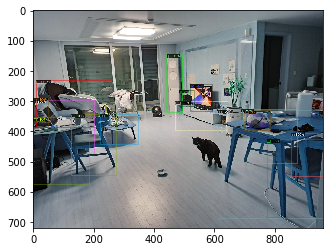

In [33]:
from detectron2.utils.visualizer import ColorMode
metadata = MetadataCatalog.get("airnew")
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=metadata, 
                   #scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.imshow(out.get_image()[:, :, ::-1])
    name = d["file_name"].split('/')[-1]
    cv2.imwrite(name, out.get_image()[:, :, ::-1])